# <center>EE5731 Assignment 1: Panoramic Image Stitching
# <center>LI HAIPENG A0260034W

# <CENTER>Part 1: 2D Convolution
## 1.Write a program for the image 2D convolution. It should be able to process any grayscale input image, and operate using the following kernels:

out.shape (312, 544)


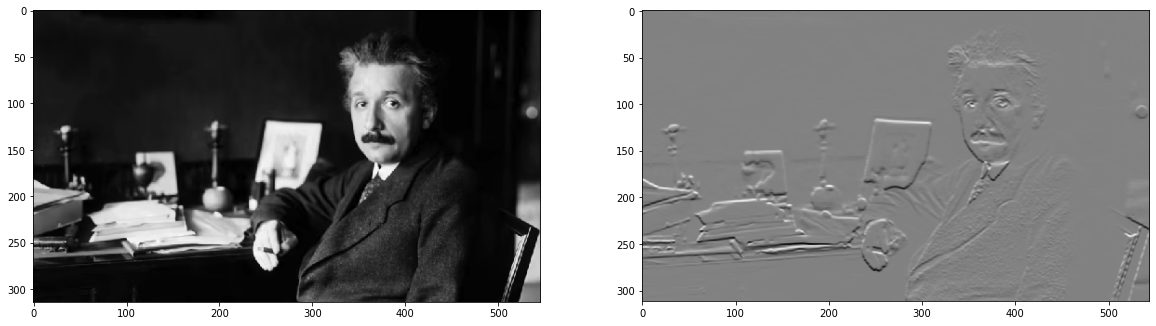

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

srcImg = cv2.imread('Img/einstein.png')
srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2GRAY)

#def different kernel
sobel_kernel_vert = np.array([[-1,0,1],
                              [-2,0,2],
                              [-1,0,1]])

sobel_kernel_hori = np.array([[-1,-2,-1],
                              [0,0,0],
                              [1,2,1]])

guassian_kernel_3 = 1/16 * np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])

guassian_kernel_5 = 1/256 * np.array([[1,4,6,4,1],
                                     [4,16,24,16,4],
                                     [6,24,36,24,6],
                                     [4,16,24,16,4],
                                     [1,4,6,4,1]])

def generate_outImg(srcImg,kernel):

    m = srcImg.shape[0]
    n = srcImg.shape[1]

    outImg = np.zeros([m-kernel.shape[0]+1, n-kernel.shape[1]+1])
    return outImg

def conv_2d(src,kernel,k_size):
    out = generate_outImg(src,kernel)
    print('out.shape',out.shape)
    
    conv(src,out,kernel,k_size)
    
    return out

def conv(src,out,kernel,k_size):
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            src_block = src[i:i+k_size[0], j:j+k_size[1]]
            pixel_count = kernel.size
            pixel_sum = 0
            _src = src_block.flatten()
            _kernel = kernel.flatten()
    
            for k in range(pixel_count):
                pixel_sum += _src[k]*_kernel[k]
        
            value = pixel_sum 
#                 value = conv_each(src[i:i+k_size[0], j:j+k_size[1]], kernel)
            out[i, j] = value
                
# def conv_each(src_pitch, kernel):
#     sum = 0
#     count = kernel.size
    
#     for i in range(count):
#         sum = sum + src_pitch[i] * kernel[i]
    
#     sum = sum if sum >0  else 0
    
#     sum = sum if sum < 255 else 255
    
#     return sum

def conv_each(src_block,kernel):
    pixel_count = kernel.size
    pixel_sum = 0
    _src = src_block.flatten()
    _kernel = kernel.flatten()
    
    for i in range(pixel_count):
        pixel_sum += _src[i]*_kernel[i]
        
    value = pixel_sum 
    
#     value = value if value >0  else 0
    
#     value = value if value < 255 else 255
        
    return value

def  test_conv(src,kernel,k_size):
    plt.figure(figsize=(20,10))
    
    plt.subplot(121)
    plt.imshow(src, cmap='gray')
    
    dst = conv_2d(src,kernel,k_size)
    
    plt.subplot(122)
    plt.imshow(dst, cmap='gray')
    plt.show()
    
    return dst
    
#     cv2.imshow("demo", dst)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()



#====================================================
block_size = 1
k_size = [3,3]
kernel = np.array([[-1,1],
                  [1,-1]])

out = test_conv(srcImg,sobel_kernel_hori,k_size)




out.shape (312, 543)
-1017.0


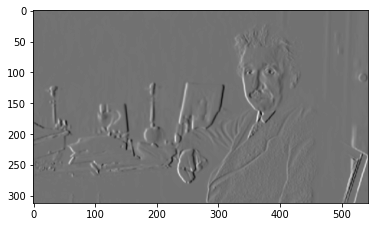

In [209]:
testkernel = np.array([[-1,-1,1,1],
                  [-1,-1,1,1],
                  [-1,-1,1,1]])
test = conv_2d(srcImg,testkernel,testkernel.shape)
minlist = []
for i in range(test.shape[0]):
    minlist.append(min(test[i]))
print(min(minlist))
plt.imshow(test, cmap='gray')

haarImg.shape (312, 543)
-1017.0


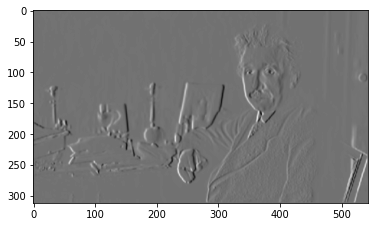

In [214]:
def integral(src):
    inteImg = np.zeros([src.shape[0]+1, src.shape[1]+1])#first row and column are 0
    for i in range(1, src.shape[0]):
        for j in range(1, src.shape[1]):
            inteImg[i][j] = src[i-1][j-1] + inteImg[i-1][j] + inteImg[i][j-1] - inteImg[i-1][j-1]
            
    return inteImg

def haar_x2(src,inteImg,w,h):
    haarImg = np.zeros([src.shape[0]-h+1, src.shape[1]-w+1])
    for i in range(0, haarImg.shape[0]-1):
        for j in range(0, haarImg.shape[1]-1):
            m = h + i
            n = w + j
            haar_all = inteImg[m][n]+inteImg[i][j]-inteImg[m][j]-inteImg[i][n]
            haar_black = inteImg[m][n-int(w/2)]+inteImg[i][j]-inteImg[m][j]-inteImg[i][n-int(w/2)]
            haarImg[i][j] = haar_all - haar_black*2

    return haarImg

#==========================================
inteImg = integral(srcImg)
# print('srcImg =',srcImg)
# print('inteImg =',inteImg)
haarImg = haar_x2(srcImg,inteImg,w = 4, h = 3)
print('haarImg.shape',haarImg.shape)
# print('haarImg =',haarImg[100][50])
minlist = []
for i in range(haarImg.shape[0]-1):
    minlist.append(min(haarImg[i]))
print(min(minlist))
plt.imshow(haarImg, cmap='gray')


In [145]:
def intergral(image):
    height,weigth = np.shape(image)
    output = np.zeros((height + 1,weigth + 1))

    for h in range(1,height + 1):
        columnSum = np.zeros((weigth + 1))  
        for w in range(1,weigth + 1):
            columnSum[w] = columnSum[w - 1] + image[h - 1][w - 1] # 每行的列合计
            output[h][w] = output[h - 1][w] + columnSum[w]
    return output
testImg = integral(srcImg)
print('testImg =',testImg)



testImg = [[0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 2.400000e+01 4.700000e+01 ... 6.023000e+03 6.052000e+03
  0.000000e+00]
 [0.000000e+00 4.700000e+01 9.300000e+01 ... 1.195300e+04 1.201200e+04
  0.000000e+00]
 ...
 [0.000000e+00 1.598000e+04 3.112300e+04 ... 7.594070e+06 7.618757e+06
  0.000000e+00]
 [0.000000e+00 1.599300e+04 3.114900e+04 ... 7.608426e+06 7.633227e+06
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]


# <center>Part 2: SIFT Features and Descriptors
## Extract SIFT keypoints from im01.jpg using any publicly available SIFT code. Show the keypoints on the images.

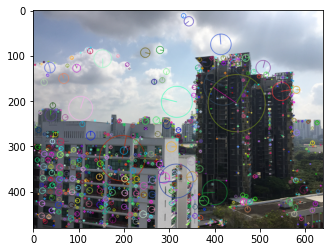

In [3]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('Img/im01.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('Img/im02.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img3 = cv2.imread('Img/im03.jpg')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

img4 = cv2.imread('Img/im04.jpg')
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

img5 = cv2.imread('Img/im05.jpg')
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)


#创建sift对象
sift = cv2.xfeatures2d.SIFT_create()

#进行检测
kp = sift.detect(img2)

#绘制关键点
cv2.drawKeypoints(img2, kp, img2, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img2)
# cv2.imshow('img', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



# <center>Part 3: Homography

## 1.GUI

In [19]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

def mouse_action_src(event, x, y, flags, srcImg_coord):
    cv2.imshow('srcImg coord', srcImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(srcImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        srcImg_coord.append([y, x])

def mouse_action_replace(event, x, y, flags, replace_coord):
    cv2.imshow('replace coord', dstImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(dstImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        replace_coord.append([y, x])

#================================================
print('start...')    
srcImg = cv2.imread('Img/h1.jpg', cv2.IMREAD_COLOR)# upload source img
srcImg_copy = np.tile(srcImg, 1)

dstImg = cv2.imread('Img/h2.jpg', cv2.IMREAD_COLOR)# upload destination img
dstImg_copy = np.tile(dstImg, 1)

srcImg_coord = [] #define srcImg_coord coordinate points array [y,x]
cv2.namedWindow('srcImg coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('srcImg coord', mouse_action_src, srcImg_coord)
while True:
    # 当采集到四个点后，可以按esc退出鼠标采集行为
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

replace_coord = [] #define replace coordinate points array [y,x]
cv2.namedWindow('replace coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('replace coord', mouse_action_replace, replace_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

print('srcImg_coord =', srcImg_coord)
print('replace_coord =', replace_coord)
srcImg_coord = np.array(srcImg_coord)
replace_coord = np.array(replace_coord)


start...
1, 0
5, 1195
1198, 4
1196, 1195
7, 207
365, 556
468, 7
841, 291
srcImg_coord = [[0, 1], [1195, 5], [4, 1198], [1195, 1196]]
replace_coord = [[207, 7], [556, 365], [7, 468], [291, 841]]


## 2.Compute the homography matrix from h1.jpg to h2.jpg, and show the homography matrix. Use the homography matrix to tranform h1.jpg to h2.jpg, and show the result:

homography matrix from h1 to h2 is
 [[ 2.33910724e-01 -1.67229620e-01  2.07186585e+02]
 [ 2.59624824e-01  4.27891209e-01  6.57276331e+00]
 [-1.05936281e-04  9.35020686e-05  1.00000000e+00]]
srcImg.shape (1200, 1200, 3)


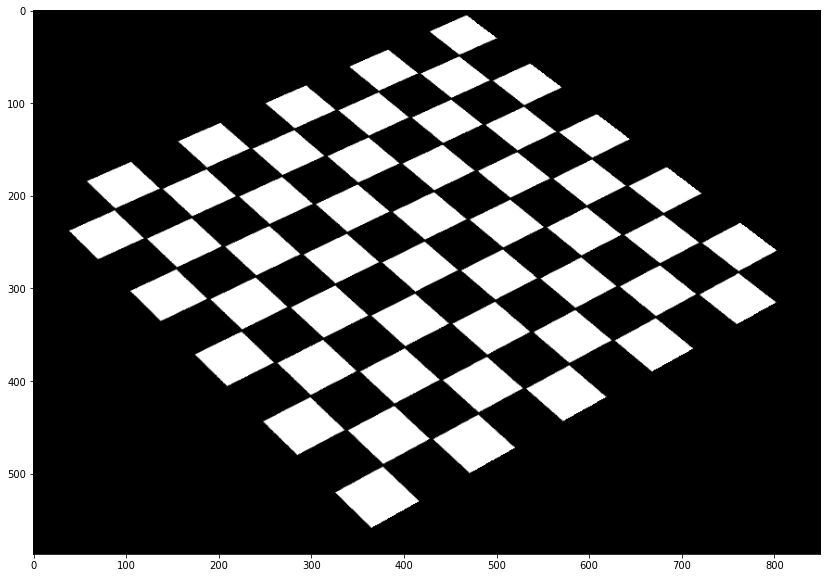

In [27]:
def getHomography(srcImg_coord, replace_coord):
    if srcImg_coord.shape != replace_coord.shape:
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = srcImg_coord.shape[0]
    A = np.zeros((2*n,9))
    for i in range(0,n):
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

def getPerspective(srcImg, H, dstImg):
    persImg = np.zeros([dstImg.shape[0], dstImg.shape[1], dstImg.shape[2]])#define perspective img
    print('srcImg.shape',srcImg.shape)
    for i in range(0, srcImg.shape[0]):
        for j in range(0, srcImg.shape[1]):
            dst_x = (H[0][0]*i + H[0][1]*j + H[0][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            dst_y = (H[1][0]*i + H[1][1]*j + H[1][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            if int(dst_x) < dstImg.shape[0] and int(dst_y) < dstImg.shape[1]:
                persImg[int(dst_x)][int(dst_y)] = srcImg[i][j]

    return persImg

#============================================

H1 = getHomography(srcImg_coord, replace_coord)
print('homography matrix from h1 to h2 is\n',H1)
persImg1 = getPerspective(srcImg, H1, dstImg)

plt.figure(figsize=(20,10))
plt.imshow(persImg1.astype('uint8'))
plt.show()


## 3.Compute the homography matrix from h2.jpg to h1.jpg, and show the homography matrix.

In [140]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

def mouse_action_src(event, x, y, flags, srcImg_coord):
    cv2.imshow('srcImg coord', srcImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(srcImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        srcImg_coord.append([y, x])

def mouse_action_replace(event, x, y, flags, replace_coord):
    cv2.imshow('replace coord', dstImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(dstImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        replace_coord.append([y, x])
        
def getHomography(srcImg_coord, replace_coord):
    if srcImg_coord.shape != replace_coord.shape:
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = srcImg_coord.shape[0]
    A = np.zeros((2*n,9))
    for i in range(0,n):
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

def getPerspective(srcImg, H, dstImg):
    persImg = np.zeros([dstImg.shape[0], dstImg.shape[1], dstImg.shape[2]])#define perspective img
    i = 0
    while i < srcImg.shape[0]:
        j = 0
        while j < srcImg.shape[1]:
            dst_x = (H[0][0]*i + H[0][1]*j + H[0][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            dst_y = (H[1][0]*i + H[1][1]*j + H[1][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            if int(dst_x) < dstImg.shape[0] and int(dst_y) < dstImg.shape[1]:
                persImg[int(dst_x)][int(dst_y)] = srcImg[int(i)][int(j)]
            j+=0.1
        i+=0.1
    return persImg

#========================================
print('start...')    
srcImg = cv2.imread('Img/h2.jpg', cv2.IMREAD_COLOR)# upload source img
srcImg_copy = np.tile(srcImg, 1)

dstImg = cv2.imread('Img/h1.jpg', cv2.IMREAD_COLOR)# upload destination img
dstImg_copy = np.tile(dstImg, 1)

srcImg_coord = [] #define srcImg_coord coordinate points array [y,x]
cv2.namedWindow('srcImg coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('srcImg coord', mouse_action_src, srcImg_coord)
while True:
    # 当采集到四个点后，可以按esc退出鼠标采集行为
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

replace_coord = [] #define replace coordinate points array [y,x]
cv2.namedWindow('replace coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('replace coord', mouse_action_replace, replace_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

srcImg_coord = np.array(srcImg_coord)
replace_coord = np.array(replace_coord)

H2 = getHomography(srcImg_coord, replace_coord)
print('homography matrix from h2 to h1 is\n',H2)

start...
9, 208
366, 551
468, 7
842, 291
363, 359
364, 837
839, 368
844, 841
homography matrix from h2 to h1 is
 [[ 1.29388454e+00  5.15960477e-01  1.15253833e+02]
 [-5.88269253e-01  7.02260825e-01  5.09399664e+02]
 [ 4.02916376e-04 -1.89136497e-05  1.00000000e+00]]


## 4.Use the second homography matrix to tranform h2.jpg to h1.jpg, and show the result:

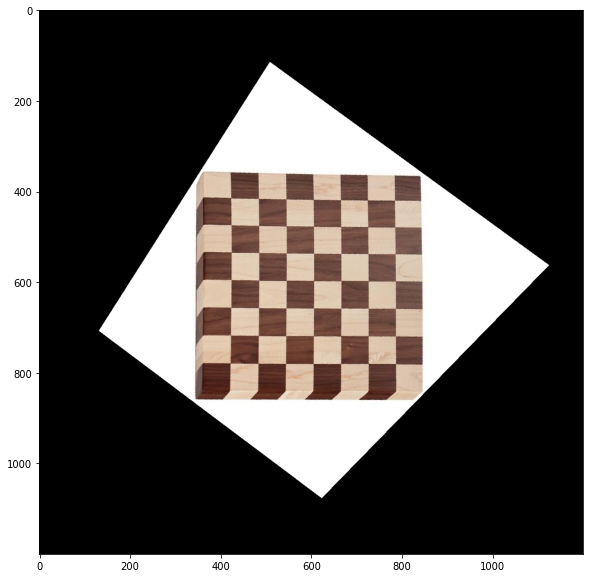

In [141]:
persImg2 = getPerspective(srcImg, H2, dstImg)
persImg2 = cv2.cvtColor(persImg2.astype('float32'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(persImg2.astype('uint8'))
plt.show()

## 5.Ask the user to select the points for transforming the simpsons image to the advertisement area of the bus. Compute the homography, transform the image, and show the transformation result

start...
1, 5
3, 1491
999, 7
997, 1491
583, 206
595, 519
800, 228
809, 469
srcImg_coord = [[5, 1], [1491, 3], [7, 999], [1491, 997]]
replace_coord = [[206, 583], [519, 595], [228, 800], [469, 809]]
homography matrix is
 [[ 2.09672988e-01  8.95713373e-02  2.04921252e+02]
 [ 6.43285727e-03  4.55874282e-01  5.82679469e+02]
 [-2.13429922e-06  2.97991566e-04  1.00000000e+00]]


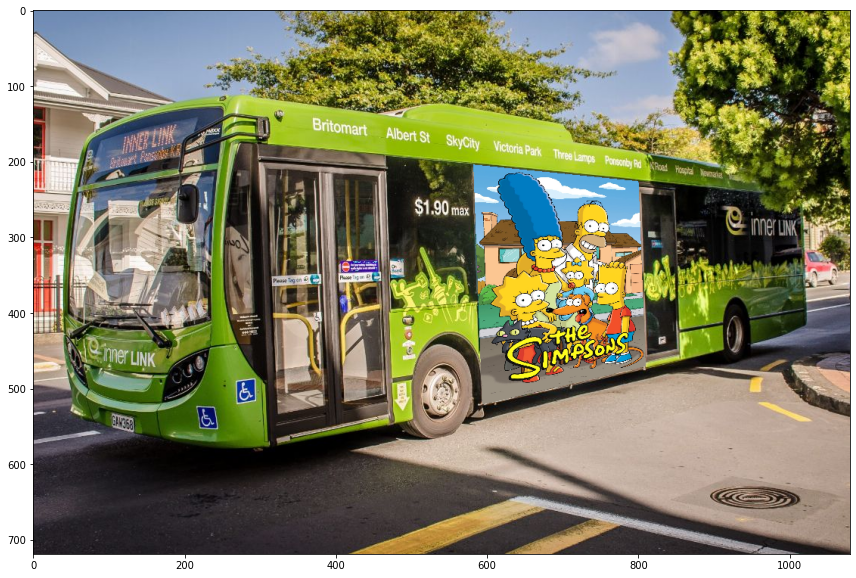

In [8]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

def mouse_action_src(event, x, y, flags, srcImg_coord):
    cv2.imshow('srcImg coord', srcImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(srcImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        srcImg_coord.append([y, x])

def mouse_action_replace(event, x, y, flags, replace_coord):
    cv2.imshow('replace coord', dstImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(dstImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        replace_coord.append([y, x])

def getHomography(srcImg_coord, replace_coord):
    if srcImg_coord.shape != replace_coord.shape:
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = srcImg_coord.shape[0]
    A = np.zeros((2*n,9))
    for i in range(0,n):
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

def getPerspective(srcImg, H, dstImg):
    persImg = np.zeros([dstImg.shape[0], dstImg.shape[1], dstImg.shape[2]])#define perspective img

    for i in range(0, srcImg.shape[0]):
        for j in range(0, srcImg.shape[1]):
            dst_x = (H[0][0]*i + H[0][1]*j + H[0][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            dst_y = (H[1][0]*i + H[1][1]*j + H[1][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            if int(dst_x) < dstImg.shape[0] and int(dst_y) < dstImg.shape[1]:
                persImg[int(dst_x)][int(dst_y)] = srcImg[i][j]

    return persImg

#=================================
print('start...')    
srcImg = cv2.imread('Img/simpsons.jpg', cv2.IMREAD_COLOR)# upload source img
srcImg_copy = np.tile(srcImg, 1)

dstImg = cv2.imread('Img/bus.jpg', cv2.IMREAD_COLOR)# upload destination img
dstImg_copy = np.tile(dstImg, 1)

srcImg_coord = [] #define srcImg_coord coordinate points array [y,x]
cv2.namedWindow('srcImg coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('srcImg coord', mouse_action_src, srcImg_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

replace_coord = [] #define replace coordinate points array [y,x]
cv2.namedWindow('replace coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('replace coord', mouse_action_replace, replace_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

print('srcImg_coord =', srcImg_coord)
print('replace_coord =', replace_coord)
srcImg_coord = np.array(srcImg_coord)
replace_coord = np.array(replace_coord)

H = getHomography(srcImg_coord, replace_coord)
print('homography matrix is\n',H)
persImg = getPerspective(srcImg, H, dstImg)

for i in range(0, dstImg.shape[0]):
    for j in range(0, dstImg.shape[1]):
        if all(persImg[i][j] == (0, 0, 0)):
            dstImg[i][j] = dstImg[i][j]
        else:
            dstImg[i][j] = persImg[i][j]

plt.figure(figsize=(20,10))
# plt.subplot(121)
# persImg = cv2.cvtColor(persImg, cv2.COLOR_BGR2RGB)
# plt.imshow(persImg.astype('uint8'))
# plt.subplot(122)
dstImg = cv2.cvtColor(dstImg, cv2.COLOR_BGR2RGB)
plt.imshow(dstImg.astype('uint8'))
plt.show()

# <center>Part 4: Manual Homography + Sticthing
## 1.Load im01.jpg and im02.jpg. Let the user to choose 4 points on im01.jpg and 4 points on im02.jpg

start...
21, 249
17, 427
275, 457
290, 284
321, 228
324, 379
561, 441
576, 261
homography matrix is
 [[ 8.92405564e-01 -1.88311039e-01  1.14252599e+01]
 [ 6.45068983e-02  5.14481712e-01  2.96498526e+02]
 [ 9.38796022e-05 -7.62326502e-04  1.00000000e+00]]


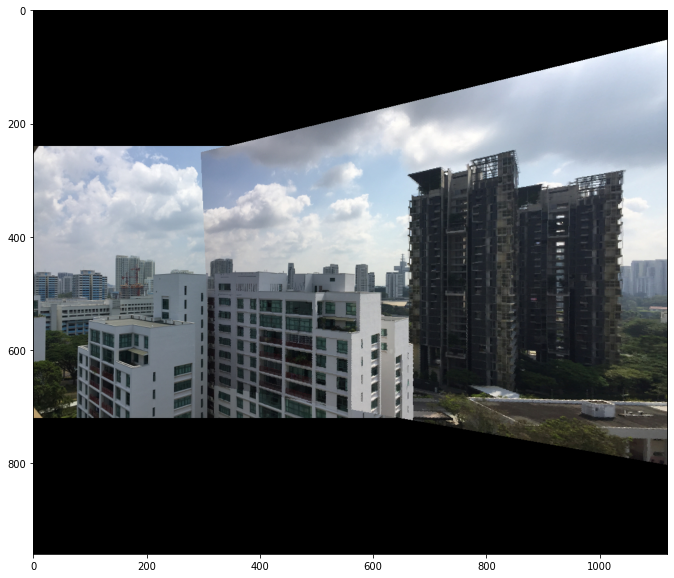

In [139]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

def mouse_action_src(event, x, y, flags, srcImg_coord):
    cv2.imshow('srcImg coord', srcImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(srcImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        srcImg_coord.append([y, x])

def mouse_action_replace(event, x, y, flags, replace_coord):
    cv2.imshow('replace coord', dstImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(dstImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        replace_coord.append([y, x])

def getHomography(srcImg_coord, replace_coord):
    if srcImg_coord.shape != replace_coord.shape:
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = srcImg_coord.shape[0]
    A = np.zeros((2*n,9))
    for i in range(0,n):
        
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

#=================================
print('start...')    
srcImg = cv2.imread('Img/im02.jpg', cv2.IMREAD_COLOR)# upload source img
srcImg_copy = np.tile(srcImg, 1)

dstImg = cv2.imread('Img/im01.jpg', cv2.IMREAD_COLOR)# upload destination img
dstImg_copy = np.tile(dstImg, 1)

srcImg_coord = [] #define srcImg_coord coordinate points array [y,x]
cv2.namedWindow('srcImg coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('srcImg coord', mouse_action_src, srcImg_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

replace_coord = [] #define replace coordinate points array [y,x]
cv2.namedWindow('replace coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('replace coord', mouse_action_replace, replace_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

srcImg_coord = np.array(srcImg_coord)
replace_coord = np.array(replace_coord)

H = getHomography(srcImg_coord, replace_coord)
print('homography matrix is\n',H)

newImg = np.zeros([dstImg.shape[0]+480, dstImg.shape[1]+480, dstImg.shape[2]])

for i in range(0,960):
    for j in range(0,1280):
        if i >= 240 and i < 720 and j < 640:
            newImg[i][j] = dstImg[i-240][j]
i = 0
while i < srcImg.shape[0]:
    j = 0
    while j < srcImg.shape[1]:
        dst_x = (H[0][0]*i + H[0][1]*j + H[0][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
        dst_y = (H[1][0]*i + H[1][1]*j + H[1][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
        if int(dst_x)+240 < newImg.shape[0] and int(dst_y) < newImg.shape[1] :
            newImg[int(dst_x)+240][int(dst_y)] = srcImg[int(i)][int(j)]
        j+=0.1
    i+=0.1

newImg = cv2.cvtColor(newImg.astype('float32'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(newImg.astype('uint8'))
plt.show()

# <center>Part 5: Homography + RANSAC
## 1.Load im01.jpg and im02.jpg. Based on SIFT, find matches between the two images. Show all the matches

des1.shape (1567, 128)
des2.shape (1193, 128)
len(match) 401


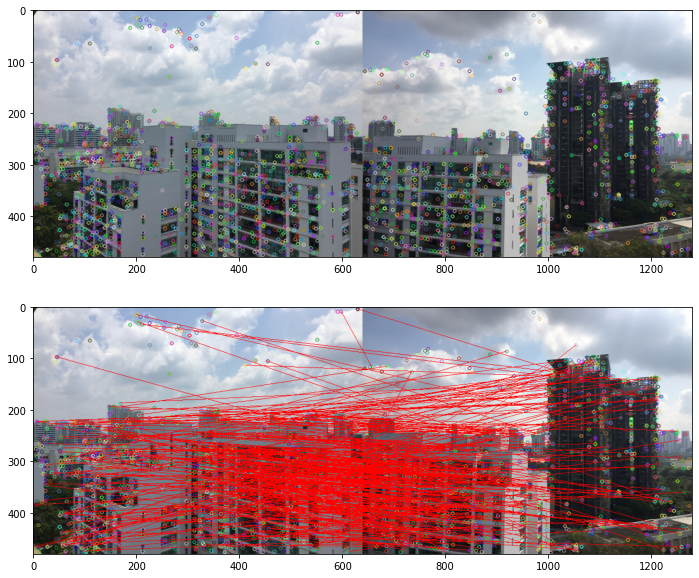

In [130]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import linalg

def sift_match(des1, des2):
    d = np.zeros(des2.shape[0])
    flag = np.zeros(des1.shape[0])
    
    for m in range(0, des1.shape[0]):
        for n in range(0, des2.shape[0]):
            d2 = sum((des1[m]-des2[n])**2)
            d[n] = np.sqrt(d2)
            
        flag[m] = np.argmin(d)

    return flag        
    
#=========================================

img1 = cv2.imread('Img/im01.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('Img/im02.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

#创建sift对象
sift = cv2.xfeatures2d.SIFT_create()

#进行检测
#kp1 = sift.detect(img1)
#kp2 = sift.detect(img2)
(kp1, des1) = sift.detectAndCompute(img1, None)
(kp2, des2) = sift.detectAndCompute(img2, None)
#绘制关键点
f1 = cv2.drawKeypoints(img1, kp1, img1, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
f2 = cv2.drawKeypoints(img2, kp2, img2, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
sift_cat = np.hstack((f1, f2))        #horizontally spliced img
sift_cat1 = np.tile(sift_cat, 1)      #copy img    

#print('kp1.shape',kp1.shape)
print('des1.shape',des1.shape)
print('des2.shape',des2.shape)

flag = sift_match(des1, des2)
flag2 = sift_match(des2, des1)
# print('flag',flag)
# print('flag2',flag2)
match = []
for i in range(0, len(flag)):
    for j in range(0, len(flag2)):
        if flag[i] == j and i == flag2[j]:
            match.append([i,flag[i]])
print('len(match)',len(match))
            
for i in range(len(match)):
    x1 = kp1[int(match[i][0])].pt[0]
    y1 = kp1[int(match[i][0])].pt[1]
    x2 = kp2[int(match[i][1])].pt[0]
    y2 = kp2[int(match[i][1])].pt[1]
    d = np.sqrt(sum((des1[int(match[i][0])]-des2[int(match[i][1])])**2))
    
    cv2.line(sift_cat1,(int(x1),int(y1)),(int(x2)+f1.shape[1],int(y2)),(255,0,0),1)
    
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.imshow(sift_cat)
plt.subplot(212)
plt.imshow(sift_cat1)
plt.show()




## 2.Compute the best homography matrix using RANSAC, and show all the inlier matches (matches that support your best homography matrix):

第 0 次
第 1 次
第 2 次
第 3 次
第 4 次
第 5 次
第 6 次
第 7 次
第 8 次
第 9 次
第 10 次
第 11 次
第 12 次
第 13 次
第 14 次
第 15 次
第 16 次
第 17 次
第 18 次
第 19 次
第 20 次
第 21 次
第 22 次
第 23 次
第 24 次
第 25 次
第 26 次
第 27 次
第 28 次
第 29 次
第 30 次
第 31 次
第 32 次
第 33 次
第 34 次
第 35 次
第 36 次
第 37 次
第 38 次
第 39 次
第 40 次
第 41 次
第 42 次
第 43 次
第 44 次
第 45 次
第 46 次
第 47 次
第 48 次
第 49 次
第 50 次
第 51 次
第 52 次
第 53 次
第 54 次
第 55 次
第 56 次
第 57 次
第 58 次
第 59 次
第 60 次
第 61 次
第 62 次
第 63 次
第 64 次
第 65 次
第 66 次
第 67 次
第 68 次
第 69 次
第 70 次
第 71 次
第 72 次
第 73 次
第 74 次
第 75 次
第 76 次
第 77 次
第 78 次
第 79 次
第 80 次
第 81 次
第 82 次
第 83 次
第 84 次
第 85 次
第 86 次
第 87 次
第 88 次
第 89 次
第 90 次
第 91 次
第 92 次
第 93 次
第 94 次
第 95 次
第 96 次
第 97 次
第 98 次
第 99 次
第 100 次
第 101 次
第 102 次
第 103 次
第 104 次
第 105 次
第 106 次
第 107 次
第 108 次
第 109 次
第 110 次
第 111 次
第 112 次
第 113 次
第 114 次
第 115 次
第 116 次
第 117 次
第 118 次
第 119 次
第 120 次
第 121 次
第 122 次
第 123 次
第 124 次
第 125 次
第 126 次
第 127 次
第 128 次
第 129 次
第 130 次
第 131 次
第 132 次
第 133 次
第 134 次
第 135 次
第 136 次
第 137 次
第 138 

第 1118 次
第 1119 次
第 1120 次
第 1121 次
第 1122 次
第 1123 次
第 1124 次
第 1125 次
第 1126 次
第 1127 次
第 1128 次
第 1129 次
第 1130 次
第 1131 次
第 1132 次
第 1133 次
第 1134 次
第 1135 次
第 1136 次
第 1137 次
第 1138 次
第 1139 次
第 1140 次
第 1141 次
第 1142 次
第 1143 次
第 1144 次
第 1145 次
第 1146 次
第 1147 次
第 1148 次
第 1149 次
第 1150 次
第 1151 次
第 1152 次
第 1153 次
第 1154 次
第 1155 次
第 1156 次
第 1157 次
第 1158 次
第 1159 次
第 1160 次
第 1161 次
第 1162 次
第 1163 次
第 1164 次
第 1165 次
第 1166 次
第 1167 次
第 1168 次
第 1169 次
第 1170 次
第 1171 次
第 1172 次
第 1173 次
第 1174 次
第 1175 次
第 1176 次
第 1177 次
第 1178 次
第 1179 次
第 1180 次
第 1181 次
第 1182 次
第 1183 次
第 1184 次
第 1185 次
第 1186 次
第 1187 次
第 1188 次
第 1189 次
第 1190 次
第 1191 次
第 1192 次
第 1193 次
第 1194 次
第 1195 次
第 1196 次
第 1197 次
第 1198 次
第 1199 次
第 1200 次
第 1201 次
第 1202 次
第 1203 次
第 1204 次
第 1205 次
第 1206 次
第 1207 次
第 1208 次
第 1209 次
第 1210 次
第 1211 次
第 1212 次
第 1213 次
第 1214 次
第 1215 次
第 1216 次
第 1217 次
第 1218 次
第 1219 次
第 1220 次
第 1221 次
第 1222 次
第 1223 次
第 1224 次
第 1225 次
第 1226 次
第 1227 次
第 1228 次
第

第 2097 次
第 2098 次
第 2099 次
第 2100 次
第 2101 次
第 2102 次
第 2103 次
第 2104 次
第 2105 次
第 2106 次
第 2107 次
第 2108 次
第 2109 次
第 2110 次
第 2111 次
第 2112 次
第 2113 次
第 2114 次
第 2115 次
第 2116 次
第 2117 次
第 2118 次
第 2119 次
第 2120 次
第 2121 次
第 2122 次
第 2123 次
第 2124 次
第 2125 次
第 2126 次
第 2127 次
第 2128 次
第 2129 次
第 2130 次
第 2131 次
第 2132 次
第 2133 次
第 2134 次
第 2135 次
第 2136 次
第 2137 次
第 2138 次
第 2139 次
第 2140 次
第 2141 次
第 2142 次
第 2143 次
第 2144 次
第 2145 次
第 2146 次
第 2147 次
第 2148 次
第 2149 次
第 2150 次
第 2151 次
第 2152 次
第 2153 次
第 2154 次
第 2155 次
第 2156 次
第 2157 次
第 2158 次
第 2159 次
第 2160 次
第 2161 次
第 2162 次
第 2163 次
第 2164 次
第 2165 次
第 2166 次
第 2167 次
第 2168 次
第 2169 次
第 2170 次
第 2171 次
第 2172 次
第 2173 次
第 2174 次
第 2175 次
第 2176 次
第 2177 次
第 2178 次
第 2179 次
第 2180 次
第 2181 次
第 2182 次
第 2183 次
第 2184 次
第 2185 次
第 2186 次
第 2187 次
第 2188 次
第 2189 次
第 2190 次
第 2191 次
第 2192 次
第 2193 次
第 2194 次
第 2195 次
第 2196 次
第 2197 次
第 2198 次
第 2199 次
第 2200 次
第 2201 次
第 2202 次
第 2203 次
第 2204 次
第 2205 次
第 2206 次
第 2207 次
第

第 3083 次
第 3084 次
第 3085 次
第 3086 次
第 3087 次
第 3088 次
第 3089 次
第 3090 次
第 3091 次
第 3092 次
第 3093 次
第 3094 次
第 3095 次
第 3096 次
第 3097 次
第 3098 次
第 3099 次
第 3100 次
第 3101 次
第 3102 次
第 3103 次
第 3104 次
第 3105 次
第 3106 次
第 3107 次
第 3108 次
第 3109 次
第 3110 次
第 3111 次
第 3112 次
第 3113 次
第 3114 次
第 3115 次
第 3116 次
第 3117 次
第 3118 次
第 3119 次
第 3120 次
第 3121 次
第 3122 次
第 3123 次
第 3124 次
第 3125 次
第 3126 次
第 3127 次
第 3128 次
第 3129 次
第 3130 次
第 3131 次
第 3132 次
第 3133 次
第 3134 次
第 3135 次
第 3136 次
第 3137 次
第 3138 次
第 3139 次
第 3140 次
第 3141 次
第 3142 次
第 3143 次
第 3144 次
第 3145 次
第 3146 次
第 3147 次
第 3148 次
第 3149 次
第 3150 次
第 3151 次
第 3152 次
第 3153 次
第 3154 次
第 3155 次
第 3156 次
第 3157 次
第 3158 次
第 3159 次
第 3160 次
第 3161 次
第 3162 次
第 3163 次
第 3164 次
第 3165 次
第 3166 次
第 3167 次
第 3168 次
第 3169 次
第 3170 次
第 3171 次
第 3172 次
第 3173 次
第 3174 次
第 3175 次
第 3176 次
第 3177 次
第 3178 次
第 3179 次
第 3180 次
第 3181 次
第 3182 次
第 3183 次
第 3184 次
第 3185 次
第 3186 次
第 3187 次
第 3188 次
第 3189 次
第 3190 次
第 3191 次
第 3192 次
第 3193 次
第

第 4026 次
第 4027 次
第 4028 次
第 4029 次
第 4030 次
第 4031 次
第 4032 次
第 4033 次
第 4034 次
第 4035 次
第 4036 次
第 4037 次
第 4038 次
第 4039 次
第 4040 次
第 4041 次
第 4042 次
第 4043 次
第 4044 次
第 4045 次
第 4046 次
第 4047 次
第 4048 次
第 4049 次
第 4050 次
第 4051 次
第 4052 次
第 4053 次
第 4054 次
第 4055 次
第 4056 次
第 4057 次
第 4058 次
第 4059 次
第 4060 次
第 4061 次
第 4062 次
第 4063 次
第 4064 次
第 4065 次
第 4066 次
第 4067 次
第 4068 次
第 4069 次
第 4070 次
第 4071 次
第 4072 次
第 4073 次
第 4074 次
第 4075 次
第 4076 次
第 4077 次
第 4078 次
第 4079 次
第 4080 次
第 4081 次
第 4082 次
第 4083 次
第 4084 次
第 4085 次
第 4086 次
第 4087 次
第 4088 次
第 4089 次
第 4090 次
第 4091 次
第 4092 次
第 4093 次
第 4094 次
第 4095 次
第 4096 次
第 4097 次
第 4098 次
第 4099 次
第 4100 次
第 4101 次
第 4102 次
第 4103 次
第 4104 次
第 4105 次
第 4106 次
第 4107 次
第 4108 次
第 4109 次
第 4110 次
第 4111 次
第 4112 次
第 4113 次
第 4114 次
第 4115 次
第 4116 次
第 4117 次
第 4118 次
第 4119 次
第 4120 次
第 4121 次
第 4122 次
第 4123 次
第 4124 次
第 4125 次
第 4126 次
第 4127 次
第 4128 次
第 4129 次
第 4130 次
第 4131 次
第 4132 次
第 4133 次
第 4134 次
第 4135 次
第 4136 次
第

第 4996 次
第 4997 次
第 4998 次
第 4999 次
第 5000 次
第 5001 次
第 5002 次
第 5003 次
第 5004 次
第 5005 次
第 5006 次
第 5007 次
第 5008 次
第 5009 次
第 5010 次
第 5011 次
第 5012 次
第 5013 次
第 5014 次
第 5015 次
第 5016 次
第 5017 次
第 5018 次
第 5019 次
第 5020 次
第 5021 次
第 5022 次
第 5023 次
第 5024 次
第 5025 次
第 5026 次
第 5027 次
第 5028 次
第 5029 次
第 5030 次
第 5031 次
第 5032 次
第 5033 次
第 5034 次
第 5035 次
第 5036 次
第 5037 次
第 5038 次
第 5039 次
第 5040 次
第 5041 次
第 5042 次
第 5043 次
第 5044 次
第 5045 次
第 5046 次
第 5047 次
第 5048 次
第 5049 次
第 5050 次
第 5051 次
第 5052 次
第 5053 次
第 5054 次
第 5055 次
第 5056 次
第 5057 次
第 5058 次
第 5059 次
第 5060 次
第 5061 次
第 5062 次
第 5063 次
第 5064 次
第 5065 次
第 5066 次
第 5067 次
第 5068 次
第 5069 次
第 5070 次
第 5071 次
第 5072 次
第 5073 次
第 5074 次
第 5075 次
第 5076 次
第 5077 次
第 5078 次
第 5079 次
第 5080 次
第 5081 次
第 5082 次
第 5083 次
第 5084 次
第 5085 次
第 5086 次
第 5087 次
第 5088 次
第 5089 次
第 5090 次
第 5091 次
第 5092 次
第 5093 次
第 5094 次
第 5095 次
第 5096 次
第 5097 次
第 5098 次
第 5099 次
第 5100 次
第 5101 次
第 5102 次
第 5103 次
第 5104 次
第 5105 次
第 5106 次
第

第 5970 次
第 5971 次
第 5972 次
第 5973 次
第 5974 次
第 5975 次
第 5976 次
第 5977 次
第 5978 次
第 5979 次
第 5980 次
第 5981 次
第 5982 次
第 5983 次
第 5984 次
第 5985 次
第 5986 次
第 5987 次
第 5988 次
第 5989 次
第 5990 次
第 5991 次
第 5992 次
第 5993 次
第 5994 次
第 5995 次
第 5996 次
第 5997 次
第 5998 次
第 5999 次
第 6000 次
第 6001 次
第 6002 次
第 6003 次
第 6004 次
第 6005 次
第 6006 次
第 6007 次
第 6008 次
第 6009 次
第 6010 次
第 6011 次
第 6012 次
第 6013 次
第 6014 次
第 6015 次
第 6016 次
第 6017 次
第 6018 次
第 6019 次
第 6020 次
第 6021 次
第 6022 次
第 6023 次
第 6024 次
第 6025 次
第 6026 次
第 6027 次
第 6028 次
第 6029 次
第 6030 次
第 6031 次
第 6032 次
第 6033 次
第 6034 次
第 6035 次
第 6036 次
第 6037 次
第 6038 次
第 6039 次
第 6040 次
第 6041 次
第 6042 次
第 6043 次
第 6044 次
第 6045 次
第 6046 次
第 6047 次
第 6048 次
第 6049 次
第 6050 次
第 6051 次
第 6052 次
第 6053 次
第 6054 次
第 6055 次
第 6056 次
第 6057 次
第 6058 次
第 6059 次
第 6060 次
第 6061 次
第 6062 次
第 6063 次
第 6064 次
第 6065 次
第 6066 次
第 6067 次
第 6068 次
第 6069 次
第 6070 次
第 6071 次
第 6072 次
第 6073 次
第 6074 次
第 6075 次
第 6076 次
第 6077 次
第 6078 次
第 6079 次
第 6080 次
第

第 6915 次
第 6916 次
第 6917 次
第 6918 次
第 6919 次
第 6920 次
第 6921 次
第 6922 次
第 6923 次
第 6924 次
第 6925 次
第 6926 次
第 6927 次
第 6928 次
第 6929 次
第 6930 次
第 6931 次
第 6932 次
第 6933 次
第 6934 次
第 6935 次
第 6936 次
第 6937 次
第 6938 次
第 6939 次
第 6940 次
第 6941 次
第 6942 次
第 6943 次
第 6944 次
第 6945 次
第 6946 次
第 6947 次
第 6948 次
第 6949 次
第 6950 次
第 6951 次
第 6952 次
第 6953 次
第 6954 次
第 6955 次
第 6956 次
第 6957 次
第 6958 次
第 6959 次
第 6960 次
第 6961 次
第 6962 次
第 6963 次
第 6964 次
第 6965 次
第 6966 次
第 6967 次
第 6968 次
第 6969 次
第 6970 次
第 6971 次
第 6972 次
第 6973 次
第 6974 次
第 6975 次
第 6976 次
第 6977 次
第 6978 次
第 6979 次
第 6980 次
第 6981 次
第 6982 次
第 6983 次
第 6984 次
第 6985 次
第 6986 次
第 6987 次
第 6988 次
第 6989 次
第 6990 次
第 6991 次
第 6992 次
第 6993 次
第 6994 次
第 6995 次
第 6996 次
第 6997 次
第 6998 次
第 6999 次
第 7000 次
第 7001 次
第 7002 次
第 7003 次
第 7004 次
第 7005 次
第 7006 次
第 7007 次
第 7008 次
第 7009 次
第 7010 次
第 7011 次
第 7012 次
第 7013 次
第 7014 次
第 7015 次
第 7016 次
第 7017 次
第 7018 次
第 7019 次
第 7020 次
第 7021 次
第 7022 次
第 7023 次
第 7024 次
第 7025 次
第

第 7833 次
第 7834 次
第 7835 次
第 7836 次
第 7837 次
第 7838 次
第 7839 次
第 7840 次
第 7841 次
第 7842 次
第 7843 次
第 7844 次
第 7845 次
第 7846 次
第 7847 次
第 7848 次
第 7849 次
第 7850 次
第 7851 次
第 7852 次
第 7853 次
第 7854 次
第 7855 次
第 7856 次
第 7857 次
第 7858 次
第 7859 次
第 7860 次
第 7861 次
第 7862 次
第 7863 次
第 7864 次
第 7865 次
第 7866 次
第 7867 次
第 7868 次
第 7869 次
第 7870 次
第 7871 次
第 7872 次
第 7873 次
第 7874 次
第 7875 次
第 7876 次
第 7877 次
第 7878 次
第 7879 次
第 7880 次
第 7881 次
第 7882 次
第 7883 次
第 7884 次
第 7885 次
第 7886 次
第 7887 次
第 7888 次
第 7889 次
第 7890 次
第 7891 次
第 7892 次
第 7893 次
第 7894 次
第 7895 次
第 7896 次
第 7897 次
第 7898 次
第 7899 次
第 7900 次
第 7901 次
第 7902 次
第 7903 次
第 7904 次
第 7905 次
第 7906 次
第 7907 次
第 7908 次
第 7909 次
第 7910 次
第 7911 次
第 7912 次
第 7913 次
第 7914 次
第 7915 次
第 7916 次
第 7917 次
第 7918 次
第 7919 次
第 7920 次
第 7921 次
第 7922 次
第 7923 次
第 7924 次
第 7925 次
第 7926 次
第 7927 次
第 7928 次
第 7929 次
第 7930 次
第 7931 次
第 7932 次
第 7933 次
第 7934 次
第 7935 次
第 7936 次
第 7937 次
第 7938 次
第 7939 次
第 7940 次
第 7941 次
第 7942 次
第 7943 次
第

第 8750 次
第 8751 次
第 8752 次
第 8753 次
第 8754 次
第 8755 次
第 8756 次
第 8757 次
第 8758 次
第 8759 次
第 8760 次
第 8761 次
第 8762 次
第 8763 次
第 8764 次
第 8765 次
第 8766 次
第 8767 次
第 8768 次
第 8769 次
第 8770 次
第 8771 次
第 8772 次
第 8773 次
第 8774 次
第 8775 次
第 8776 次
第 8777 次
第 8778 次
第 8779 次
第 8780 次
第 8781 次
第 8782 次
第 8783 次
第 8784 次
第 8785 次
第 8786 次
第 8787 次
第 8788 次
第 8789 次
第 8790 次
第 8791 次
第 8792 次
第 8793 次
第 8794 次
第 8795 次
第 8796 次
第 8797 次
第 8798 次
第 8799 次
第 8800 次
第 8801 次
第 8802 次
第 8803 次
第 8804 次
第 8805 次
第 8806 次
第 8807 次
第 8808 次
第 8809 次
第 8810 次
第 8811 次
第 8812 次
第 8813 次
第 8814 次
第 8815 次
第 8816 次
第 8817 次
第 8818 次
第 8819 次
第 8820 次
第 8821 次
第 8822 次
第 8823 次
第 8824 次
第 8825 次
第 8826 次
第 8827 次
第 8828 次
第 8829 次
第 8830 次
第 8831 次
第 8832 次
第 8833 次
第 8834 次
第 8835 次
第 8836 次
第 8837 次
第 8838 次
第 8839 次
第 8840 次
第 8841 次
第 8842 次
第 8843 次
第 8844 次
第 8845 次
第 8846 次
第 8847 次
第 8848 次
第 8849 次
第 8850 次
第 8851 次
第 8852 次
第 8853 次
第 8854 次
第 8855 次
第 8856 次
第 8857 次
第 8858 次
第 8859 次
第 8860 次
第

第 9677 次
第 9678 次
第 9679 次
第 9680 次
第 9681 次
第 9682 次
第 9683 次
第 9684 次
第 9685 次
第 9686 次
第 9687 次
第 9688 次
第 9689 次
第 9690 次
第 9691 次
第 9692 次
第 9693 次
第 9694 次
第 9695 次
第 9696 次
第 9697 次
第 9698 次
第 9699 次
第 9700 次
第 9701 次
第 9702 次
第 9703 次
第 9704 次
第 9705 次
第 9706 次
第 9707 次
第 9708 次
第 9709 次
第 9710 次
第 9711 次
第 9712 次
第 9713 次
第 9714 次
第 9715 次
第 9716 次
第 9717 次
第 9718 次
第 9719 次
第 9720 次
第 9721 次
第 9722 次
第 9723 次
第 9724 次
第 9725 次
第 9726 次
第 9727 次
第 9728 次
第 9729 次
第 9730 次
第 9731 次
第 9732 次
第 9733 次
第 9734 次
第 9735 次
第 9736 次
第 9737 次
第 9738 次
第 9739 次
第 9740 次
第 9741 次
第 9742 次
第 9743 次
第 9744 次
第 9745 次
第 9746 次
第 9747 次
第 9748 次
第 9749 次
第 9750 次
第 9751 次
第 9752 次
第 9753 次
第 9754 次
第 9755 次
第 9756 次
第 9757 次
第 9758 次
第 9759 次
第 9760 次
第 9761 次
第 9762 次
第 9763 次
第 9764 次
第 9765 次
第 9766 次
第 9767 次
第 9768 次
第 9769 次
第 9770 次
第 9771 次
第 9772 次
第 9773 次
第 9774 次
第 9775 次
第 9776 次
第 9777 次
第 9778 次
第 9779 次
第 9780 次
第 9781 次
第 9782 次
第 9783 次
第 9784 次
第 9785 次
第 9786 次
第 9787 次
第

第 10605 次
第 10606 次
第 10607 次
第 10608 次
第 10609 次
第 10610 次
第 10611 次
第 10612 次
第 10613 次
第 10614 次
第 10615 次
第 10616 次
第 10617 次
第 10618 次
第 10619 次
第 10620 次
第 10621 次
第 10622 次
第 10623 次
第 10624 次
第 10625 次
第 10626 次
第 10627 次
第 10628 次
第 10629 次
第 10630 次
第 10631 次
第 10632 次
第 10633 次
第 10634 次
第 10635 次
第 10636 次
第 10637 次
第 10638 次
第 10639 次
第 10640 次
第 10641 次
第 10642 次
第 10643 次
第 10644 次
第 10645 次
第 10646 次
第 10647 次
第 10648 次
第 10649 次
第 10650 次
第 10651 次
第 10652 次
第 10653 次
第 10654 次
第 10655 次
第 10656 次
第 10657 次
第 10658 次
第 10659 次
第 10660 次
第 10661 次
第 10662 次
第 10663 次
第 10664 次
第 10665 次
第 10666 次
第 10667 次
第 10668 次
第 10669 次
第 10670 次
第 10671 次
第 10672 次
第 10673 次
第 10674 次
第 10675 次
第 10676 次
第 10677 次
第 10678 次
第 10679 次
第 10680 次
第 10681 次
第 10682 次
第 10683 次
第 10684 次
第 10685 次
第 10686 次
第 10687 次
第 10688 次
第 10689 次
第 10690 次
第 10691 次
第 10692 次
第 10693 次
第 10694 次
第 10695 次
第 10696 次
第 10697 次
第 10698 次
第 10699 次
第 10700 次
第 10701 次
第 10702 次
第 10703 次
第 10704 次


第 11471 次
第 11472 次
第 11473 次
第 11474 次
第 11475 次
第 11476 次
第 11477 次
第 11478 次
第 11479 次
第 11480 次
第 11481 次
第 11482 次
第 11483 次
第 11484 次
第 11485 次
第 11486 次
第 11487 次
第 11488 次
第 11489 次
第 11490 次
第 11491 次
第 11492 次
第 11493 次
第 11494 次
第 11495 次
第 11496 次
第 11497 次
第 11498 次
第 11499 次
第 11500 次
第 11501 次
第 11502 次
第 11503 次
第 11504 次
第 11505 次
第 11506 次
第 11507 次
第 11508 次
第 11509 次
第 11510 次
第 11511 次
第 11512 次
第 11513 次
第 11514 次
第 11515 次
第 11516 次
第 11517 次
第 11518 次
第 11519 次
第 11520 次
第 11521 次
第 11522 次
第 11523 次
第 11524 次
第 11525 次
第 11526 次
第 11527 次
第 11528 次
第 11529 次
第 11530 次
第 11531 次
第 11532 次
第 11533 次
第 11534 次
第 11535 次
第 11536 次
第 11537 次
第 11538 次
第 11539 次
第 11540 次
第 11541 次
第 11542 次
第 11543 次
第 11544 次
第 11545 次
第 11546 次
第 11547 次
第 11548 次
第 11549 次
第 11550 次
第 11551 次
第 11552 次
第 11553 次
第 11554 次
第 11555 次
第 11556 次
第 11557 次
第 11558 次
第 11559 次
第 11560 次
第 11561 次
第 11562 次
第 11563 次
第 11564 次
第 11565 次
第 11566 次
第 11567 次
第 11568 次
第 11569 次
第 11570 次


第 12334 次
第 12335 次
第 12336 次
第 12337 次
第 12338 次
第 12339 次
第 12340 次
第 12341 次
第 12342 次
第 12343 次
第 12344 次
第 12345 次
第 12346 次
第 12347 次
第 12348 次
第 12349 次
第 12350 次
第 12351 次
第 12352 次
第 12353 次
第 12354 次
第 12355 次
第 12356 次
第 12357 次
第 12358 次
第 12359 次
第 12360 次
第 12361 次
第 12362 次
第 12363 次
第 12364 次
第 12365 次
第 12366 次
第 12367 次
第 12368 次
第 12369 次
第 12370 次
第 12371 次
第 12372 次
第 12373 次
第 12374 次
第 12375 次
第 12376 次
第 12377 次
第 12378 次
第 12379 次
第 12380 次
第 12381 次
第 12382 次
第 12383 次
第 12384 次
第 12385 次
第 12386 次
第 12387 次
第 12388 次
第 12389 次
第 12390 次
第 12391 次
第 12392 次
第 12393 次
第 12394 次
第 12395 次
第 12396 次
第 12397 次
第 12398 次
第 12399 次
第 12400 次
第 12401 次
第 12402 次
第 12403 次
第 12404 次
第 12405 次
第 12406 次
第 12407 次
第 12408 次
第 12409 次
第 12410 次
第 12411 次
第 12412 次
第 12413 次
第 12414 次
第 12415 次
第 12416 次
第 12417 次
第 12418 次
第 12419 次
第 12420 次
第 12421 次
第 12422 次
第 12423 次
第 12424 次
第 12425 次
第 12426 次
第 12427 次
第 12428 次
第 12429 次
第 12430 次
第 12431 次
第 12432 次
第 12433 次


第 13186 次
第 13187 次
第 13188 次
第 13189 次
第 13190 次
第 13191 次
第 13192 次
第 13193 次
第 13194 次
第 13195 次
第 13196 次
第 13197 次
第 13198 次
第 13199 次
第 13200 次
第 13201 次
第 13202 次
第 13203 次
第 13204 次
第 13205 次
第 13206 次
第 13207 次
第 13208 次
第 13209 次
第 13210 次
第 13211 次
第 13212 次
第 13213 次
第 13214 次
第 13215 次
第 13216 次
第 13217 次
第 13218 次
第 13219 次
第 13220 次
第 13221 次
第 13222 次
第 13223 次
第 13224 次
第 13225 次
第 13226 次
第 13227 次
第 13228 次
第 13229 次
第 13230 次
第 13231 次
第 13232 次
第 13233 次
第 13234 次
第 13235 次
第 13236 次
第 13237 次
第 13238 次
第 13239 次
第 13240 次
第 13241 次
第 13242 次
第 13243 次
第 13244 次
第 13245 次
第 13246 次
第 13247 次
第 13248 次
第 13249 次
第 13250 次
第 13251 次
第 13252 次
第 13253 次
第 13254 次
第 13255 次
第 13256 次
第 13257 次
第 13258 次
第 13259 次
第 13260 次
第 13261 次
第 13262 次
第 13263 次
第 13264 次
第 13265 次
第 13266 次
第 13267 次
第 13268 次
第 13269 次
第 13270 次
第 13271 次
第 13272 次
第 13273 次
第 13274 次
第 13275 次
第 13276 次
第 13277 次
第 13278 次
第 13279 次
第 13280 次
第 13281 次
第 13282 次
第 13283 次
第 13284 次
第 13285 次


第 14006 次
第 14007 次
第 14008 次
第 14009 次
第 14010 次
第 14011 次
第 14012 次
第 14013 次
第 14014 次
第 14015 次
第 14016 次
第 14017 次
第 14018 次
第 14019 次
第 14020 次
第 14021 次
第 14022 次
第 14023 次
第 14024 次
第 14025 次
第 14026 次
第 14027 次
第 14028 次
第 14029 次
第 14030 次
第 14031 次
第 14032 次
第 14033 次
第 14034 次
第 14035 次
第 14036 次
第 14037 次
第 14038 次
第 14039 次
第 14040 次
第 14041 次
第 14042 次
第 14043 次
第 14044 次
第 14045 次
第 14046 次
第 14047 次
第 14048 次
第 14049 次
第 14050 次
第 14051 次
第 14052 次
第 14053 次
第 14054 次
第 14055 次
第 14056 次
第 14057 次
第 14058 次
第 14059 次
第 14060 次
第 14061 次
第 14062 次
第 14063 次
第 14064 次
第 14065 次
第 14066 次
第 14067 次
第 14068 次
第 14069 次
第 14070 次
第 14071 次
第 14072 次
第 14073 次
第 14074 次
第 14075 次
第 14076 次
第 14077 次
第 14078 次
第 14079 次
第 14080 次
第 14081 次
第 14082 次
第 14083 次
第 14084 次
第 14085 次
第 14086 次
第 14087 次
第 14088 次
第 14089 次
第 14090 次
第 14091 次
第 14092 次
第 14093 次
第 14094 次
第 14095 次
第 14096 次
第 14097 次
第 14098 次
第 14099 次
第 14100 次
第 14101 次
第 14102 次
第 14103 次
第 14104 次
第 14105 次


第 14844 次
第 14845 次
第 14846 次
第 14847 次
第 14848 次
第 14849 次
第 14850 次
第 14851 次
第 14852 次
第 14853 次
第 14854 次
第 14855 次
第 14856 次
第 14857 次
第 14858 次
第 14859 次
第 14860 次
第 14861 次
第 14862 次
第 14863 次
第 14864 次
第 14865 次
第 14866 次
第 14867 次
第 14868 次
第 14869 次
第 14870 次
第 14871 次
第 14872 次
第 14873 次
第 14874 次
第 14875 次
第 14876 次
第 14877 次
第 14878 次
第 14879 次
第 14880 次
第 14881 次
第 14882 次
第 14883 次
第 14884 次
第 14885 次
第 14886 次
第 14887 次
第 14888 次
第 14889 次
第 14890 次
第 14891 次
第 14892 次
第 14893 次
第 14894 次
第 14895 次
第 14896 次
第 14897 次
第 14898 次
第 14899 次
第 14900 次
第 14901 次
第 14902 次
第 14903 次
第 14904 次
第 14905 次
第 14906 次
第 14907 次
第 14908 次
第 14909 次
第 14910 次
第 14911 次
第 14912 次
第 14913 次
第 14914 次
第 14915 次
第 14916 次
第 14917 次
第 14918 次
第 14919 次
第 14920 次
第 14921 次
第 14922 次
第 14923 次
第 14924 次
第 14925 次
第 14926 次
第 14927 次
第 14928 次
第 14929 次
第 14930 次
第 14931 次
第 14932 次
第 14933 次
第 14934 次
第 14935 次
第 14936 次
第 14937 次
第 14938 次
第 14939 次
第 14940 次
第 14941 次
第 14942 次
第 14943 次


第 15733 次
第 15734 次
第 15735 次
第 15736 次
第 15737 次
第 15738 次
第 15739 次
第 15740 次
第 15741 次
第 15742 次
第 15743 次
第 15744 次
第 15745 次
第 15746 次
第 15747 次
第 15748 次
第 15749 次
第 15750 次
第 15751 次
第 15752 次
第 15753 次
第 15754 次
第 15755 次
第 15756 次
第 15757 次
第 15758 次
第 15759 次
第 15760 次
第 15761 次
第 15762 次
第 15763 次
第 15764 次
第 15765 次
第 15766 次
第 15767 次
第 15768 次
第 15769 次
第 15770 次
第 15771 次
第 15772 次
第 15773 次
第 15774 次
第 15775 次
第 15776 次
第 15777 次
第 15778 次
第 15779 次
第 15780 次
第 15781 次
第 15782 次
第 15783 次
第 15784 次
第 15785 次
第 15786 次
第 15787 次
第 15788 次
第 15789 次
第 15790 次
第 15791 次
第 15792 次
第 15793 次
第 15794 次
第 15795 次
第 15796 次
第 15797 次
第 15798 次
第 15799 次
第 15800 次
第 15801 次
第 15802 次
第 15803 次
第 15804 次
第 15805 次
第 15806 次
第 15807 次
第 15808 次
第 15809 次
第 15810 次
第 15811 次
第 15812 次
第 15813 次
第 15814 次
第 15815 次
第 15816 次
第 15817 次
第 15818 次
第 15819 次
第 15820 次
第 15821 次
第 15822 次
第 15823 次
第 15824 次
第 15825 次
第 15826 次
第 15827 次
第 15828 次
第 15829 次
第 15830 次
第 15831 次
第 15832 次


第 16563 次
第 16564 次
第 16565 次
第 16566 次
第 16567 次
第 16568 次
第 16569 次
第 16570 次
第 16571 次
第 16572 次
第 16573 次
第 16574 次
第 16575 次
第 16576 次
第 16577 次
第 16578 次
第 16579 次
第 16580 次
第 16581 次
第 16582 次
第 16583 次
第 16584 次
第 16585 次
第 16586 次
第 16587 次
第 16588 次
第 16589 次
第 16590 次
第 16591 次
第 16592 次
第 16593 次
第 16594 次
第 16595 次
第 16596 次
第 16597 次
第 16598 次
第 16599 次
第 16600 次
第 16601 次
第 16602 次
第 16603 次
第 16604 次
第 16605 次
第 16606 次
第 16607 次
第 16608 次
第 16609 次
第 16610 次
第 16611 次
第 16612 次
第 16613 次
第 16614 次
第 16615 次
第 16616 次
第 16617 次
第 16618 次
第 16619 次
第 16620 次
第 16621 次
第 16622 次
第 16623 次
第 16624 次
第 16625 次
第 16626 次
第 16627 次
第 16628 次
第 16629 次
第 16630 次
第 16631 次
第 16632 次
第 16633 次
第 16634 次
第 16635 次
第 16636 次
第 16637 次
第 16638 次
第 16639 次
第 16640 次
第 16641 次
第 16642 次
第 16643 次
第 16644 次
第 16645 次
第 16646 次
第 16647 次
第 16648 次
第 16649 次
第 16650 次
第 16651 次
第 16652 次
第 16653 次
第 16654 次
第 16655 次
第 16656 次
第 16657 次
第 16658 次
第 16659 次
第 16660 次
第 16661 次
第 16662 次


第 17412 次
第 17413 次
第 17414 次
第 17415 次
第 17416 次
第 17417 次
第 17418 次
第 17419 次
第 17420 次
第 17421 次
第 17422 次
第 17423 次
第 17424 次
第 17425 次
第 17426 次
第 17427 次
第 17428 次
第 17429 次
第 17430 次
第 17431 次
第 17432 次
第 17433 次
第 17434 次
第 17435 次
第 17436 次
第 17437 次
第 17438 次
第 17439 次
第 17440 次
第 17441 次
第 17442 次
第 17443 次
第 17444 次
第 17445 次
第 17446 次
第 17447 次
第 17448 次
第 17449 次
第 17450 次
第 17451 次
第 17452 次
第 17453 次
第 17454 次
第 17455 次
第 17456 次
第 17457 次
第 17458 次
第 17459 次
第 17460 次
第 17461 次
第 17462 次
第 17463 次
第 17464 次
第 17465 次
第 17466 次
第 17467 次
第 17468 次
第 17469 次
第 17470 次
第 17471 次
第 17472 次
第 17473 次
第 17474 次
第 17475 次
第 17476 次
第 17477 次
第 17478 次
第 17479 次
第 17480 次
第 17481 次
第 17482 次
第 17483 次
第 17484 次
第 17485 次
第 17486 次
第 17487 次
第 17488 次
第 17489 次
第 17490 次
第 17491 次
第 17492 次
第 17493 次
第 17494 次
第 17495 次
第 17496 次
第 17497 次
第 17498 次
第 17499 次
第 17500 次
第 17501 次
第 17502 次
第 17503 次
第 17504 次
第 17505 次
第 17506 次
第 17507 次
第 17508 次
第 17509 次
第 17510 次
第 17511 次


第 18253 次
第 18254 次
第 18255 次
第 18256 次
第 18257 次
第 18258 次
第 18259 次
第 18260 次
第 18261 次
第 18262 次
第 18263 次
第 18264 次
第 18265 次
第 18266 次
第 18267 次
第 18268 次
第 18269 次
第 18270 次
第 18271 次
第 18272 次
第 18273 次
第 18274 次
第 18275 次
第 18276 次
第 18277 次
第 18278 次
第 18279 次
第 18280 次
第 18281 次
第 18282 次
第 18283 次
第 18284 次
第 18285 次
第 18286 次
第 18287 次
第 18288 次
第 18289 次
第 18290 次
第 18291 次
第 18292 次
第 18293 次
第 18294 次
第 18295 次
第 18296 次
第 18297 次
第 18298 次
第 18299 次
第 18300 次
第 18301 次
第 18302 次
第 18303 次
第 18304 次
第 18305 次
第 18306 次
第 18307 次
第 18308 次
第 18309 次
第 18310 次
第 18311 次
第 18312 次
第 18313 次
第 18314 次
第 18315 次
第 18316 次
第 18317 次
第 18318 次
第 18319 次
第 18320 次
第 18321 次
第 18322 次
第 18323 次
第 18324 次
第 18325 次
第 18326 次
第 18327 次
第 18328 次
第 18329 次
第 18330 次
第 18331 次
第 18332 次
第 18333 次
第 18334 次
第 18335 次
第 18336 次
第 18337 次
第 18338 次
第 18339 次
第 18340 次
第 18341 次
第 18342 次
第 18343 次
第 18344 次
第 18345 次
第 18346 次
第 18347 次
第 18348 次
第 18349 次
第 18350 次
第 18351 次
第 18352 次


第 19083 次
第 19084 次
第 19085 次
第 19086 次
第 19087 次
第 19088 次
第 19089 次
第 19090 次
第 19091 次
第 19092 次
第 19093 次
第 19094 次
第 19095 次
第 19096 次
第 19097 次
第 19098 次
第 19099 次
第 19100 次
第 19101 次
第 19102 次
第 19103 次
第 19104 次
第 19105 次
第 19106 次
第 19107 次
第 19108 次
第 19109 次
第 19110 次
第 19111 次
第 19112 次
第 19113 次
第 19114 次
第 19115 次
第 19116 次
第 19117 次
第 19118 次
第 19119 次
第 19120 次
第 19121 次
第 19122 次
第 19123 次
第 19124 次
第 19125 次
第 19126 次
第 19127 次
第 19128 次
第 19129 次
第 19130 次
第 19131 次
第 19132 次
第 19133 次
第 19134 次
第 19135 次
第 19136 次
第 19137 次
第 19138 次
第 19139 次
第 19140 次
第 19141 次
第 19142 次
第 19143 次
第 19144 次
第 19145 次
第 19146 次
第 19147 次
第 19148 次
第 19149 次
第 19150 次
第 19151 次
第 19152 次
第 19153 次
第 19154 次
第 19155 次
第 19156 次
第 19157 次
第 19158 次
第 19159 次
第 19160 次
第 19161 次
第 19162 次
第 19163 次
第 19164 次
第 19165 次
第 19166 次
第 19167 次
第 19168 次
第 19169 次
第 19170 次
第 19171 次
第 19172 次
第 19173 次
第 19174 次
第 19175 次
第 19176 次
第 19177 次
第 19178 次
第 19179 次
第 19180 次
第 19181 次
第 19182 次


第 19912 次
第 19913 次
第 19914 次
第 19915 次
第 19916 次
第 19917 次
第 19918 次
第 19919 次
第 19920 次
第 19921 次
第 19922 次
第 19923 次
第 19924 次
第 19925 次
第 19926 次
第 19927 次
第 19928 次
第 19929 次
第 19930 次
第 19931 次
第 19932 次
第 19933 次
第 19934 次
第 19935 次
第 19936 次
第 19937 次
第 19938 次
第 19939 次
第 19940 次
第 19941 次
第 19942 次
第 19943 次
第 19944 次
第 19945 次
第 19946 次
第 19947 次
第 19948 次
第 19949 次
第 19950 次
第 19951 次
第 19952 次
第 19953 次
第 19954 次
第 19955 次
第 19956 次
第 19957 次
第 19958 次
第 19959 次
第 19960 次
第 19961 次
第 19962 次
第 19963 次
第 19964 次
第 19965 次
第 19966 次
第 19967 次
第 19968 次
第 19969 次
第 19970 次
第 19971 次
第 19972 次
第 19973 次
第 19974 次
第 19975 次
第 19976 次
第 19977 次
第 19978 次
第 19979 次
第 19980 次
第 19981 次
第 19982 次
第 19983 次
第 19984 次
第 19985 次
第 19986 次
第 19987 次
第 19988 次
第 19989 次
第 19990 次
第 19991 次
第 19992 次
第 19993 次
第 19994 次
第 19995 次
第 19996 次
第 19997 次
第 19998 次
第 19999 次
第 20000 次
第 20001 次
第 20002 次
第 20003 次
第 20004 次
第 20005 次
第 20006 次
第 20007 次
第 20008 次
第 20009 次
第 20010 次
第 20011 次


第 20794 次
第 20795 次
第 20796 次
第 20797 次
第 20798 次
第 20799 次
第 20800 次
第 20801 次
第 20802 次
第 20803 次
第 20804 次
第 20805 次
第 20806 次
第 20807 次
第 20808 次
第 20809 次
第 20810 次
第 20811 次
第 20812 次
第 20813 次
第 20814 次
第 20815 次
第 20816 次
第 20817 次
第 20818 次
第 20819 次
第 20820 次
第 20821 次
第 20822 次
第 20823 次
第 20824 次
第 20825 次
第 20826 次
第 20827 次
第 20828 次
第 20829 次
第 20830 次
第 20831 次
第 20832 次
第 20833 次
第 20834 次
第 20835 次
第 20836 次
第 20837 次
第 20838 次
第 20839 次
第 20840 次
第 20841 次
第 20842 次
第 20843 次
第 20844 次
第 20845 次
第 20846 次
第 20847 次
第 20848 次
第 20849 次
第 20850 次
第 20851 次
第 20852 次
第 20853 次
第 20854 次
第 20855 次
第 20856 次
第 20857 次
第 20858 次
第 20859 次
第 20860 次
第 20861 次
第 20862 次
第 20863 次
第 20864 次
第 20865 次
第 20866 次
第 20867 次
第 20868 次
第 20869 次
第 20870 次
第 20871 次
第 20872 次
第 20873 次
第 20874 次
第 20875 次
第 20876 次
第 20877 次
第 20878 次
第 20879 次
第 20880 次
第 20881 次
第 20882 次
第 20883 次
第 20884 次
第 20885 次
第 20886 次
第 20887 次
第 20888 次
第 20889 次
第 20890 次
第 20891 次
第 20892 次
第 20893 次


第 21658 次
第 21659 次
第 21660 次
第 21661 次
第 21662 次
第 21663 次
第 21664 次
第 21665 次
第 21666 次
第 21667 次
第 21668 次
第 21669 次
第 21670 次
第 21671 次
第 21672 次
第 21673 次
第 21674 次
第 21675 次
第 21676 次
第 21677 次
第 21678 次
第 21679 次
第 21680 次
第 21681 次
第 21682 次
第 21683 次
第 21684 次
第 21685 次
第 21686 次
第 21687 次
第 21688 次
第 21689 次
第 21690 次
第 21691 次
第 21692 次
第 21693 次
第 21694 次
第 21695 次
第 21696 次
第 21697 次
第 21698 次
第 21699 次
第 21700 次
第 21701 次
第 21702 次
第 21703 次
第 21704 次
第 21705 次
第 21706 次
第 21707 次
第 21708 次
第 21709 次
第 21710 次
第 21711 次
第 21712 次
第 21713 次
第 21714 次
第 21715 次
第 21716 次
第 21717 次
第 21718 次
第 21719 次
第 21720 次
第 21721 次
第 21722 次
第 21723 次
第 21724 次
第 21725 次
第 21726 次
第 21727 次
第 21728 次
第 21729 次
第 21730 次
第 21731 次
第 21732 次
第 21733 次
第 21734 次
第 21735 次
第 21736 次
第 21737 次
第 21738 次
第 21739 次
第 21740 次
第 21741 次
第 21742 次
第 21743 次
第 21744 次
第 21745 次
第 21746 次
第 21747 次
第 21748 次
第 21749 次
第 21750 次
第 21751 次
第 21752 次
第 21753 次
第 21754 次
第 21755 次
第 21756 次
第 21757 次


第 22510 次
第 22511 次
第 22512 次
第 22513 次
第 22514 次
第 22515 次
第 22516 次
第 22517 次
第 22518 次
第 22519 次
第 22520 次
第 22521 次
第 22522 次
第 22523 次
第 22524 次
第 22525 次
第 22526 次
第 22527 次
第 22528 次
第 22529 次
第 22530 次
第 22531 次
第 22532 次
第 22533 次
第 22534 次
第 22535 次
第 22536 次
第 22537 次
第 22538 次
第 22539 次
第 22540 次
第 22541 次
第 22542 次
第 22543 次
第 22544 次
第 22545 次
第 22546 次
第 22547 次
第 22548 次
第 22549 次
第 22550 次
第 22551 次
第 22552 次
第 22553 次
第 22554 次
第 22555 次
第 22556 次
第 22557 次
第 22558 次
第 22559 次
第 22560 次
第 22561 次
第 22562 次
第 22563 次
第 22564 次
第 22565 次
第 22566 次
第 22567 次
第 22568 次
第 22569 次
第 22570 次
第 22571 次
第 22572 次
第 22573 次
第 22574 次
第 22575 次
第 22576 次
第 22577 次
第 22578 次
第 22579 次
第 22580 次
第 22581 次
第 22582 次
第 22583 次
第 22584 次
第 22585 次
第 22586 次
第 22587 次
第 22588 次
第 22589 次
第 22590 次
第 22591 次
第 22592 次
第 22593 次
第 22594 次
第 22595 次
第 22596 次
第 22597 次
第 22598 次
第 22599 次
第 22600 次
第 22601 次
第 22602 次
第 22603 次
第 22604 次
第 22605 次
第 22606 次
第 22607 次
第 22608 次
第 22609 次


第 23343 次
第 23344 次
第 23345 次
第 23346 次
第 23347 次
第 23348 次
第 23349 次
第 23350 次
第 23351 次
第 23352 次
第 23353 次
第 23354 次
第 23355 次
第 23356 次
第 23357 次
第 23358 次
第 23359 次
第 23360 次
第 23361 次
第 23362 次
第 23363 次
第 23364 次
第 23365 次
第 23366 次
第 23367 次
第 23368 次
第 23369 次
第 23370 次
第 23371 次
第 23372 次
第 23373 次
第 23374 次
第 23375 次
第 23376 次
第 23377 次
第 23378 次
第 23379 次
第 23380 次
第 23381 次
第 23382 次
第 23383 次
第 23384 次
第 23385 次
第 23386 次
第 23387 次
第 23388 次
第 23389 次
第 23390 次
第 23391 次
第 23392 次
第 23393 次
第 23394 次
第 23395 次
第 23396 次
第 23397 次
第 23398 次
第 23399 次
第 23400 次
第 23401 次
第 23402 次
第 23403 次
第 23404 次
第 23405 次
第 23406 次
第 23407 次
第 23408 次
第 23409 次
第 23410 次
第 23411 次
第 23412 次
第 23413 次
第 23414 次
第 23415 次
第 23416 次
第 23417 次
第 23418 次
第 23419 次
第 23420 次
第 23421 次
第 23422 次
第 23423 次
第 23424 次
第 23425 次
第 23426 次
第 23427 次
第 23428 次
第 23429 次
第 23430 次
第 23431 次
第 23432 次
第 23433 次
第 23434 次
第 23435 次
第 23436 次
第 23437 次
第 23438 次
第 23439 次
第 23440 次
第 23441 次
第 23442 次


第 24178 次
第 24179 次
第 24180 次
第 24181 次
第 24182 次
第 24183 次
第 24184 次
第 24185 次
第 24186 次
第 24187 次
第 24188 次
第 24189 次
第 24190 次
第 24191 次
第 24192 次
第 24193 次
第 24194 次
第 24195 次
第 24196 次
第 24197 次
第 24198 次
第 24199 次
第 24200 次
第 24201 次
第 24202 次
第 24203 次
第 24204 次
第 24205 次
第 24206 次
第 24207 次
第 24208 次
第 24209 次
第 24210 次
第 24211 次
第 24212 次
第 24213 次
第 24214 次
第 24215 次
第 24216 次
第 24217 次
第 24218 次
第 24219 次
第 24220 次
第 24221 次
第 24222 次
第 24223 次
第 24224 次
第 24225 次
第 24226 次
第 24227 次
第 24228 次
第 24229 次
第 24230 次
第 24231 次
第 24232 次
第 24233 次
第 24234 次
第 24235 次
第 24236 次
第 24237 次
第 24238 次
第 24239 次
第 24240 次
第 24241 次
第 24242 次
第 24243 次
第 24244 次
第 24245 次
第 24246 次
第 24247 次
第 24248 次
第 24249 次
第 24250 次
第 24251 次
第 24252 次
第 24253 次
第 24254 次
第 24255 次
第 24256 次
第 24257 次
第 24258 次
第 24259 次
第 24260 次
第 24261 次
第 24262 次
第 24263 次
第 24264 次
第 24265 次
第 24266 次
第 24267 次
第 24268 次
第 24269 次
第 24270 次
第 24271 次
第 24272 次
第 24273 次
第 24274 次
第 24275 次
第 24276 次
第 24277 次


第 25018 次
第 25019 次
第 25020 次
第 25021 次
第 25022 次
第 25023 次
第 25024 次
第 25025 次
第 25026 次
第 25027 次
第 25028 次
第 25029 次
第 25030 次
第 25031 次
第 25032 次
第 25033 次
第 25034 次
第 25035 次
第 25036 次
第 25037 次
第 25038 次
第 25039 次
第 25040 次
第 25041 次
第 25042 次
第 25043 次
第 25044 次
第 25045 次
第 25046 次
第 25047 次
第 25048 次
第 25049 次
第 25050 次
第 25051 次
第 25052 次
第 25053 次
第 25054 次
第 25055 次
第 25056 次
第 25057 次
第 25058 次
第 25059 次
第 25060 次
第 25061 次
第 25062 次
第 25063 次
第 25064 次
第 25065 次
第 25066 次
第 25067 次
第 25068 次
第 25069 次
第 25070 次
第 25071 次
第 25072 次
第 25073 次
第 25074 次
第 25075 次
第 25076 次
第 25077 次
第 25078 次
第 25079 次
第 25080 次
第 25081 次
第 25082 次
第 25083 次
第 25084 次
第 25085 次
第 25086 次
第 25087 次
第 25088 次
第 25089 次
第 25090 次
第 25091 次
第 25092 次
第 25093 次
第 25094 次
第 25095 次
第 25096 次
第 25097 次
第 25098 次
第 25099 次
第 25100 次
第 25101 次
第 25102 次
第 25103 次
第 25104 次
第 25105 次
第 25106 次
第 25107 次
第 25108 次
第 25109 次
第 25110 次
第 25111 次
第 25112 次
第 25113 次
第 25114 次
第 25115 次
第 25116 次
第 25117 次


第 25915 次
第 25916 次
第 25917 次
第 25918 次
第 25919 次
第 25920 次
第 25921 次
第 25922 次
第 25923 次
第 25924 次
第 25925 次
第 25926 次
第 25927 次
第 25928 次
第 25929 次
第 25930 次
第 25931 次
第 25932 次
第 25933 次
第 25934 次
第 25935 次
第 25936 次
第 25937 次
第 25938 次
第 25939 次
第 25940 次
第 25941 次
第 25942 次
第 25943 次
第 25944 次
第 25945 次
第 25946 次
第 25947 次
第 25948 次
第 25949 次
第 25950 次
第 25951 次
第 25952 次
第 25953 次
第 25954 次
第 25955 次
第 25956 次
第 25957 次
第 25958 次
第 25959 次
第 25960 次
第 25961 次
第 25962 次
第 25963 次
第 25964 次
第 25965 次
第 25966 次
第 25967 次
第 25968 次
第 25969 次
第 25970 次
第 25971 次
第 25972 次
第 25973 次
第 25974 次
第 25975 次
第 25976 次
第 25977 次
第 25978 次
第 25979 次
第 25980 次
第 25981 次
第 25982 次
第 25983 次
第 25984 次
第 25985 次
第 25986 次
第 25987 次
第 25988 次
第 25989 次
第 25990 次
第 25991 次
第 25992 次
第 25993 次
第 25994 次
第 25995 次
第 25996 次
第 25997 次
第 25998 次
第 25999 次
第 26000 次
第 26001 次
第 26002 次
第 26003 次
第 26004 次
第 26005 次
第 26006 次
第 26007 次
第 26008 次
第 26009 次
第 26010 次
第 26011 次
第 26012 次
第 26013 次
第 26014 次


第 26789 次
第 26790 次
第 26791 次
第 26792 次
第 26793 次
第 26794 次
第 26795 次
第 26796 次
第 26797 次
第 26798 次
第 26799 次
第 26800 次
第 26801 次
第 26802 次
第 26803 次
第 26804 次
第 26805 次
第 26806 次
第 26807 次
第 26808 次
第 26809 次
第 26810 次
第 26811 次
第 26812 次
第 26813 次
第 26814 次
第 26815 次
第 26816 次
第 26817 次
第 26818 次
第 26819 次
第 26820 次
第 26821 次
第 26822 次
第 26823 次
第 26824 次
第 26825 次
第 26826 次
第 26827 次
第 26828 次
第 26829 次
第 26830 次
第 26831 次
第 26832 次
第 26833 次
第 26834 次
第 26835 次
第 26836 次
第 26837 次
第 26838 次
第 26839 次
第 26840 次
第 26841 次
第 26842 次
第 26843 次
第 26844 次
第 26845 次
第 26846 次
第 26847 次
第 26848 次
第 26849 次
第 26850 次
第 26851 次
第 26852 次
第 26853 次
第 26854 次
第 26855 次
第 26856 次
第 26857 次
第 26858 次
第 26859 次
第 26860 次
第 26861 次
第 26862 次
第 26863 次
第 26864 次
第 26865 次
第 26866 次
第 26867 次
第 26868 次
第 26869 次
第 26870 次
第 26871 次
第 26872 次
第 26873 次
第 26874 次
第 26875 次
第 26876 次
第 26877 次
第 26878 次
第 26879 次
第 26880 次
第 26881 次
第 26882 次
第 26883 次
第 26884 次
第 26885 次
第 26886 次
第 26887 次
第 26888 次


第 27645 次
第 27646 次
第 27647 次
第 27648 次
第 27649 次
第 27650 次
第 27651 次
第 27652 次
第 27653 次
第 27654 次
第 27655 次
第 27656 次
第 27657 次
第 27658 次
第 27659 次
第 27660 次
第 27661 次
第 27662 次
第 27663 次
第 27664 次
第 27665 次
第 27666 次
第 27667 次
第 27668 次
第 27669 次
第 27670 次
第 27671 次
第 27672 次
第 27673 次
第 27674 次
第 27675 次
第 27676 次
第 27677 次
第 27678 次
第 27679 次
第 27680 次
第 27681 次
第 27682 次
第 27683 次
第 27684 次
第 27685 次
第 27686 次
第 27687 次
第 27688 次
第 27689 次
第 27690 次
第 27691 次
第 27692 次
第 27693 次
第 27694 次
第 27695 次
第 27696 次
第 27697 次
第 27698 次
第 27699 次
第 27700 次
第 27701 次
第 27702 次
第 27703 次
第 27704 次
第 27705 次
第 27706 次
第 27707 次
第 27708 次
第 27709 次
第 27710 次
第 27711 次
第 27712 次
第 27713 次
第 27714 次
第 27715 次
第 27716 次
第 27717 次
第 27718 次
第 27719 次
第 27720 次
第 27721 次
第 27722 次
第 27723 次
第 27724 次
第 27725 次
第 27726 次
第 27727 次
第 27728 次
第 27729 次
第 27730 次
第 27731 次
第 27732 次
第 27733 次
第 27734 次
第 27735 次
第 27736 次
第 27737 次
第 27738 次
第 27739 次
第 27740 次
第 27741 次
第 27742 次
第 27743 次
第 27744 次


第 28537 次
第 28538 次
第 28539 次
第 28540 次
第 28541 次
第 28542 次
第 28543 次
第 28544 次
第 28545 次
第 28546 次
第 28547 次
第 28548 次
第 28549 次
第 28550 次
第 28551 次
第 28552 次
第 28553 次
第 28554 次
第 28555 次
第 28556 次
第 28557 次
第 28558 次
第 28559 次
第 28560 次
第 28561 次
第 28562 次
第 28563 次
第 28564 次
第 28565 次
第 28566 次
第 28567 次
第 28568 次
第 28569 次
第 28570 次
第 28571 次
第 28572 次
第 28573 次
第 28574 次
第 28575 次
第 28576 次
第 28577 次
第 28578 次
第 28579 次
第 28580 次
第 28581 次
第 28582 次
第 28583 次
第 28584 次
第 28585 次
第 28586 次
第 28587 次
第 28588 次
第 28589 次
第 28590 次
第 28591 次
第 28592 次
第 28593 次
第 28594 次
第 28595 次
第 28596 次
第 28597 次
第 28598 次
第 28599 次
第 28600 次
第 28601 次
第 28602 次
第 28603 次
第 28604 次
第 28605 次
第 28606 次
第 28607 次
第 28608 次
第 28609 次
第 28610 次
第 28611 次
第 28612 次
第 28613 次
第 28614 次
第 28615 次
第 28616 次
第 28617 次
第 28618 次
第 28619 次
第 28620 次
第 28621 次
第 28622 次
第 28623 次
第 28624 次
第 28625 次
第 28626 次
第 28627 次
第 28628 次
第 28629 次
第 28630 次
第 28631 次
第 28632 次
第 28633 次
第 28634 次
第 28635 次
第 28636 次


第 29415 次
第 29416 次
第 29417 次
第 29418 次
第 29419 次
第 29420 次
第 29421 次
第 29422 次
第 29423 次
第 29424 次
第 29425 次
第 29426 次
第 29427 次
第 29428 次
第 29429 次
第 29430 次
第 29431 次
第 29432 次
第 29433 次
第 29434 次
第 29435 次
第 29436 次
第 29437 次
第 29438 次
第 29439 次
第 29440 次
第 29441 次
第 29442 次
第 29443 次
第 29444 次
第 29445 次
第 29446 次
第 29447 次
第 29448 次
第 29449 次
第 29450 次
第 29451 次
第 29452 次
第 29453 次
第 29454 次
第 29455 次
第 29456 次
第 29457 次
第 29458 次
第 29459 次
第 29460 次
第 29461 次
第 29462 次
第 29463 次
第 29464 次
第 29465 次
第 29466 次
第 29467 次
第 29468 次
第 29469 次
第 29470 次
第 29471 次
第 29472 次
第 29473 次
第 29474 次
第 29475 次
第 29476 次
第 29477 次
第 29478 次
第 29479 次
第 29480 次
第 29481 次
第 29482 次
第 29483 次
第 29484 次
第 29485 次
第 29486 次
第 29487 次
第 29488 次
第 29489 次
第 29490 次
第 29491 次
第 29492 次
第 29493 次
第 29494 次
第 29495 次
第 29496 次
第 29497 次
第 29498 次
第 29499 次
第 29500 次
第 29501 次
第 29502 次
第 29503 次
第 29504 次
第 29505 次
第 29506 次
第 29507 次
第 29508 次
第 29509 次
第 29510 次
第 29511 次
第 29512 次
第 29513 次
第 29514 次


第 30248 次
第 30249 次
第 30250 次
第 30251 次
第 30252 次
第 30253 次
第 30254 次
第 30255 次
第 30256 次
第 30257 次
第 30258 次
第 30259 次
第 30260 次
第 30261 次
第 30262 次
第 30263 次
第 30264 次
第 30265 次
第 30266 次
第 30267 次
第 30268 次
第 30269 次
第 30270 次
第 30271 次
第 30272 次
第 30273 次
第 30274 次
第 30275 次
第 30276 次
第 30277 次
第 30278 次
第 30279 次
第 30280 次
第 30281 次
第 30282 次
第 30283 次
第 30284 次
第 30285 次
第 30286 次
第 30287 次
第 30288 次
第 30289 次
第 30290 次
第 30291 次
第 30292 次
第 30293 次
第 30294 次
第 30295 次
第 30296 次
第 30297 次
第 30298 次
第 30299 次
第 30300 次
第 30301 次
第 30302 次
第 30303 次
第 30304 次
第 30305 次
第 30306 次
第 30307 次
第 30308 次
第 30309 次
第 30310 次
第 30311 次
第 30312 次
第 30313 次
第 30314 次
第 30315 次
第 30316 次
第 30317 次
第 30318 次
第 30319 次
第 30320 次
第 30321 次
第 30322 次
第 30323 次
第 30324 次
第 30325 次
第 30326 次
第 30327 次
第 30328 次
第 30329 次
第 30330 次
第 30331 次
第 30332 次
第 30333 次
第 30334 次
第 30335 次
第 30336 次
第 30337 次
第 30338 次
第 30339 次
第 30340 次
第 30341 次
第 30342 次
第 30343 次
第 30344 次
第 30345 次
第 30346 次
第 30347 次


第 31072 次
第 31073 次
第 31074 次
第 31075 次
第 31076 次
第 31077 次
第 31078 次
第 31079 次
第 31080 次
第 31081 次
第 31082 次
第 31083 次
第 31084 次
第 31085 次
第 31086 次
第 31087 次
第 31088 次
第 31089 次
第 31090 次
第 31091 次
第 31092 次
第 31093 次
第 31094 次
第 31095 次
第 31096 次
第 31097 次
第 31098 次
第 31099 次
第 31100 次
第 31101 次
第 31102 次
第 31103 次
第 31104 次
第 31105 次
第 31106 次
第 31107 次
第 31108 次
第 31109 次
第 31110 次
第 31111 次
第 31112 次
第 31113 次
第 31114 次
第 31115 次
第 31116 次
第 31117 次
第 31118 次
第 31119 次
第 31120 次
第 31121 次
第 31122 次
第 31123 次
第 31124 次
第 31125 次
第 31126 次
第 31127 次
第 31128 次
第 31129 次
第 31130 次
第 31131 次
第 31132 次
第 31133 次
第 31134 次
第 31135 次
第 31136 次
第 31137 次
第 31138 次
第 31139 次
第 31140 次
第 31141 次
第 31142 次
第 31143 次
第 31144 次
第 31145 次
第 31146 次
第 31147 次
第 31148 次
第 31149 次
第 31150 次
第 31151 次
第 31152 次
第 31153 次
第 31154 次
第 31155 次
第 31156 次
第 31157 次
第 31158 次
第 31159 次
第 31160 次
第 31161 次
第 31162 次
第 31163 次
第 31164 次
第 31165 次
第 31166 次
第 31167 次
第 31168 次
第 31169 次
第 31170 次
第 31171 次


第 31934 次
第 31935 次
第 31936 次
第 31937 次
第 31938 次
第 31939 次
第 31940 次
第 31941 次
第 31942 次
第 31943 次
第 31944 次
第 31945 次
第 31946 次
第 31947 次
第 31948 次
第 31949 次
第 31950 次
第 31951 次
第 31952 次
第 31953 次
第 31954 次
第 31955 次
第 31956 次
第 31957 次
第 31958 次
第 31959 次
第 31960 次
第 31961 次
第 31962 次
第 31963 次
第 31964 次
第 31965 次
第 31966 次
第 31967 次
第 31968 次
第 31969 次
第 31970 次
第 31971 次
第 31972 次
第 31973 次
第 31974 次
第 31975 次
第 31976 次
第 31977 次
第 31978 次
第 31979 次
第 31980 次
第 31981 次
第 31982 次
第 31983 次
第 31984 次
第 31985 次
第 31986 次
第 31987 次
第 31988 次
第 31989 次
第 31990 次
第 31991 次
第 31992 次
第 31993 次
第 31994 次
第 31995 次
第 31996 次
第 31997 次
第 31998 次
第 31999 次
第 32000 次
第 32001 次
第 32002 次
第 32003 次
第 32004 次
第 32005 次
第 32006 次
第 32007 次
第 32008 次
第 32009 次
第 32010 次
第 32011 次
第 32012 次
第 32013 次
第 32014 次
第 32015 次
第 32016 次
第 32017 次
第 32018 次
第 32019 次
第 32020 次
第 32021 次
第 32022 次
第 32023 次
第 32024 次
第 32025 次
第 32026 次
第 32027 次
第 32028 次
第 32029 次
第 32030 次
第 32031 次
第 32032 次
第 32033 次


第 32790 次
第 32791 次
第 32792 次
第 32793 次
第 32794 次
第 32795 次
第 32796 次
第 32797 次
第 32798 次
第 32799 次
第 32800 次
第 32801 次
第 32802 次
第 32803 次
第 32804 次
第 32805 次
第 32806 次
第 32807 次
第 32808 次
第 32809 次
第 32810 次
第 32811 次
第 32812 次
第 32813 次
第 32814 次
第 32815 次
第 32816 次
第 32817 次
第 32818 次
第 32819 次
第 32820 次
第 32821 次
第 32822 次
第 32823 次
第 32824 次
第 32825 次
第 32826 次
第 32827 次
第 32828 次
第 32829 次
第 32830 次
第 32831 次
第 32832 次
第 32833 次
第 32834 次
第 32835 次
第 32836 次
第 32837 次
第 32838 次
第 32839 次
第 32840 次
第 32841 次
第 32842 次
第 32843 次
第 32844 次
第 32845 次
第 32846 次
第 32847 次
第 32848 次
第 32849 次
第 32850 次
第 32851 次
第 32852 次
第 32853 次
第 32854 次
第 32855 次
第 32856 次
第 32857 次
第 32858 次
第 32859 次
第 32860 次
第 32861 次
第 32862 次
第 32863 次
第 32864 次
第 32865 次
第 32866 次
第 32867 次
第 32868 次
第 32869 次
第 32870 次
第 32871 次
第 32872 次
第 32873 次
第 32874 次
第 32875 次
第 32876 次
第 32877 次
第 32878 次
第 32879 次
第 32880 次
第 32881 次
第 32882 次
第 32883 次
第 32884 次
第 32885 次
第 32886 次
第 32887 次
第 32888 次
第 32889 次


第 33628 次
第 33629 次
第 33630 次
第 33631 次
第 33632 次
第 33633 次
第 33634 次
第 33635 次
第 33636 次
第 33637 次
第 33638 次
第 33639 次
第 33640 次
第 33641 次
第 33642 次
第 33643 次
第 33644 次
第 33645 次
第 33646 次
第 33647 次
第 33648 次
第 33649 次
第 33650 次
第 33651 次
第 33652 次
第 33653 次
第 33654 次
第 33655 次
第 33656 次
第 33657 次
第 33658 次
第 33659 次
第 33660 次
第 33661 次
第 33662 次
第 33663 次
第 33664 次
第 33665 次
第 33666 次
第 33667 次
第 33668 次
第 33669 次
第 33670 次
第 33671 次
第 33672 次
第 33673 次
第 33674 次
第 33675 次
第 33676 次
第 33677 次
第 33678 次
第 33679 次
第 33680 次
第 33681 次
第 33682 次
第 33683 次
第 33684 次
第 33685 次
第 33686 次
第 33687 次
第 33688 次
第 33689 次
第 33690 次
第 33691 次
第 33692 次
第 33693 次
第 33694 次
第 33695 次
第 33696 次
第 33697 次
第 33698 次
第 33699 次
第 33700 次
第 33701 次
第 33702 次
第 33703 次
第 33704 次
第 33705 次
第 33706 次
第 33707 次
第 33708 次
第 33709 次
第 33710 次
第 33711 次
第 33712 次
第 33713 次
第 33714 次
第 33715 次
第 33716 次
第 33717 次
第 33718 次
第 33719 次
第 33720 次
第 33721 次
第 33722 次
第 33723 次
第 33724 次
第 33725 次
第 33726 次
第 33727 次


第 34522 次
第 34523 次
第 34524 次
第 34525 次
第 34526 次
第 34527 次
第 34528 次
第 34529 次
第 34530 次
第 34531 次
第 34532 次
第 34533 次
第 34534 次
第 34535 次
第 34536 次
第 34537 次
第 34538 次
第 34539 次
第 34540 次
第 34541 次
第 34542 次
第 34543 次
第 34544 次
第 34545 次
第 34546 次
第 34547 次
第 34548 次
第 34549 次
第 34550 次
第 34551 次
第 34552 次
第 34553 次
第 34554 次
第 34555 次
第 34556 次
第 34557 次
第 34558 次
第 34559 次
第 34560 次
第 34561 次
第 34562 次
第 34563 次
第 34564 次
第 34565 次
第 34566 次
第 34567 次
第 34568 次
第 34569 次
第 34570 次
第 34571 次
第 34572 次
第 34573 次
第 34574 次
第 34575 次
第 34576 次
第 34577 次
第 34578 次
第 34579 次
第 34580 次
第 34581 次
第 34582 次
第 34583 次
第 34584 次
第 34585 次
第 34586 次
第 34587 次
第 34588 次
第 34589 次
第 34590 次
第 34591 次
第 34592 次
第 34593 次
第 34594 次
第 34595 次
第 34596 次
第 34597 次
第 34598 次
第 34599 次
第 34600 次
第 34601 次
第 34602 次
第 34603 次
第 34604 次
第 34605 次
第 34606 次
第 34607 次
第 34608 次
第 34609 次
第 34610 次
第 34611 次
第 34612 次
第 34613 次
第 34614 次
第 34615 次
第 34616 次
第 34617 次
第 34618 次
第 34619 次
第 34620 次
第 34621 次


第 35367 次
第 35368 次
第 35369 次
第 35370 次
第 35371 次
第 35372 次
第 35373 次
第 35374 次
第 35375 次
第 35376 次
第 35377 次
第 35378 次
第 35379 次
第 35380 次
第 35381 次
第 35382 次
第 35383 次
第 35384 次
第 35385 次
第 35386 次
第 35387 次
第 35388 次
第 35389 次
第 35390 次
第 35391 次
第 35392 次
第 35393 次
第 35394 次
第 35395 次
第 35396 次
第 35397 次
第 35398 次
第 35399 次
第 35400 次
第 35401 次
第 35402 次
第 35403 次
第 35404 次
第 35405 次
第 35406 次
第 35407 次
第 35408 次
第 35409 次
第 35410 次
第 35411 次
第 35412 次
第 35413 次
第 35414 次
第 35415 次
第 35416 次
第 35417 次
第 35418 次
第 35419 次
第 35420 次
第 35421 次
第 35422 次
第 35423 次
第 35424 次
第 35425 次
第 35426 次
第 35427 次
第 35428 次
第 35429 次
第 35430 次
第 35431 次
第 35432 次
第 35433 次
第 35434 次
第 35435 次
第 35436 次
第 35437 次
第 35438 次
第 35439 次
第 35440 次
第 35441 次
第 35442 次
第 35443 次
第 35444 次
第 35445 次
第 35446 次
第 35447 次
第 35448 次
第 35449 次
第 35450 次
第 35451 次
第 35452 次
第 35453 次
第 35454 次
第 35455 次
第 35456 次
第 35457 次
第 35458 次
第 35459 次
第 35460 次
第 35461 次
第 35462 次
第 35463 次
第 35464 次
第 35465 次
第 35466 次


第 36191 次
第 36192 次
第 36193 次
第 36194 次
第 36195 次
第 36196 次
第 36197 次
第 36198 次
第 36199 次
第 36200 次
第 36201 次
第 36202 次
第 36203 次
第 36204 次
第 36205 次
第 36206 次
第 36207 次
第 36208 次
第 36209 次
第 36210 次
第 36211 次
第 36212 次
第 36213 次
第 36214 次
第 36215 次
第 36216 次
第 36217 次
第 36218 次
第 36219 次
第 36220 次
第 36221 次
第 36222 次
第 36223 次
第 36224 次
第 36225 次
第 36226 次
第 36227 次
第 36228 次
第 36229 次
第 36230 次
第 36231 次
第 36232 次
第 36233 次
第 36234 次
第 36235 次
第 36236 次
第 36237 次
第 36238 次
第 36239 次
第 36240 次
第 36241 次
第 36242 次
第 36243 次
第 36244 次
第 36245 次
第 36246 次
第 36247 次
第 36248 次
第 36249 次
第 36250 次
第 36251 次
第 36252 次
第 36253 次
第 36254 次
第 36255 次
第 36256 次
第 36257 次
第 36258 次
第 36259 次
第 36260 次
第 36261 次
第 36262 次
第 36263 次
第 36264 次
第 36265 次
第 36266 次
第 36267 次
第 36268 次
第 36269 次
第 36270 次
第 36271 次
第 36272 次
第 36273 次
第 36274 次
第 36275 次
第 36276 次
第 36277 次
第 36278 次
第 36279 次
第 36280 次
第 36281 次
第 36282 次
第 36283 次
第 36284 次
第 36285 次
第 36286 次
第 36287 次
第 36288 次
第 36289 次
第 36290 次


第 37050 次
第 37051 次
第 37052 次
第 37053 次
第 37054 次
第 37055 次
第 37056 次
第 37057 次
第 37058 次
第 37059 次
第 37060 次
第 37061 次
第 37062 次
第 37063 次
第 37064 次
第 37065 次
第 37066 次
第 37067 次
第 37068 次
第 37069 次
第 37070 次
第 37071 次
第 37072 次
第 37073 次
第 37074 次
第 37075 次
第 37076 次
第 37077 次
第 37078 次
第 37079 次
第 37080 次
第 37081 次
第 37082 次
第 37083 次
第 37084 次
第 37085 次
第 37086 次
第 37087 次
第 37088 次
第 37089 次
第 37090 次
第 37091 次
第 37092 次
第 37093 次
第 37094 次
第 37095 次
第 37096 次
第 37097 次
第 37098 次
第 37099 次
第 37100 次
第 37101 次
第 37102 次
第 37103 次
第 37104 次
第 37105 次
第 37106 次
第 37107 次
第 37108 次
第 37109 次
第 37110 次
第 37111 次
第 37112 次
第 37113 次
第 37114 次
第 37115 次
第 37116 次
第 37117 次
第 37118 次
第 37119 次
第 37120 次
第 37121 次
第 37122 次
第 37123 次
第 37124 次
第 37125 次
第 37126 次
第 37127 次
第 37128 次
第 37129 次
第 37130 次
第 37131 次
第 37132 次
第 37133 次
第 37134 次
第 37135 次
第 37136 次
第 37137 次
第 37138 次
第 37139 次
第 37140 次
第 37141 次
第 37142 次
第 37143 次
第 37144 次
第 37145 次
第 37146 次
第 37147 次
第 37148 次
第 37149 次


第 37914 次
第 37915 次
第 37916 次
第 37917 次
第 37918 次
第 37919 次
第 37920 次
第 37921 次
第 37922 次
第 37923 次
第 37924 次
第 37925 次
第 37926 次
第 37927 次
第 37928 次
第 37929 次
第 37930 次
第 37931 次
第 37932 次
第 37933 次
第 37934 次
第 37935 次
第 37936 次
第 37937 次
第 37938 次
第 37939 次
第 37940 次
第 37941 次
第 37942 次
第 37943 次
第 37944 次
第 37945 次
第 37946 次
第 37947 次
第 37948 次
第 37949 次
第 37950 次
第 37951 次
第 37952 次
第 37953 次
第 37954 次
第 37955 次
第 37956 次
第 37957 次
第 37958 次
第 37959 次
第 37960 次
第 37961 次
第 37962 次
第 37963 次
第 37964 次
第 37965 次
第 37966 次
第 37967 次
第 37968 次
第 37969 次
第 37970 次
第 37971 次
第 37972 次
第 37973 次
第 37974 次
第 37975 次
第 37976 次
第 37977 次
第 37978 次
第 37979 次
第 37980 次
第 37981 次
第 37982 次
第 37983 次
第 37984 次
第 37985 次
第 37986 次
第 37987 次
第 37988 次
第 37989 次
第 37990 次
第 37991 次
第 37992 次
第 37993 次
第 37994 次
第 37995 次
第 37996 次
第 37997 次
第 37998 次
第 37999 次
第 38000 次
第 38001 次
第 38002 次
第 38003 次
第 38004 次
第 38005 次
第 38006 次
第 38007 次
第 38008 次
第 38009 次
第 38010 次
第 38011 次
第 38012 次
第 38013 次


第 38769 次
第 38770 次
第 38771 次
第 38772 次
第 38773 次
第 38774 次
第 38775 次
第 38776 次
第 38777 次
第 38778 次
第 38779 次
第 38780 次
第 38781 次
第 38782 次
第 38783 次
第 38784 次
第 38785 次
第 38786 次
第 38787 次
第 38788 次
第 38789 次
第 38790 次
第 38791 次
第 38792 次
第 38793 次
第 38794 次
第 38795 次
第 38796 次
第 38797 次
第 38798 次
第 38799 次
第 38800 次
第 38801 次
第 38802 次
第 38803 次
第 38804 次
第 38805 次
第 38806 次
第 38807 次
第 38808 次
第 38809 次
第 38810 次
第 38811 次
第 38812 次
第 38813 次
第 38814 次
第 38815 次
第 38816 次
第 38817 次
第 38818 次
第 38819 次
第 38820 次
第 38821 次
第 38822 次
第 38823 次
第 38824 次
第 38825 次
第 38826 次
第 38827 次
第 38828 次
第 38829 次
第 38830 次
第 38831 次
第 38832 次
第 38833 次
第 38834 次
第 38835 次
第 38836 次
第 38837 次
第 38838 次
第 38839 次
第 38840 次
第 38841 次
第 38842 次
第 38843 次
第 38844 次
第 38845 次
第 38846 次
第 38847 次
第 38848 次
第 38849 次
第 38850 次
第 38851 次
第 38852 次
第 38853 次
第 38854 次
第 38855 次
第 38856 次
第 38857 次
第 38858 次
第 38859 次
第 38860 次
第 38861 次
第 38862 次
第 38863 次
第 38864 次
第 38865 次
第 38866 次
第 38867 次
第 38868 次


第 39658 次
第 39659 次
第 39660 次
第 39661 次
第 39662 次
第 39663 次
第 39664 次
第 39665 次
第 39666 次
第 39667 次
第 39668 次
第 39669 次
第 39670 次
第 39671 次
第 39672 次
第 39673 次
第 39674 次
第 39675 次
第 39676 次
第 39677 次
第 39678 次
第 39679 次
第 39680 次
第 39681 次
第 39682 次
第 39683 次
第 39684 次
第 39685 次
第 39686 次
第 39687 次
第 39688 次
第 39689 次
第 39690 次
第 39691 次
第 39692 次
第 39693 次
第 39694 次
第 39695 次
第 39696 次
第 39697 次
第 39698 次
第 39699 次
第 39700 次
第 39701 次
第 39702 次
第 39703 次
第 39704 次
第 39705 次
第 39706 次
第 39707 次
第 39708 次
第 39709 次
第 39710 次
第 39711 次
第 39712 次
第 39713 次
第 39714 次
第 39715 次
第 39716 次
第 39717 次
第 39718 次
第 39719 次
第 39720 次
第 39721 次
第 39722 次
第 39723 次
第 39724 次
第 39725 次
第 39726 次
第 39727 次
第 39728 次
第 39729 次
第 39730 次
第 39731 次
第 39732 次
第 39733 次
第 39734 次
第 39735 次
第 39736 次
第 39737 次
第 39738 次
第 39739 次
第 39740 次
第 39741 次
第 39742 次
第 39743 次
第 39744 次
第 39745 次
第 39746 次
第 39747 次
第 39748 次
第 39749 次
第 39750 次
第 39751 次
第 39752 次
第 39753 次
第 39754 次
第 39755 次
第 39756 次
第 39757 次


第 40540 次
第 40541 次
第 40542 次
第 40543 次
第 40544 次
第 40545 次
第 40546 次
第 40547 次
第 40548 次
第 40549 次
第 40550 次
第 40551 次
第 40552 次
第 40553 次
第 40554 次
第 40555 次
第 40556 次
第 40557 次
第 40558 次
第 40559 次
第 40560 次
第 40561 次
第 40562 次
第 40563 次
第 40564 次
第 40565 次
第 40566 次
第 40567 次
第 40568 次
第 40569 次
第 40570 次
第 40571 次
第 40572 次
第 40573 次
第 40574 次
第 40575 次
第 40576 次
第 40577 次
第 40578 次
第 40579 次
第 40580 次
第 40581 次
第 40582 次
第 40583 次
第 40584 次
第 40585 次
第 40586 次
第 40587 次
第 40588 次
第 40589 次
第 40590 次
第 40591 次
第 40592 次
第 40593 次
第 40594 次
第 40595 次
第 40596 次
第 40597 次
第 40598 次
第 40599 次
第 40600 次
第 40601 次
第 40602 次
第 40603 次
第 40604 次
第 40605 次
第 40606 次
第 40607 次
第 40608 次
第 40609 次
第 40610 次
第 40611 次
第 40612 次
第 40613 次
第 40614 次
第 40615 次
第 40616 次
第 40617 次
第 40618 次
第 40619 次
第 40620 次
第 40621 次
第 40622 次
第 40623 次
第 40624 次
第 40625 次
第 40626 次
第 40627 次
第 40628 次
第 40629 次
第 40630 次
第 40631 次
第 40632 次
第 40633 次
第 40634 次
第 40635 次
第 40636 次
第 40637 次
第 40638 次
第 40639 次


第 41399 次
第 41400 次
第 41401 次
第 41402 次
第 41403 次
第 41404 次
第 41405 次
第 41406 次
第 41407 次
第 41408 次
第 41409 次
第 41410 次
第 41411 次
第 41412 次
第 41413 次
第 41414 次
第 41415 次
第 41416 次
第 41417 次
第 41418 次
第 41419 次
第 41420 次
第 41421 次
第 41422 次
第 41423 次
第 41424 次
第 41425 次
第 41426 次
第 41427 次
第 41428 次
第 41429 次
第 41430 次
第 41431 次
第 41432 次
第 41433 次
第 41434 次
第 41435 次
第 41436 次
第 41437 次
第 41438 次
第 41439 次
第 41440 次
第 41441 次
第 41442 次
第 41443 次
第 41444 次
第 41445 次
第 41446 次
第 41447 次
第 41448 次
第 41449 次
第 41450 次
第 41451 次
第 41452 次
第 41453 次
第 41454 次
第 41455 次
第 41456 次
第 41457 次
第 41458 次
第 41459 次
第 41460 次
第 41461 次
第 41462 次
第 41463 次
第 41464 次
第 41465 次
第 41466 次
第 41467 次
第 41468 次
第 41469 次
第 41470 次
第 41471 次
第 41472 次
第 41473 次
第 41474 次
第 41475 次
第 41476 次
第 41477 次
第 41478 次
第 41479 次
第 41480 次
第 41481 次
第 41482 次
第 41483 次
第 41484 次
第 41485 次
第 41486 次
第 41487 次
第 41488 次
第 41489 次
第 41490 次
第 41491 次
第 41492 次
第 41493 次
第 41494 次
第 41495 次
第 41496 次
第 41497 次
第 41498 次


第 42248 次
第 42249 次
第 42250 次
第 42251 次
第 42252 次
第 42253 次
第 42254 次
第 42255 次
第 42256 次
第 42257 次
第 42258 次
第 42259 次
第 42260 次
第 42261 次
第 42262 次
第 42263 次
第 42264 次
第 42265 次
第 42266 次
第 42267 次
第 42268 次
第 42269 次
第 42270 次
第 42271 次
第 42272 次
第 42273 次
第 42274 次
第 42275 次
第 42276 次
第 42277 次
第 42278 次
第 42279 次
第 42280 次
第 42281 次
第 42282 次
第 42283 次
第 42284 次
第 42285 次
第 42286 次
第 42287 次
第 42288 次
第 42289 次
第 42290 次
第 42291 次
第 42292 次
第 42293 次
第 42294 次
第 42295 次
第 42296 次
第 42297 次
第 42298 次
第 42299 次
第 42300 次
第 42301 次
第 42302 次
第 42303 次
第 42304 次
第 42305 次
第 42306 次
第 42307 次
第 42308 次
第 42309 次
第 42310 次
第 42311 次
第 42312 次
第 42313 次
第 42314 次
第 42315 次
第 42316 次
第 42317 次
第 42318 次
第 42319 次
第 42320 次
第 42321 次
第 42322 次
第 42323 次
第 42324 次
第 42325 次
第 42326 次
第 42327 次
第 42328 次
第 42329 次
第 42330 次
第 42331 次
第 42332 次
第 42333 次
第 42334 次
第 42335 次
第 42336 次
第 42337 次
第 42338 次
第 42339 次
第 42340 次
第 42341 次
第 42342 次
第 42343 次
第 42344 次
第 42345 次
第 42346 次
第 42347 次


第 43096 次
第 43097 次
第 43098 次
第 43099 次
第 43100 次
第 43101 次
第 43102 次
第 43103 次
第 43104 次
第 43105 次
第 43106 次
第 43107 次
第 43108 次
第 43109 次
第 43110 次
第 43111 次
第 43112 次
第 43113 次
第 43114 次
第 43115 次
第 43116 次
第 43117 次
第 43118 次
第 43119 次
第 43120 次
第 43121 次
第 43122 次
第 43123 次
第 43124 次
第 43125 次
第 43126 次
第 43127 次
第 43128 次
第 43129 次
第 43130 次
第 43131 次
第 43132 次
第 43133 次
第 43134 次
第 43135 次
第 43136 次
第 43137 次
第 43138 次
第 43139 次
第 43140 次
第 43141 次
第 43142 次
第 43143 次
第 43144 次
第 43145 次
第 43146 次
第 43147 次
第 43148 次
第 43149 次
第 43150 次
第 43151 次
第 43152 次
第 43153 次
第 43154 次
第 43155 次
第 43156 次
第 43157 次
第 43158 次
第 43159 次
第 43160 次
第 43161 次
第 43162 次
第 43163 次
第 43164 次
第 43165 次
第 43166 次
第 43167 次
第 43168 次
第 43169 次
第 43170 次
第 43171 次
第 43172 次
第 43173 次
第 43174 次
第 43175 次
第 43176 次
第 43177 次
第 43178 次
第 43179 次
第 43180 次
第 43181 次
第 43182 次
第 43183 次
第 43184 次
第 43185 次
第 43186 次
第 43187 次
第 43188 次
第 43189 次
第 43190 次
第 43191 次
第 43192 次
第 43193 次
第 43194 次
第 43195 次


第 43922 次
第 43923 次
第 43924 次
第 43925 次
第 43926 次
第 43927 次
第 43928 次
第 43929 次
第 43930 次
第 43931 次
第 43932 次
第 43933 次
第 43934 次
第 43935 次
第 43936 次
第 43937 次
第 43938 次
第 43939 次
第 43940 次
第 43941 次
第 43942 次
第 43943 次
第 43944 次
第 43945 次
第 43946 次
第 43947 次
第 43948 次
第 43949 次
第 43950 次
第 43951 次
第 43952 次
第 43953 次
第 43954 次
第 43955 次
第 43956 次
第 43957 次
第 43958 次
第 43959 次
第 43960 次
第 43961 次
第 43962 次
第 43963 次
第 43964 次
第 43965 次
第 43966 次
第 43967 次
第 43968 次
第 43969 次
第 43970 次
第 43971 次
第 43972 次
第 43973 次
第 43974 次
第 43975 次
第 43976 次
第 43977 次
第 43978 次
第 43979 次
第 43980 次
第 43981 次
第 43982 次
第 43983 次
第 43984 次
第 43985 次
第 43986 次
第 43987 次
第 43988 次
第 43989 次
第 43990 次
第 43991 次
第 43992 次
第 43993 次
第 43994 次
第 43995 次
第 43996 次
第 43997 次
第 43998 次
第 43999 次
第 44000 次
第 44001 次
第 44002 次
第 44003 次
第 44004 次
第 44005 次
第 44006 次
第 44007 次
第 44008 次
第 44009 次
第 44010 次
第 44011 次
第 44012 次
第 44013 次
第 44014 次
第 44015 次
第 44016 次
第 44017 次
第 44018 次
第 44019 次
第 44020 次
第 44021 次


第 44743 次
第 44744 次
第 44745 次
第 44746 次
第 44747 次
第 44748 次
第 44749 次
第 44750 次
第 44751 次
第 44752 次
第 44753 次
第 44754 次
第 44755 次
第 44756 次
第 44757 次
第 44758 次
第 44759 次
第 44760 次
第 44761 次
第 44762 次
第 44763 次
第 44764 次
第 44765 次
第 44766 次
第 44767 次
第 44768 次
第 44769 次
第 44770 次
第 44771 次
第 44772 次
第 44773 次
第 44774 次
第 44775 次
第 44776 次
第 44777 次
第 44778 次
第 44779 次
第 44780 次
第 44781 次
第 44782 次
第 44783 次
第 44784 次
第 44785 次
第 44786 次
第 44787 次
第 44788 次
第 44789 次
第 44790 次
第 44791 次
第 44792 次
第 44793 次
第 44794 次
第 44795 次
第 44796 次
第 44797 次
第 44798 次
第 44799 次
第 44800 次
第 44801 次
第 44802 次
第 44803 次
第 44804 次
第 44805 次
第 44806 次
第 44807 次
第 44808 次
第 44809 次
第 44810 次
第 44811 次
第 44812 次
第 44813 次
第 44814 次
第 44815 次
第 44816 次
第 44817 次
第 44818 次
第 44819 次
第 44820 次
第 44821 次
第 44822 次
第 44823 次
第 44824 次
第 44825 次
第 44826 次
第 44827 次
第 44828 次
第 44829 次
第 44830 次
第 44831 次
第 44832 次
第 44833 次
第 44834 次
第 44835 次
第 44836 次
第 44837 次
第 44838 次
第 44839 次
第 44840 次
第 44841 次
第 44842 次


第 45573 次
第 45574 次
第 45575 次
第 45576 次
第 45577 次
第 45578 次
第 45579 次
第 45580 次
第 45581 次
第 45582 次
第 45583 次
第 45584 次
第 45585 次
第 45586 次
第 45587 次
第 45588 次
第 45589 次
第 45590 次
第 45591 次
第 45592 次
第 45593 次
第 45594 次
第 45595 次
第 45596 次
第 45597 次
第 45598 次
第 45599 次
第 45600 次
第 45601 次
第 45602 次
第 45603 次
第 45604 次
第 45605 次
第 45606 次
第 45607 次
第 45608 次
第 45609 次
第 45610 次
第 45611 次
第 45612 次
第 45613 次
第 45614 次
第 45615 次
第 45616 次
第 45617 次
第 45618 次
第 45619 次
第 45620 次
第 45621 次
第 45622 次
第 45623 次
第 45624 次
第 45625 次
第 45626 次
第 45627 次
第 45628 次
第 45629 次
第 45630 次
第 45631 次
第 45632 次
第 45633 次
第 45634 次
第 45635 次
第 45636 次
第 45637 次
第 45638 次
第 45639 次
第 45640 次
第 45641 次
第 45642 次
第 45643 次
第 45644 次
第 45645 次
第 45646 次
第 45647 次
第 45648 次
第 45649 次
第 45650 次
第 45651 次
第 45652 次
第 45653 次
第 45654 次
第 45655 次
第 45656 次
第 45657 次
第 45658 次
第 45659 次
第 45660 次
第 45661 次
第 45662 次
第 45663 次
第 45664 次
第 45665 次
第 45666 次
第 45667 次
第 45668 次
第 45669 次
第 45670 次
第 45671 次
第 45672 次


第 46394 次
第 46395 次
第 46396 次
第 46397 次
第 46398 次
第 46399 次
第 46400 次
第 46401 次
第 46402 次
第 46403 次
第 46404 次
第 46405 次
第 46406 次
第 46407 次
第 46408 次
第 46409 次
第 46410 次
第 46411 次
第 46412 次
第 46413 次
第 46414 次
第 46415 次
第 46416 次
第 46417 次
第 46418 次
第 46419 次
第 46420 次
第 46421 次
第 46422 次
第 46423 次
第 46424 次
第 46425 次
第 46426 次
第 46427 次
第 46428 次
第 46429 次
第 46430 次
第 46431 次
第 46432 次
第 46433 次
第 46434 次
第 46435 次
第 46436 次
第 46437 次
第 46438 次
第 46439 次
第 46440 次
第 46441 次
第 46442 次
第 46443 次
第 46444 次
第 46445 次
第 46446 次
第 46447 次
第 46448 次
第 46449 次
第 46450 次
第 46451 次
第 46452 次
第 46453 次
第 46454 次
第 46455 次
第 46456 次
第 46457 次
第 46458 次
第 46459 次
第 46460 次
第 46461 次
第 46462 次
第 46463 次
第 46464 次
第 46465 次
第 46466 次
第 46467 次
第 46468 次
第 46469 次
第 46470 次
第 46471 次
第 46472 次
第 46473 次
第 46474 次
第 46475 次
第 46476 次
第 46477 次
第 46478 次
第 46479 次
第 46480 次
第 46481 次
第 46482 次
第 46483 次
第 46484 次
第 46485 次
第 46486 次
第 46487 次
第 46488 次
第 46489 次
第 46490 次
第 46491 次
第 46492 次
第 46493 次


第 47235 次
第 47236 次
第 47237 次
第 47238 次
第 47239 次
第 47240 次
第 47241 次
第 47242 次
第 47243 次
第 47244 次
第 47245 次
第 47246 次
第 47247 次
第 47248 次
第 47249 次
第 47250 次
第 47251 次
第 47252 次
第 47253 次
第 47254 次
第 47255 次
第 47256 次
第 47257 次
第 47258 次
第 47259 次
第 47260 次
第 47261 次
第 47262 次
第 47263 次
第 47264 次
第 47265 次
第 47266 次
第 47267 次
第 47268 次
第 47269 次
第 47270 次
第 47271 次
第 47272 次
第 47273 次
第 47274 次
第 47275 次
第 47276 次
第 47277 次
第 47278 次
第 47279 次
第 47280 次
第 47281 次
第 47282 次
第 47283 次
第 47284 次
第 47285 次
第 47286 次
第 47287 次
第 47288 次
第 47289 次
第 47290 次
第 47291 次
第 47292 次
第 47293 次
第 47294 次
第 47295 次
第 47296 次
第 47297 次
第 47298 次
第 47299 次
第 47300 次
第 47301 次
第 47302 次
第 47303 次
第 47304 次
第 47305 次
第 47306 次
第 47307 次
第 47308 次
第 47309 次
第 47310 次
第 47311 次
第 47312 次
第 47313 次
第 47314 次
第 47315 次
第 47316 次
第 47317 次
第 47318 次
第 47319 次
第 47320 次
第 47321 次
第 47322 次
第 47323 次
第 47324 次
第 47325 次
第 47326 次
第 47327 次
第 47328 次
第 47329 次
第 47330 次
第 47331 次
第 47332 次
第 47333 次
第 47334 次


第 48109 次
第 48110 次
第 48111 次
第 48112 次
第 48113 次
第 48114 次
第 48115 次
第 48116 次
第 48117 次
第 48118 次
第 48119 次
第 48120 次
第 48121 次
第 48122 次
第 48123 次
第 48124 次
第 48125 次
第 48126 次
第 48127 次
第 48128 次
第 48129 次
第 48130 次
第 48131 次
第 48132 次
第 48133 次
第 48134 次
第 48135 次
第 48136 次
第 48137 次
第 48138 次
第 48139 次
第 48140 次
第 48141 次
第 48142 次
第 48143 次
第 48144 次
第 48145 次
第 48146 次
第 48147 次
第 48148 次
第 48149 次
第 48150 次
第 48151 次
第 48152 次
第 48153 次
第 48154 次
第 48155 次
第 48156 次
第 48157 次
第 48158 次
第 48159 次
第 48160 次
第 48161 次
第 48162 次
第 48163 次
第 48164 次
第 48165 次
第 48166 次
第 48167 次
第 48168 次
第 48169 次
第 48170 次
第 48171 次
第 48172 次
第 48173 次
第 48174 次
第 48175 次
第 48176 次
第 48177 次
第 48178 次
第 48179 次
第 48180 次
第 48181 次
第 48182 次
第 48183 次
第 48184 次
第 48185 次
第 48186 次
第 48187 次
第 48188 次
第 48189 次
第 48190 次
第 48191 次
第 48192 次
第 48193 次
第 48194 次
第 48195 次
第 48196 次
第 48197 次
第 48198 次
第 48199 次
第 48200 次
第 48201 次
第 48202 次
第 48203 次
第 48204 次
第 48205 次
第 48206 次
第 48207 次
第 48208 次


第 48945 次
第 48946 次
第 48947 次
第 48948 次
第 48949 次
第 48950 次
第 48951 次
第 48952 次
第 48953 次
第 48954 次
第 48955 次
第 48956 次
第 48957 次
第 48958 次
第 48959 次
第 48960 次
第 48961 次
第 48962 次
第 48963 次
第 48964 次
第 48965 次
第 48966 次
第 48967 次
第 48968 次
第 48969 次
第 48970 次
第 48971 次
第 48972 次
第 48973 次
第 48974 次
第 48975 次
第 48976 次
第 48977 次
第 48978 次
第 48979 次
第 48980 次
第 48981 次
第 48982 次
第 48983 次
第 48984 次
第 48985 次
第 48986 次
第 48987 次
第 48988 次
第 48989 次
第 48990 次
第 48991 次
第 48992 次
第 48993 次
第 48994 次
第 48995 次
第 48996 次
第 48997 次
第 48998 次
第 48999 次
第 49000 次
第 49001 次
第 49002 次
第 49003 次
第 49004 次
第 49005 次
第 49006 次
第 49007 次
第 49008 次
第 49009 次
第 49010 次
第 49011 次
第 49012 次
第 49013 次
第 49014 次
第 49015 次
第 49016 次
第 49017 次
第 49018 次
第 49019 次
第 49020 次
第 49021 次
第 49022 次
第 49023 次
第 49024 次
第 49025 次
第 49026 次
第 49027 次
第 49028 次
第 49029 次
第 49030 次
第 49031 次
第 49032 次
第 49033 次
第 49034 次
第 49035 次
第 49036 次
第 49037 次
第 49038 次
第 49039 次
第 49040 次
第 49041 次
第 49042 次
第 49043 次
第 49044 次


第 49832 次
第 49833 次
第 49834 次
第 49835 次
第 49836 次
第 49837 次
第 49838 次
第 49839 次
第 49840 次
第 49841 次
第 49842 次
第 49843 次
第 49844 次
第 49845 次
第 49846 次
第 49847 次
第 49848 次
第 49849 次
第 49850 次
第 49851 次
第 49852 次
第 49853 次
第 49854 次
第 49855 次
第 49856 次
第 49857 次
第 49858 次
第 49859 次
第 49860 次
第 49861 次
第 49862 次
第 49863 次
第 49864 次
第 49865 次
第 49866 次
第 49867 次
第 49868 次
第 49869 次
第 49870 次
第 49871 次
第 49872 次
第 49873 次
第 49874 次
第 49875 次
第 49876 次
第 49877 次
第 49878 次
第 49879 次
第 49880 次
第 49881 次
第 49882 次
第 49883 次
第 49884 次
第 49885 次
第 49886 次
第 49887 次
第 49888 次
第 49889 次
第 49890 次
第 49891 次
第 49892 次
第 49893 次
第 49894 次
第 49895 次
第 49896 次
第 49897 次
第 49898 次
第 49899 次
第 49900 次
第 49901 次
第 49902 次
第 49903 次
第 49904 次
第 49905 次
第 49906 次
第 49907 次
第 49908 次
第 49909 次
第 49910 次
第 49911 次
第 49912 次
第 49913 次
第 49914 次
第 49915 次
第 49916 次
第 49917 次
第 49918 次
第 49919 次
第 49920 次
第 49921 次
第 49922 次
第 49923 次
第 49924 次
第 49925 次
第 49926 次
第 49927 次
第 49928 次
第 49929 次
第 49930 次
第 49931 次


第 50670 次
第 50671 次
第 50672 次
第 50673 次
第 50674 次
第 50675 次
第 50676 次
第 50677 次
第 50678 次
第 50679 次
第 50680 次
第 50681 次
第 50682 次
第 50683 次
第 50684 次
第 50685 次
第 50686 次
第 50687 次
第 50688 次
第 50689 次
第 50690 次
第 50691 次
第 50692 次
第 50693 次
第 50694 次
第 50695 次
第 50696 次
第 50697 次
第 50698 次
第 50699 次
第 50700 次
第 50701 次
第 50702 次
第 50703 次
第 50704 次
第 50705 次
第 50706 次
第 50707 次
第 50708 次
第 50709 次
第 50710 次
第 50711 次
第 50712 次
第 50713 次
第 50714 次
第 50715 次
第 50716 次
第 50717 次
第 50718 次
第 50719 次
第 50720 次
第 50721 次
第 50722 次
第 50723 次
第 50724 次
第 50725 次
第 50726 次
第 50727 次
第 50728 次
第 50729 次
第 50730 次
第 50731 次
第 50732 次
第 50733 次
第 50734 次
第 50735 次
第 50736 次
第 50737 次
第 50738 次
第 50739 次
第 50740 次
第 50741 次
第 50742 次
第 50743 次
第 50744 次
第 50745 次
第 50746 次
第 50747 次
第 50748 次
第 50749 次
第 50750 次
第 50751 次
第 50752 次
第 50753 次
第 50754 次
第 50755 次
第 50756 次
第 50757 次
第 50758 次
第 50759 次
第 50760 次
第 50761 次
第 50762 次
第 50763 次
第 50764 次
第 50765 次
第 50766 次
第 50767 次
第 50768 次
第 50769 次


第 51542 次
第 51543 次
第 51544 次
第 51545 次
第 51546 次
第 51547 次
第 51548 次
第 51549 次
第 51550 次
第 51551 次
第 51552 次
第 51553 次
第 51554 次
第 51555 次
第 51556 次
第 51557 次
第 51558 次
第 51559 次
第 51560 次
第 51561 次
第 51562 次
第 51563 次
第 51564 次
第 51565 次
第 51566 次
第 51567 次
第 51568 次
第 51569 次
第 51570 次
第 51571 次
第 51572 次
第 51573 次
第 51574 次
第 51575 次
第 51576 次
第 51577 次
第 51578 次
第 51579 次
第 51580 次
第 51581 次
第 51582 次
第 51583 次
第 51584 次
第 51585 次
第 51586 次
第 51587 次
第 51588 次
第 51589 次
第 51590 次
第 51591 次
第 51592 次
第 51593 次
第 51594 次
第 51595 次
第 51596 次
第 51597 次
第 51598 次
第 51599 次
第 51600 次
第 51601 次
第 51602 次
第 51603 次
第 51604 次
第 51605 次
第 51606 次
第 51607 次
第 51608 次
第 51609 次
第 51610 次
第 51611 次
第 51612 次
第 51613 次
第 51614 次
第 51615 次
第 51616 次
第 51617 次
第 51618 次
第 51619 次
第 51620 次
第 51621 次
第 51622 次
第 51623 次
第 51624 次
第 51625 次
第 51626 次
第 51627 次
第 51628 次
第 51629 次
第 51630 次
第 51631 次
第 51632 次
第 51633 次
第 51634 次
第 51635 次
第 51636 次
第 51637 次
第 51638 次
第 51639 次
第 51640 次
第 51641 次


第 52414 次
第 52415 次
第 52416 次
第 52417 次
第 52418 次
第 52419 次
第 52420 次
第 52421 次
第 52422 次
第 52423 次
第 52424 次
第 52425 次
第 52426 次
第 52427 次
第 52428 次
第 52429 次
第 52430 次
第 52431 次
第 52432 次
第 52433 次
第 52434 次
第 52435 次
第 52436 次
第 52437 次
第 52438 次
第 52439 次
第 52440 次
第 52441 次
第 52442 次
第 52443 次
第 52444 次
第 52445 次
第 52446 次
第 52447 次
第 52448 次
第 52449 次
第 52450 次
第 52451 次
第 52452 次
第 52453 次
第 52454 次
第 52455 次
第 52456 次
第 52457 次
第 52458 次
第 52459 次
第 52460 次
第 52461 次
第 52462 次
第 52463 次
第 52464 次
第 52465 次
第 52466 次
第 52467 次
第 52468 次
第 52469 次
第 52470 次
第 52471 次
第 52472 次
第 52473 次
第 52474 次
第 52475 次
第 52476 次
第 52477 次
第 52478 次
第 52479 次
第 52480 次
第 52481 次
第 52482 次
第 52483 次
第 52484 次
第 52485 次
第 52486 次
第 52487 次
第 52488 次
第 52489 次
第 52490 次
第 52491 次
第 52492 次
第 52493 次
第 52494 次
第 52495 次
第 52496 次
第 52497 次
第 52498 次
第 52499 次
第 52500 次
第 52501 次
第 52502 次
第 52503 次
第 52504 次
第 52505 次
第 52506 次
第 52507 次
第 52508 次
第 52509 次
第 52510 次
第 52511 次
第 52512 次
第 52513 次


第 53241 次
第 53242 次
第 53243 次
第 53244 次
第 53245 次
第 53246 次
第 53247 次
第 53248 次
第 53249 次
第 53250 次
第 53251 次
第 53252 次
第 53253 次
第 53254 次
第 53255 次
第 53256 次
第 53257 次
第 53258 次
第 53259 次
第 53260 次
第 53261 次
第 53262 次
第 53263 次
第 53264 次
第 53265 次
第 53266 次
第 53267 次
第 53268 次
第 53269 次
第 53270 次
第 53271 次
第 53272 次
第 53273 次
第 53274 次
第 53275 次
第 53276 次
第 53277 次
第 53278 次
第 53279 次
第 53280 次
第 53281 次
第 53282 次
第 53283 次
第 53284 次
第 53285 次
第 53286 次
第 53287 次
第 53288 次
第 53289 次
第 53290 次
第 53291 次
第 53292 次
第 53293 次
第 53294 次
第 53295 次
第 53296 次
第 53297 次
第 53298 次
第 53299 次
第 53300 次
第 53301 次
第 53302 次
第 53303 次
第 53304 次
第 53305 次
第 53306 次
第 53307 次
第 53308 次
第 53309 次
第 53310 次
第 53311 次
第 53312 次
第 53313 次
第 53314 次
第 53315 次
第 53316 次
第 53317 次
第 53318 次
第 53319 次
第 53320 次
第 53321 次
第 53322 次
第 53323 次
第 53324 次
第 53325 次
第 53326 次
第 53327 次
第 53328 次
第 53329 次
第 53330 次
第 53331 次
第 53332 次
第 53333 次
第 53334 次
第 53335 次
第 53336 次
第 53337 次
第 53338 次
第 53339 次
第 53340 次


第 54111 次
第 54112 次
第 54113 次
第 54114 次
第 54115 次
第 54116 次
第 54117 次
第 54118 次
第 54119 次
第 54120 次
第 54121 次
第 54122 次
第 54123 次
第 54124 次
第 54125 次
第 54126 次
第 54127 次
第 54128 次
第 54129 次
第 54130 次
第 54131 次
第 54132 次
第 54133 次
第 54134 次
第 54135 次
第 54136 次
第 54137 次
第 54138 次
第 54139 次
第 54140 次
第 54141 次
第 54142 次
第 54143 次
第 54144 次
第 54145 次
第 54146 次
第 54147 次
第 54148 次
第 54149 次
第 54150 次
第 54151 次
第 54152 次
第 54153 次
第 54154 次
第 54155 次
第 54156 次
第 54157 次
第 54158 次
第 54159 次
第 54160 次
第 54161 次
第 54162 次
第 54163 次
第 54164 次
第 54165 次
第 54166 次
第 54167 次
第 54168 次
第 54169 次
第 54170 次
第 54171 次
第 54172 次
第 54173 次
第 54174 次
第 54175 次
第 54176 次
第 54177 次
第 54178 次
第 54179 次
第 54180 次
第 54181 次
第 54182 次
第 54183 次
第 54184 次
第 54185 次
第 54186 次
第 54187 次
第 54188 次
第 54189 次
第 54190 次
第 54191 次
第 54192 次
第 54193 次
第 54194 次
第 54195 次
第 54196 次
第 54197 次
第 54198 次
第 54199 次
第 54200 次
第 54201 次
第 54202 次
第 54203 次
第 54204 次
第 54205 次
第 54206 次
第 54207 次
第 54208 次
第 54209 次
第 54210 次


第 54997 次
第 54998 次
第 54999 次
第 55000 次
第 55001 次
第 55002 次
第 55003 次
第 55004 次
第 55005 次
第 55006 次
第 55007 次
第 55008 次
第 55009 次
第 55010 次
第 55011 次
第 55012 次
第 55013 次
第 55014 次
第 55015 次
第 55016 次
第 55017 次
第 55018 次
第 55019 次
第 55020 次
第 55021 次
第 55022 次
第 55023 次
第 55024 次
第 55025 次
第 55026 次
第 55027 次
第 55028 次
第 55029 次
第 55030 次
第 55031 次
第 55032 次
第 55033 次
第 55034 次
第 55035 次
第 55036 次
第 55037 次
第 55038 次
第 55039 次
第 55040 次
第 55041 次
第 55042 次
第 55043 次
第 55044 次
第 55045 次
第 55046 次
第 55047 次
第 55048 次
第 55049 次
第 55050 次
第 55051 次
第 55052 次
第 55053 次
第 55054 次
第 55055 次
第 55056 次
第 55057 次
第 55058 次
第 55059 次
第 55060 次
第 55061 次
第 55062 次
第 55063 次
第 55064 次
第 55065 次
第 55066 次
第 55067 次
第 55068 次
第 55069 次
第 55070 次
第 55071 次
第 55072 次
第 55073 次
第 55074 次
第 55075 次
第 55076 次
第 55077 次
第 55078 次
第 55079 次
第 55080 次
第 55081 次
第 55082 次
第 55083 次
第 55084 次
第 55085 次
第 55086 次
第 55087 次
第 55088 次
第 55089 次
第 55090 次
第 55091 次
第 55092 次
第 55093 次
第 55094 次
第 55095 次
第 55096 次


第 55839 次
第 55840 次
第 55841 次
第 55842 次
第 55843 次
第 55844 次
第 55845 次
第 55846 次
第 55847 次
第 55848 次
第 55849 次
第 55850 次
第 55851 次
第 55852 次
第 55853 次
第 55854 次
第 55855 次
第 55856 次
第 55857 次
第 55858 次
第 55859 次
第 55860 次
第 55861 次
第 55862 次
第 55863 次
第 55864 次
第 55865 次
第 55866 次
第 55867 次
第 55868 次
第 55869 次
第 55870 次
第 55871 次
第 55872 次
第 55873 次
第 55874 次
第 55875 次
第 55876 次
第 55877 次
第 55878 次
第 55879 次
第 55880 次
第 55881 次
第 55882 次
第 55883 次
第 55884 次
第 55885 次
第 55886 次
第 55887 次
第 55888 次
第 55889 次
第 55890 次
第 55891 次
第 55892 次
第 55893 次
第 55894 次
第 55895 次
第 55896 次
第 55897 次
第 55898 次
第 55899 次
第 55900 次
第 55901 次
第 55902 次
第 55903 次
第 55904 次
第 55905 次
第 55906 次
第 55907 次
第 55908 次
第 55909 次
第 55910 次
第 55911 次
第 55912 次
第 55913 次
第 55914 次
第 55915 次
第 55916 次
第 55917 次
第 55918 次
第 55919 次
第 55920 次
第 55921 次
第 55922 次
第 55923 次
第 55924 次
第 55925 次
第 55926 次
第 55927 次
第 55928 次
第 55929 次
第 55930 次
第 55931 次
第 55932 次
第 55933 次
第 55934 次
第 55935 次
第 55936 次
第 55937 次
第 55938 次


第 56767 次
第 56768 次
第 56769 次
第 56770 次
第 56771 次
第 56772 次
第 56773 次
第 56774 次
第 56775 次
第 56776 次
第 56777 次
第 56778 次
第 56779 次
第 56780 次
第 56781 次
第 56782 次
第 56783 次
第 56784 次
第 56785 次
第 56786 次
第 56787 次
第 56788 次
第 56789 次
第 56790 次
第 56791 次
第 56792 次
第 56793 次
第 56794 次
第 56795 次
第 56796 次
第 56797 次
第 56798 次
第 56799 次
第 56800 次
第 56801 次
第 56802 次
第 56803 次
第 56804 次
第 56805 次
第 56806 次
第 56807 次
第 56808 次
第 56809 次
第 56810 次
第 56811 次
第 56812 次
第 56813 次
第 56814 次
第 56815 次
第 56816 次
第 56817 次
第 56818 次
第 56819 次
第 56820 次
第 56821 次
第 56822 次
第 56823 次
第 56824 次
第 56825 次
第 56826 次
第 56827 次
第 56828 次
第 56829 次
第 56830 次
第 56831 次
第 56832 次
第 56833 次
第 56834 次
第 56835 次
第 56836 次
第 56837 次
第 56838 次
第 56839 次
第 56840 次
第 56841 次
第 56842 次
第 56843 次
第 56844 次
第 56845 次
第 56846 次
第 56847 次
第 56848 次
第 56849 次
第 56850 次
第 56851 次
第 56852 次
第 56853 次
第 56854 次
第 56855 次
第 56856 次
第 56857 次
第 56858 次
第 56859 次
第 56860 次
第 56861 次
第 56862 次
第 56863 次
第 56864 次
第 56865 次
第 56866 次


第 57621 次
第 57622 次
第 57623 次
第 57624 次
第 57625 次
第 57626 次
第 57627 次
第 57628 次
第 57629 次
第 57630 次
第 57631 次
第 57632 次
第 57633 次
第 57634 次
第 57635 次
第 57636 次
第 57637 次
第 57638 次
第 57639 次
第 57640 次
第 57641 次
第 57642 次
第 57643 次
第 57644 次
第 57645 次
第 57646 次
第 57647 次
第 57648 次
第 57649 次
第 57650 次
第 57651 次
第 57652 次
第 57653 次
第 57654 次
第 57655 次
第 57656 次
第 57657 次
第 57658 次
第 57659 次
第 57660 次
第 57661 次
第 57662 次
第 57663 次
第 57664 次
第 57665 次
第 57666 次
第 57667 次
第 57668 次
第 57669 次
第 57670 次
第 57671 次
第 57672 次
第 57673 次
第 57674 次
第 57675 次
第 57676 次
第 57677 次
第 57678 次
第 57679 次
第 57680 次
第 57681 次
第 57682 次
第 57683 次
第 57684 次
第 57685 次
第 57686 次
第 57687 次
第 57688 次
第 57689 次
第 57690 次
第 57691 次
第 57692 次
第 57693 次
第 57694 次
第 57695 次
第 57696 次
第 57697 次
第 57698 次
第 57699 次
第 57700 次
第 57701 次
第 57702 次
第 57703 次
第 57704 次
第 57705 次
第 57706 次
第 57707 次
第 57708 次
第 57709 次
第 57710 次
第 57711 次
第 57712 次
第 57713 次
第 57714 次
第 57715 次
第 57716 次
第 57717 次
第 57718 次
第 57719 次
第 57720 次


第 58474 次
第 58475 次
第 58476 次
第 58477 次
第 58478 次
第 58479 次
第 58480 次
第 58481 次
第 58482 次
第 58483 次
第 58484 次
第 58485 次
第 58486 次
第 58487 次
第 58488 次
第 58489 次
第 58490 次
第 58491 次
第 58492 次
第 58493 次
第 58494 次
第 58495 次
第 58496 次
第 58497 次
第 58498 次
第 58499 次
第 58500 次
第 58501 次
第 58502 次
第 58503 次
第 58504 次
第 58505 次
第 58506 次
第 58507 次
第 58508 次
第 58509 次
第 58510 次
第 58511 次
第 58512 次
第 58513 次
第 58514 次
第 58515 次
第 58516 次
第 58517 次
第 58518 次
第 58519 次
第 58520 次
第 58521 次
第 58522 次
第 58523 次
第 58524 次
第 58525 次
第 58526 次
第 58527 次
第 58528 次
第 58529 次
第 58530 次
第 58531 次
第 58532 次
第 58533 次
第 58534 次
第 58535 次
第 58536 次
第 58537 次
第 58538 次
第 58539 次
第 58540 次
第 58541 次
第 58542 次
第 58543 次
第 58544 次
第 58545 次
第 58546 次
第 58547 次
第 58548 次
第 58549 次
第 58550 次
第 58551 次
第 58552 次
第 58553 次
第 58554 次
第 58555 次
第 58556 次
第 58557 次
第 58558 次
第 58559 次
第 58560 次
第 58561 次
第 58562 次
第 58563 次
第 58564 次
第 58565 次
第 58566 次
第 58567 次
第 58568 次
第 58569 次
第 58570 次
第 58571 次
第 58572 次
第 58573 次


第 59311 次
第 59312 次
第 59313 次
第 59314 次
第 59315 次
第 59316 次
第 59317 次
第 59318 次
第 59319 次
第 59320 次
第 59321 次
第 59322 次
第 59323 次
第 59324 次
第 59325 次
第 59326 次
第 59327 次
第 59328 次
第 59329 次
第 59330 次
第 59331 次
第 59332 次
第 59333 次
第 59334 次
第 59335 次
第 59336 次
第 59337 次
第 59338 次
第 59339 次
第 59340 次
第 59341 次
第 59342 次
第 59343 次
第 59344 次
第 59345 次
第 59346 次
第 59347 次
第 59348 次
第 59349 次
第 59350 次
第 59351 次
第 59352 次
第 59353 次
第 59354 次
第 59355 次
第 59356 次
第 59357 次
第 59358 次
第 59359 次
第 59360 次
第 59361 次
第 59362 次
第 59363 次
第 59364 次
第 59365 次
第 59366 次
第 59367 次
第 59368 次
第 59369 次
第 59370 次
第 59371 次
第 59372 次
第 59373 次
第 59374 次
第 59375 次
第 59376 次
第 59377 次
第 59378 次
第 59379 次
第 59380 次
第 59381 次
第 59382 次
第 59383 次
第 59384 次
第 59385 次
第 59386 次
第 59387 次
第 59388 次
第 59389 次
第 59390 次
第 59391 次
第 59392 次
第 59393 次
第 59394 次
第 59395 次
第 59396 次
第 59397 次
第 59398 次
第 59399 次
第 59400 次
第 59401 次
第 59402 次
第 59403 次
第 59404 次
第 59405 次
第 59406 次
第 59407 次
第 59408 次
第 59409 次
第 59410 次


第 60156 次
第 60157 次
第 60158 次
第 60159 次
第 60160 次
第 60161 次
第 60162 次
第 60163 次
第 60164 次
第 60165 次
第 60166 次
第 60167 次
第 60168 次
第 60169 次
第 60170 次
第 60171 次
第 60172 次
第 60173 次
第 60174 次
第 60175 次
第 60176 次
第 60177 次
第 60178 次
第 60179 次
第 60180 次
第 60181 次
第 60182 次
第 60183 次
第 60184 次
第 60185 次
第 60186 次
第 60187 次
第 60188 次
第 60189 次
第 60190 次
第 60191 次
第 60192 次
第 60193 次
第 60194 次
第 60195 次
第 60196 次
第 60197 次
第 60198 次
第 60199 次
第 60200 次
第 60201 次
第 60202 次
第 60203 次
第 60204 次
第 60205 次
第 60206 次
第 60207 次
第 60208 次
第 60209 次
第 60210 次
第 60211 次
第 60212 次
第 60213 次
第 60214 次
第 60215 次
第 60216 次
第 60217 次
第 60218 次
第 60219 次
第 60220 次
第 60221 次
第 60222 次
第 60223 次
第 60224 次
第 60225 次
第 60226 次
第 60227 次
第 60228 次
第 60229 次
第 60230 次
第 60231 次
第 60232 次
第 60233 次
第 60234 次
第 60235 次
第 60236 次
第 60237 次
第 60238 次
第 60239 次
第 60240 次
第 60241 次
第 60242 次
第 60243 次
第 60244 次
第 60245 次
第 60246 次
第 60247 次
第 60248 次
第 60249 次
第 60250 次
第 60251 次
第 60252 次
第 60253 次
第 60254 次
第 60255 次


第 60981 次
第 60982 次
第 60983 次
第 60984 次
第 60985 次
第 60986 次
第 60987 次
第 60988 次
第 60989 次
第 60990 次
第 60991 次
第 60992 次
第 60993 次
第 60994 次
第 60995 次
第 60996 次
第 60997 次
第 60998 次
第 60999 次
第 61000 次
第 61001 次
第 61002 次
第 61003 次
第 61004 次
第 61005 次
第 61006 次
第 61007 次
第 61008 次
第 61009 次
第 61010 次
第 61011 次
第 61012 次
第 61013 次
第 61014 次
第 61015 次
第 61016 次
第 61017 次
第 61018 次
第 61019 次
第 61020 次
第 61021 次
第 61022 次
第 61023 次
第 61024 次
第 61025 次
第 61026 次
第 61027 次
第 61028 次
第 61029 次
第 61030 次
第 61031 次
第 61032 次
第 61033 次
第 61034 次
第 61035 次
第 61036 次
第 61037 次
第 61038 次
第 61039 次
第 61040 次
第 61041 次
第 61042 次
第 61043 次
第 61044 次
第 61045 次
第 61046 次
第 61047 次
第 61048 次
第 61049 次
第 61050 次
第 61051 次
第 61052 次
第 61053 次
第 61054 次
第 61055 次
第 61056 次
第 61057 次
第 61058 次
第 61059 次
第 61060 次
第 61061 次
第 61062 次
第 61063 次
第 61064 次
第 61065 次
第 61066 次
第 61067 次
第 61068 次
第 61069 次
第 61070 次
第 61071 次
第 61072 次
第 61073 次
第 61074 次
第 61075 次
第 61076 次
第 61077 次
第 61078 次
第 61079 次
第 61080 次


第 61809 次
第 61810 次
第 61811 次
第 61812 次
第 61813 次
第 61814 次
第 61815 次
第 61816 次
第 61817 次
第 61818 次
第 61819 次
第 61820 次
第 61821 次
第 61822 次
第 61823 次
第 61824 次
第 61825 次
第 61826 次
第 61827 次
第 61828 次
第 61829 次
第 61830 次
第 61831 次
第 61832 次
第 61833 次
第 61834 次
第 61835 次
第 61836 次
第 61837 次
第 61838 次
第 61839 次
第 61840 次
第 61841 次
第 61842 次
第 61843 次
第 61844 次
第 61845 次
第 61846 次
第 61847 次
第 61848 次
第 61849 次
第 61850 次
第 61851 次
第 61852 次
第 61853 次
第 61854 次
第 61855 次
第 61856 次
第 61857 次
第 61858 次
第 61859 次
第 61860 次
第 61861 次
第 61862 次
第 61863 次
第 61864 次
第 61865 次
第 61866 次
第 61867 次
第 61868 次
第 61869 次
第 61870 次
第 61871 次
第 61872 次
第 61873 次
第 61874 次
第 61875 次
第 61876 次
第 61877 次
第 61878 次
第 61879 次
第 61880 次
第 61881 次
第 61882 次
第 61883 次
第 61884 次
第 61885 次
第 61886 次
第 61887 次
第 61888 次
第 61889 次
第 61890 次
第 61891 次
第 61892 次
第 61893 次
第 61894 次
第 61895 次
第 61896 次
第 61897 次
第 61898 次
第 61899 次
第 61900 次
第 61901 次
第 61902 次
第 61903 次
第 61904 次
第 61905 次
第 61906 次
第 61907 次
第 61908 次


第 62701 次
第 62702 次
第 62703 次
第 62704 次
第 62705 次
第 62706 次
第 62707 次
第 62708 次
第 62709 次
第 62710 次
第 62711 次
第 62712 次
第 62713 次
第 62714 次
第 62715 次
第 62716 次
第 62717 次
第 62718 次
第 62719 次
第 62720 次
第 62721 次
第 62722 次
第 62723 次
第 62724 次
第 62725 次
第 62726 次
第 62727 次
第 62728 次
第 62729 次
第 62730 次
第 62731 次
第 62732 次
第 62733 次
第 62734 次
第 62735 次
第 62736 次
第 62737 次
第 62738 次
第 62739 次
第 62740 次
第 62741 次
第 62742 次
第 62743 次
第 62744 次
第 62745 次
第 62746 次
第 62747 次
第 62748 次
第 62749 次
第 62750 次
第 62751 次
第 62752 次
第 62753 次
第 62754 次
第 62755 次
第 62756 次
第 62757 次
第 62758 次
第 62759 次
第 62760 次
第 62761 次
第 62762 次
第 62763 次
第 62764 次
第 62765 次
第 62766 次
第 62767 次
第 62768 次
第 62769 次
第 62770 次
第 62771 次
第 62772 次
第 62773 次
第 62774 次
第 62775 次
第 62776 次
第 62777 次
第 62778 次
第 62779 次
第 62780 次
第 62781 次
第 62782 次
第 62783 次
第 62784 次
第 62785 次
第 62786 次
第 62787 次
第 62788 次
第 62789 次
第 62790 次
第 62791 次
第 62792 次
第 62793 次
第 62794 次
第 62795 次
第 62796 次
第 62797 次
第 62798 次
第 62799 次
第 62800 次


第 63582 次
第 63583 次
第 63584 次
第 63585 次
第 63586 次
第 63587 次
第 63588 次
第 63589 次
第 63590 次
第 63591 次
第 63592 次
第 63593 次
第 63594 次
第 63595 次
第 63596 次
第 63597 次
第 63598 次
第 63599 次
第 63600 次
第 63601 次
第 63602 次
第 63603 次
第 63604 次
第 63605 次
第 63606 次
第 63607 次
第 63608 次
第 63609 次
第 63610 次
第 63611 次
第 63612 次
第 63613 次
第 63614 次
第 63615 次
第 63616 次
第 63617 次
第 63618 次
第 63619 次
第 63620 次
第 63621 次
第 63622 次
第 63623 次
第 63624 次
第 63625 次
第 63626 次
第 63627 次
第 63628 次
第 63629 次
第 63630 次
第 63631 次
第 63632 次
第 63633 次
第 63634 次
第 63635 次
第 63636 次
第 63637 次
第 63638 次
第 63639 次
第 63640 次
第 63641 次
第 63642 次
第 63643 次
第 63644 次
第 63645 次
第 63646 次
第 63647 次
第 63648 次
第 63649 次
第 63650 次
第 63651 次
第 63652 次
第 63653 次
第 63654 次
第 63655 次
第 63656 次
第 63657 次
第 63658 次
第 63659 次
第 63660 次
第 63661 次
第 63662 次
第 63663 次
第 63664 次
第 63665 次
第 63666 次
第 63667 次
第 63668 次
第 63669 次
第 63670 次
第 63671 次
第 63672 次
第 63673 次
第 63674 次
第 63675 次
第 63676 次
第 63677 次
第 63678 次
第 63679 次
第 63680 次
第 63681 次


第 64464 次
第 64465 次
第 64466 次
第 64467 次
第 64468 次
第 64469 次
第 64470 次
第 64471 次
第 64472 次
第 64473 次
第 64474 次
第 64475 次
第 64476 次
第 64477 次
第 64478 次
第 64479 次
第 64480 次
第 64481 次
第 64482 次
第 64483 次
第 64484 次
第 64485 次
第 64486 次
第 64487 次
第 64488 次
第 64489 次
第 64490 次
第 64491 次
第 64492 次
第 64493 次
第 64494 次
第 64495 次
第 64496 次
第 64497 次
第 64498 次
第 64499 次
第 64500 次
第 64501 次
第 64502 次
第 64503 次
第 64504 次
第 64505 次
第 64506 次
第 64507 次
第 64508 次
第 64509 次
第 64510 次
第 64511 次
第 64512 次
第 64513 次
第 64514 次
第 64515 次
第 64516 次
第 64517 次
第 64518 次
第 64519 次
第 64520 次
第 64521 次
第 64522 次
第 64523 次
第 64524 次
第 64525 次
第 64526 次
第 64527 次
第 64528 次
第 64529 次
第 64530 次
第 64531 次
第 64532 次
第 64533 次
第 64534 次
第 64535 次
第 64536 次
第 64537 次
第 64538 次
第 64539 次
第 64540 次
第 64541 次
第 64542 次
第 64543 次
第 64544 次
第 64545 次
第 64546 次
第 64547 次
第 64548 次
第 64549 次
第 64550 次
第 64551 次
第 64552 次
第 64553 次
第 64554 次
第 64555 次
第 64556 次
第 64557 次
第 64558 次
第 64559 次
第 64560 次
第 64561 次
第 64562 次
第 64563 次


第 65330 次
第 65331 次
第 65332 次
第 65333 次
第 65334 次
第 65335 次
第 65336 次
第 65337 次
第 65338 次
第 65339 次
第 65340 次
第 65341 次
第 65342 次
第 65343 次
第 65344 次
第 65345 次
第 65346 次
第 65347 次
第 65348 次
第 65349 次
第 65350 次
第 65351 次
第 65352 次
第 65353 次
第 65354 次
第 65355 次
第 65356 次
第 65357 次
第 65358 次
第 65359 次
第 65360 次
第 65361 次
第 65362 次
第 65363 次
第 65364 次
第 65365 次
第 65366 次
第 65367 次
第 65368 次
第 65369 次
第 65370 次
第 65371 次
第 65372 次
第 65373 次
第 65374 次
第 65375 次
第 65376 次
第 65377 次
第 65378 次
第 65379 次
第 65380 次
第 65381 次
第 65382 次
第 65383 次
第 65384 次
第 65385 次
第 65386 次
第 65387 次
第 65388 次
第 65389 次
第 65390 次
第 65391 次
第 65392 次
第 65393 次
第 65394 次
第 65395 次
第 65396 次
第 65397 次
第 65398 次
第 65399 次
第 65400 次
第 65401 次
第 65402 次
第 65403 次
第 65404 次
第 65405 次
第 65406 次
第 65407 次
第 65408 次
第 65409 次
第 65410 次
第 65411 次
第 65412 次
第 65413 次
第 65414 次
第 65415 次
第 65416 次
第 65417 次
第 65418 次
第 65419 次
第 65420 次
第 65421 次
第 65422 次
第 65423 次
第 65424 次
第 65425 次
第 65426 次
第 65427 次
第 65428 次
第 65429 次


第 66172 次
第 66173 次
第 66174 次
第 66175 次
第 66176 次
第 66177 次
第 66178 次
第 66179 次
第 66180 次
第 66181 次
第 66182 次
第 66183 次
第 66184 次
第 66185 次
第 66186 次
第 66187 次
第 66188 次
第 66189 次
第 66190 次
第 66191 次
第 66192 次
第 66193 次
第 66194 次
第 66195 次
第 66196 次
第 66197 次
第 66198 次
第 66199 次
第 66200 次
第 66201 次
第 66202 次
第 66203 次
第 66204 次
第 66205 次
第 66206 次
第 66207 次
第 66208 次
第 66209 次
第 66210 次
第 66211 次
第 66212 次
第 66213 次
第 66214 次
第 66215 次
第 66216 次
第 66217 次
第 66218 次
第 66219 次
第 66220 次
第 66221 次
第 66222 次
第 66223 次
第 66224 次
第 66225 次
第 66226 次
第 66227 次
第 66228 次
第 66229 次
第 66230 次
第 66231 次
第 66232 次
第 66233 次
第 66234 次
第 66235 次
第 66236 次
第 66237 次
第 66238 次
第 66239 次
第 66240 次
第 66241 次
第 66242 次
第 66243 次
第 66244 次
第 66245 次
第 66246 次
第 66247 次
第 66248 次
第 66249 次
第 66250 次
第 66251 次
第 66252 次
第 66253 次
第 66254 次
第 66255 次
第 66256 次
第 66257 次
第 66258 次
第 66259 次
第 66260 次
第 66261 次
第 66262 次
第 66263 次
第 66264 次
第 66265 次
第 66266 次
第 66267 次
第 66268 次
第 66269 次
第 66270 次
第 66271 次


第 67021 次
第 67022 次
第 67023 次
第 67024 次
第 67025 次
第 67026 次
第 67027 次
第 67028 次
第 67029 次
第 67030 次
第 67031 次
第 67032 次
第 67033 次
第 67034 次
第 67035 次
第 67036 次
第 67037 次
第 67038 次
第 67039 次
第 67040 次
第 67041 次
第 67042 次
第 67043 次
第 67044 次
第 67045 次
第 67046 次
第 67047 次
第 67048 次
第 67049 次
第 67050 次
第 67051 次
第 67052 次
第 67053 次
第 67054 次
第 67055 次
第 67056 次
第 67057 次
第 67058 次
第 67059 次
第 67060 次
第 67061 次
第 67062 次
第 67063 次
第 67064 次
第 67065 次
第 67066 次
第 67067 次
第 67068 次
第 67069 次
第 67070 次
第 67071 次
第 67072 次
第 67073 次
第 67074 次
第 67075 次
第 67076 次
第 67077 次
第 67078 次
第 67079 次
第 67080 次
第 67081 次
第 67082 次
第 67083 次
第 67084 次
第 67085 次
第 67086 次
第 67087 次
第 67088 次
第 67089 次
第 67090 次
第 67091 次
第 67092 次
第 67093 次
第 67094 次
第 67095 次
第 67096 次
第 67097 次
第 67098 次
第 67099 次
第 67100 次
第 67101 次
第 67102 次
第 67103 次
第 67104 次
第 67105 次
第 67106 次
第 67107 次
第 67108 次
第 67109 次
第 67110 次
第 67111 次
第 67112 次
第 67113 次
第 67114 次
第 67115 次
第 67116 次
第 67117 次
第 67118 次
第 67119 次
第 67120 次


第 67874 次
第 67875 次
第 67876 次
第 67877 次
第 67878 次
第 67879 次
第 67880 次
第 67881 次
第 67882 次
第 67883 次
第 67884 次
第 67885 次
第 67886 次
第 67887 次
第 67888 次
第 67889 次
第 67890 次
第 67891 次
第 67892 次
第 67893 次
第 67894 次
第 67895 次
第 67896 次
第 67897 次
第 67898 次
第 67899 次
第 67900 次
第 67901 次
第 67902 次
第 67903 次
第 67904 次
第 67905 次
第 67906 次
第 67907 次
第 67908 次
第 67909 次
第 67910 次
第 67911 次
第 67912 次
第 67913 次
第 67914 次
第 67915 次
第 67916 次
第 67917 次
第 67918 次
第 67919 次
第 67920 次
第 67921 次
第 67922 次
第 67923 次
第 67924 次
第 67925 次
第 67926 次
第 67927 次
第 67928 次
第 67929 次
第 67930 次
第 67931 次
第 67932 次
第 67933 次
第 67934 次
第 67935 次
第 67936 次
第 67937 次
第 67938 次
第 67939 次
第 67940 次
第 67941 次
第 67942 次
第 67943 次
第 67944 次
第 67945 次
第 67946 次
第 67947 次
第 67948 次
第 67949 次
第 67950 次
第 67951 次
第 67952 次
第 67953 次
第 67954 次
第 67955 次
第 67956 次
第 67957 次
第 67958 次
第 67959 次
第 67960 次
第 67961 次
第 67962 次
第 67963 次
第 67964 次
第 67965 次
第 67966 次
第 67967 次
第 67968 次
第 67969 次
第 67970 次
第 67971 次
第 67972 次
第 67973 次


第 68752 次
第 68753 次
第 68754 次
第 68755 次
第 68756 次
第 68757 次
第 68758 次
第 68759 次
第 68760 次
第 68761 次
第 68762 次
第 68763 次
第 68764 次
第 68765 次
第 68766 次
第 68767 次
第 68768 次
第 68769 次
第 68770 次
第 68771 次
第 68772 次
第 68773 次
第 68774 次
第 68775 次
第 68776 次
第 68777 次
第 68778 次
第 68779 次
第 68780 次
第 68781 次
第 68782 次
第 68783 次
第 68784 次
第 68785 次
第 68786 次
第 68787 次
第 68788 次
第 68789 次
第 68790 次
第 68791 次
第 68792 次
第 68793 次
第 68794 次
第 68795 次
第 68796 次
第 68797 次
第 68798 次
第 68799 次
第 68800 次
第 68801 次
第 68802 次
第 68803 次
第 68804 次
第 68805 次
第 68806 次
第 68807 次
第 68808 次
第 68809 次
第 68810 次
第 68811 次
第 68812 次
第 68813 次
第 68814 次
第 68815 次
第 68816 次
第 68817 次
第 68818 次
第 68819 次
第 68820 次
第 68821 次
第 68822 次
第 68823 次
第 68824 次
第 68825 次
第 68826 次
第 68827 次
第 68828 次
第 68829 次
第 68830 次
第 68831 次
第 68832 次
第 68833 次
第 68834 次
第 68835 次
第 68836 次
第 68837 次
第 68838 次
第 68839 次
第 68840 次
第 68841 次
第 68842 次
第 68843 次
第 68844 次
第 68845 次
第 68846 次
第 68847 次
第 68848 次
第 68849 次
第 68850 次
第 68851 次


第 69634 次
第 69635 次
第 69636 次
第 69637 次
第 69638 次
第 69639 次
第 69640 次
第 69641 次
第 69642 次
第 69643 次
第 69644 次
第 69645 次
第 69646 次
第 69647 次
第 69648 次
第 69649 次
第 69650 次
第 69651 次
第 69652 次
第 69653 次
第 69654 次
第 69655 次
第 69656 次
第 69657 次
第 69658 次
第 69659 次
第 69660 次
第 69661 次
第 69662 次
第 69663 次
第 69664 次
第 69665 次
第 69666 次
第 69667 次
第 69668 次
第 69669 次
第 69670 次
第 69671 次
第 69672 次
第 69673 次
第 69674 次
第 69675 次
第 69676 次
第 69677 次
第 69678 次
第 69679 次
第 69680 次
第 69681 次
第 69682 次
第 69683 次
第 69684 次
第 69685 次
第 69686 次
第 69687 次
第 69688 次
第 69689 次
第 69690 次
第 69691 次
第 69692 次
第 69693 次
第 69694 次
第 69695 次
第 69696 次
第 69697 次
第 69698 次
第 69699 次
第 69700 次
第 69701 次
第 69702 次
第 69703 次
第 69704 次
第 69705 次
第 69706 次
第 69707 次
第 69708 次
第 69709 次
第 69710 次
第 69711 次
第 69712 次
第 69713 次
第 69714 次
第 69715 次
第 69716 次
第 69717 次
第 69718 次
第 69719 次
第 69720 次
第 69721 次
第 69722 次
第 69723 次
第 69724 次
第 69725 次
第 69726 次
第 69727 次
第 69728 次
第 69729 次
第 69730 次
第 69731 次
第 69732 次
第 69733 次


第 70482 次
第 70483 次
第 70484 次
第 70485 次
第 70486 次
第 70487 次
第 70488 次
第 70489 次
第 70490 次
第 70491 次
第 70492 次
第 70493 次
第 70494 次
第 70495 次
第 70496 次
第 70497 次
第 70498 次
第 70499 次
第 70500 次
第 70501 次
第 70502 次
第 70503 次
第 70504 次
第 70505 次
第 70506 次
第 70507 次
第 70508 次
第 70509 次
第 70510 次
第 70511 次
第 70512 次
第 70513 次
第 70514 次
第 70515 次
第 70516 次
第 70517 次
第 70518 次
第 70519 次
第 70520 次
第 70521 次
第 70522 次
第 70523 次
第 70524 次
第 70525 次
第 70526 次
第 70527 次
第 70528 次
第 70529 次
第 70530 次
第 70531 次
第 70532 次
第 70533 次
第 70534 次
第 70535 次
第 70536 次
第 70537 次
第 70538 次
第 70539 次
第 70540 次
第 70541 次
第 70542 次
第 70543 次
第 70544 次
第 70545 次
第 70546 次
第 70547 次
第 70548 次
第 70549 次
第 70550 次
第 70551 次
第 70552 次
第 70553 次
第 70554 次
第 70555 次
第 70556 次
第 70557 次
第 70558 次
第 70559 次
第 70560 次
第 70561 次
第 70562 次
第 70563 次
第 70564 次
第 70565 次
第 70566 次
第 70567 次
第 70568 次
第 70569 次
第 70570 次
第 70571 次
第 70572 次
第 70573 次
第 70574 次
第 70575 次
第 70576 次
第 70577 次
第 70578 次
第 70579 次
第 70580 次
第 70581 次


第 71330 次
第 71331 次
第 71332 次
第 71333 次
第 71334 次
第 71335 次
第 71336 次
第 71337 次
第 71338 次
第 71339 次
第 71340 次
第 71341 次
第 71342 次
第 71343 次
第 71344 次
第 71345 次
第 71346 次
第 71347 次
第 71348 次
第 71349 次
第 71350 次
第 71351 次
第 71352 次
第 71353 次
第 71354 次
第 71355 次
第 71356 次
第 71357 次
第 71358 次
第 71359 次
第 71360 次
第 71361 次
第 71362 次
第 71363 次
第 71364 次
第 71365 次
第 71366 次
第 71367 次
第 71368 次
第 71369 次
第 71370 次
第 71371 次
第 71372 次
第 71373 次
第 71374 次
第 71375 次
第 71376 次
第 71377 次
第 71378 次
第 71379 次
第 71380 次
第 71381 次
第 71382 次
第 71383 次
第 71384 次
第 71385 次
第 71386 次
第 71387 次
第 71388 次
第 71389 次
第 71390 次
第 71391 次
第 71392 次
第 71393 次
第 71394 次
第 71395 次
第 71396 次
第 71397 次
第 71398 次
第 71399 次
第 71400 次
第 71401 次
第 71402 次
第 71403 次
第 71404 次
第 71405 次
第 71406 次
第 71407 次
第 71408 次
第 71409 次
第 71410 次
第 71411 次
第 71412 次
第 71413 次
第 71414 次
第 71415 次
第 71416 次
第 71417 次
第 71418 次
第 71419 次
第 71420 次
第 71421 次
第 71422 次
第 71423 次
第 71424 次
第 71425 次
第 71426 次
第 71427 次
第 71428 次
第 71429 次


第 72200 次
第 72201 次
第 72202 次
第 72203 次
第 72204 次
第 72205 次
第 72206 次
第 72207 次
第 72208 次
第 72209 次
第 72210 次
第 72211 次
第 72212 次
第 72213 次
第 72214 次
第 72215 次
第 72216 次
第 72217 次
第 72218 次
第 72219 次
第 72220 次
第 72221 次
第 72222 次
第 72223 次
第 72224 次
第 72225 次
第 72226 次
第 72227 次
第 72228 次
第 72229 次
第 72230 次
第 72231 次
第 72232 次
第 72233 次
第 72234 次
第 72235 次
第 72236 次
第 72237 次
第 72238 次
第 72239 次
第 72240 次
第 72241 次
第 72242 次
第 72243 次
第 72244 次
第 72245 次
第 72246 次
第 72247 次
第 72248 次
第 72249 次
第 72250 次
第 72251 次
第 72252 次
第 72253 次
第 72254 次
第 72255 次
第 72256 次
第 72257 次
第 72258 次
第 72259 次
第 72260 次
第 72261 次
第 72262 次
第 72263 次
第 72264 次
第 72265 次
第 72266 次
第 72267 次
第 72268 次
第 72269 次
第 72270 次
第 72271 次
第 72272 次
第 72273 次
第 72274 次
第 72275 次
第 72276 次
第 72277 次
第 72278 次
第 72279 次
第 72280 次
第 72281 次
第 72282 次
第 72283 次
第 72284 次
第 72285 次
第 72286 次
第 72287 次
第 72288 次
第 72289 次
第 72290 次
第 72291 次
第 72292 次
第 72293 次
第 72294 次
第 72295 次
第 72296 次
第 72297 次
第 72298 次
第 72299 次


第 73063 次
第 73064 次
第 73065 次
第 73066 次
第 73067 次
第 73068 次
第 73069 次
第 73070 次
第 73071 次
第 73072 次
第 73073 次
第 73074 次
第 73075 次
第 73076 次
第 73077 次
第 73078 次
第 73079 次
第 73080 次
第 73081 次
第 73082 次
第 73083 次
第 73084 次
第 73085 次
第 73086 次
第 73087 次
第 73088 次
第 73089 次
第 73090 次
第 73091 次
第 73092 次
第 73093 次
第 73094 次
第 73095 次
第 73096 次
第 73097 次
第 73098 次
第 73099 次
第 73100 次
第 73101 次
第 73102 次
第 73103 次
第 73104 次
第 73105 次
第 73106 次
第 73107 次
第 73108 次
第 73109 次
第 73110 次
第 73111 次
第 73112 次
第 73113 次
第 73114 次
第 73115 次
第 73116 次
第 73117 次
第 73118 次
第 73119 次
第 73120 次
第 73121 次
第 73122 次
第 73123 次
第 73124 次
第 73125 次
第 73126 次
第 73127 次
第 73128 次
第 73129 次
第 73130 次
第 73131 次
第 73132 次
第 73133 次
第 73134 次
第 73135 次
第 73136 次
第 73137 次
第 73138 次
第 73139 次
第 73140 次
第 73141 次
第 73142 次
第 73143 次
第 73144 次
第 73145 次
第 73146 次
第 73147 次
第 73148 次
第 73149 次
第 73150 次
第 73151 次
第 73152 次
第 73153 次
第 73154 次
第 73155 次
第 73156 次
第 73157 次
第 73158 次
第 73159 次
第 73160 次
第 73161 次
第 73162 次


第 73886 次
第 73887 次
第 73888 次
第 73889 次
第 73890 次
第 73891 次
第 73892 次
第 73893 次
第 73894 次
第 73895 次
第 73896 次
第 73897 次
第 73898 次
第 73899 次
第 73900 次
第 73901 次
第 73902 次
第 73903 次
第 73904 次
第 73905 次
第 73906 次
第 73907 次
第 73908 次
第 73909 次
第 73910 次
第 73911 次
第 73912 次
第 73913 次
第 73914 次
第 73915 次
第 73916 次
第 73917 次
第 73918 次
第 73919 次
第 73920 次
第 73921 次
第 73922 次
第 73923 次
第 73924 次
第 73925 次
第 73926 次
第 73927 次
第 73928 次
第 73929 次
第 73930 次
第 73931 次
第 73932 次
第 73933 次
第 73934 次
第 73935 次
第 73936 次
第 73937 次
第 73938 次
第 73939 次
第 73940 次
第 73941 次
第 73942 次
第 73943 次
第 73944 次
第 73945 次
第 73946 次
第 73947 次
第 73948 次
第 73949 次
第 73950 次
第 73951 次
第 73952 次
第 73953 次
第 73954 次
第 73955 次
第 73956 次
第 73957 次
第 73958 次
第 73959 次
第 73960 次
第 73961 次
第 73962 次
第 73963 次
第 73964 次
第 73965 次
第 73966 次
第 73967 次
第 73968 次
第 73969 次
第 73970 次
第 73971 次
第 73972 次
第 73973 次
第 73974 次
第 73975 次
第 73976 次
第 73977 次
第 73978 次
第 73979 次
第 73980 次
第 73981 次
第 73982 次
第 73983 次
第 73984 次
第 73985 次


第 74741 次
第 74742 次
第 74743 次
第 74744 次
第 74745 次
第 74746 次
第 74747 次
第 74748 次
第 74749 次
第 74750 次
第 74751 次
第 74752 次
第 74753 次
第 74754 次
第 74755 次
第 74756 次
第 74757 次
第 74758 次
第 74759 次
第 74760 次
第 74761 次
第 74762 次
第 74763 次
第 74764 次
第 74765 次
第 74766 次
第 74767 次
第 74768 次
第 74769 次
第 74770 次
第 74771 次
第 74772 次
第 74773 次
第 74774 次
第 74775 次
第 74776 次
第 74777 次
第 74778 次
第 74779 次
第 74780 次
第 74781 次
第 74782 次
第 74783 次
第 74784 次
第 74785 次
第 74786 次
第 74787 次
第 74788 次
第 74789 次
第 74790 次
第 74791 次
第 74792 次
第 74793 次
第 74794 次
第 74795 次
第 74796 次
第 74797 次
第 74798 次
第 74799 次
第 74800 次
第 74801 次
第 74802 次
第 74803 次
第 74804 次
第 74805 次
第 74806 次
第 74807 次
第 74808 次
第 74809 次
第 74810 次
第 74811 次
第 74812 次
第 74813 次
第 74814 次
第 74815 次
第 74816 次
第 74817 次
第 74818 次
第 74819 次
第 74820 次
第 74821 次
第 74822 次
第 74823 次
第 74824 次
第 74825 次
第 74826 次
第 74827 次
第 74828 次
第 74829 次
第 74830 次
第 74831 次
第 74832 次
第 74833 次
第 74834 次
第 74835 次
第 74836 次
第 74837 次
第 74838 次
第 74839 次
第 74840 次


第 75590 次
第 75591 次
第 75592 次
第 75593 次
第 75594 次
第 75595 次
第 75596 次
第 75597 次
第 75598 次
第 75599 次
第 75600 次
第 75601 次
第 75602 次
第 75603 次
第 75604 次
第 75605 次
第 75606 次
第 75607 次
第 75608 次
第 75609 次
第 75610 次
第 75611 次
第 75612 次
第 75613 次
第 75614 次
第 75615 次
第 75616 次
第 75617 次
第 75618 次
第 75619 次
第 75620 次
第 75621 次
第 75622 次
第 75623 次
第 75624 次
第 75625 次
第 75626 次
第 75627 次
第 75628 次
第 75629 次
第 75630 次
第 75631 次
第 75632 次
第 75633 次
第 75634 次
第 75635 次
第 75636 次
第 75637 次
第 75638 次
第 75639 次
第 75640 次
第 75641 次
第 75642 次
第 75643 次
第 75644 次
第 75645 次
第 75646 次
第 75647 次
第 75648 次
第 75649 次
第 75650 次
第 75651 次
第 75652 次
第 75653 次
第 75654 次
第 75655 次
第 75656 次
第 75657 次
第 75658 次
第 75659 次
第 75660 次
第 75661 次
第 75662 次
第 75663 次
第 75664 次
第 75665 次
第 75666 次
第 75667 次
第 75668 次
第 75669 次
第 75670 次
第 75671 次
第 75672 次
第 75673 次
第 75674 次
第 75675 次
第 75676 次
第 75677 次
第 75678 次
第 75679 次
第 75680 次
第 75681 次
第 75682 次
第 75683 次
第 75684 次
第 75685 次
第 75686 次
第 75687 次
第 75688 次
第 75689 次


第 76441 次
第 76442 次
第 76443 次
第 76444 次
第 76445 次
第 76446 次
第 76447 次
第 76448 次
第 76449 次
第 76450 次
第 76451 次
第 76452 次
第 76453 次
第 76454 次
第 76455 次
第 76456 次
第 76457 次
第 76458 次
第 76459 次
第 76460 次
第 76461 次
第 76462 次
第 76463 次
第 76464 次
第 76465 次
第 76466 次
第 76467 次
第 76468 次
第 76469 次
第 76470 次
第 76471 次
第 76472 次
第 76473 次
第 76474 次
第 76475 次
第 76476 次
第 76477 次
第 76478 次
第 76479 次
第 76480 次
第 76481 次
第 76482 次
第 76483 次
第 76484 次
第 76485 次
第 76486 次
第 76487 次
第 76488 次
第 76489 次
第 76490 次
第 76491 次
第 76492 次
第 76493 次
第 76494 次
第 76495 次
第 76496 次
第 76497 次
第 76498 次
第 76499 次
第 76500 次
第 76501 次
第 76502 次
第 76503 次
第 76504 次
第 76505 次
第 76506 次
第 76507 次
第 76508 次
第 76509 次
第 76510 次
第 76511 次
第 76512 次
第 76513 次
第 76514 次
第 76515 次
第 76516 次
第 76517 次
第 76518 次
第 76519 次
第 76520 次
第 76521 次
第 76522 次
第 76523 次
第 76524 次
第 76525 次
第 76526 次
第 76527 次
第 76528 次
第 76529 次
第 76530 次
第 76531 次
第 76532 次
第 76533 次
第 76534 次
第 76535 次
第 76536 次
第 76537 次
第 76538 次
第 76539 次
第 76540 次


第 77267 次
第 77268 次
第 77269 次
第 77270 次
第 77271 次
第 77272 次
第 77273 次
第 77274 次
第 77275 次
第 77276 次
第 77277 次
第 77278 次
第 77279 次
第 77280 次
第 77281 次
第 77282 次
第 77283 次
第 77284 次
第 77285 次
第 77286 次
第 77287 次
第 77288 次
第 77289 次
第 77290 次
第 77291 次
第 77292 次
第 77293 次
第 77294 次
第 77295 次
第 77296 次
第 77297 次
第 77298 次
第 77299 次
第 77300 次
第 77301 次
第 77302 次
第 77303 次
第 77304 次
第 77305 次
第 77306 次
第 77307 次
第 77308 次
第 77309 次
第 77310 次
第 77311 次
第 77312 次
第 77313 次
第 77314 次
第 77315 次
第 77316 次
第 77317 次
第 77318 次
第 77319 次
第 77320 次
第 77321 次
第 77322 次
第 77323 次
第 77324 次
第 77325 次
第 77326 次
第 77327 次
第 77328 次
第 77329 次
第 77330 次
第 77331 次
第 77332 次
第 77333 次
第 77334 次
第 77335 次
第 77336 次
第 77337 次
第 77338 次
第 77339 次
第 77340 次
第 77341 次
第 77342 次
第 77343 次
第 77344 次
第 77345 次
第 77346 次
第 77347 次
第 77348 次
第 77349 次
第 77350 次
第 77351 次
第 77352 次
第 77353 次
第 77354 次
第 77355 次
第 77356 次
第 77357 次
第 77358 次
第 77359 次
第 77360 次
第 77361 次
第 77362 次
第 77363 次
第 77364 次
第 77365 次
第 77366 次


第 78137 次
第 78138 次
第 78139 次
第 78140 次
第 78141 次
第 78142 次
第 78143 次
第 78144 次
第 78145 次
第 78146 次
第 78147 次
第 78148 次
第 78149 次
第 78150 次
第 78151 次
第 78152 次
第 78153 次
第 78154 次
第 78155 次
第 78156 次
第 78157 次
第 78158 次
第 78159 次
第 78160 次
第 78161 次
第 78162 次
第 78163 次
第 78164 次
第 78165 次
第 78166 次
第 78167 次
第 78168 次
第 78169 次
第 78170 次
第 78171 次
第 78172 次
第 78173 次
第 78174 次
第 78175 次
第 78176 次
第 78177 次
第 78178 次
第 78179 次
第 78180 次
第 78181 次
第 78182 次
第 78183 次
第 78184 次
第 78185 次
第 78186 次
第 78187 次
第 78188 次
第 78189 次
第 78190 次
第 78191 次
第 78192 次
第 78193 次
第 78194 次
第 78195 次
第 78196 次
第 78197 次
第 78198 次
第 78199 次
第 78200 次
第 78201 次
第 78202 次
第 78203 次
第 78204 次
第 78205 次
第 78206 次
第 78207 次
第 78208 次
第 78209 次
第 78210 次
第 78211 次
第 78212 次
第 78213 次
第 78214 次
第 78215 次
第 78216 次
第 78217 次
第 78218 次
第 78219 次
第 78220 次
第 78221 次
第 78222 次
第 78223 次
第 78224 次
第 78225 次
第 78226 次
第 78227 次
第 78228 次
第 78229 次
第 78230 次
第 78231 次
第 78232 次
第 78233 次
第 78234 次
第 78235 次
第 78236 次


第 78968 次
第 78969 次
第 78970 次
第 78971 次
第 78972 次
第 78973 次
第 78974 次
第 78975 次
第 78976 次
第 78977 次
第 78978 次
第 78979 次
第 78980 次
第 78981 次
第 78982 次
第 78983 次
第 78984 次
第 78985 次
第 78986 次
第 78987 次
第 78988 次
第 78989 次
第 78990 次
第 78991 次
第 78992 次
第 78993 次
第 78994 次
第 78995 次
第 78996 次
第 78997 次
第 78998 次
第 78999 次
第 79000 次
第 79001 次
第 79002 次
第 79003 次
第 79004 次
第 79005 次
第 79006 次
第 79007 次
第 79008 次
第 79009 次
第 79010 次
第 79011 次
第 79012 次
第 79013 次
第 79014 次
第 79015 次
第 79016 次
第 79017 次
第 79018 次
第 79019 次
第 79020 次
第 79021 次
第 79022 次
第 79023 次
第 79024 次
第 79025 次
第 79026 次
第 79027 次
第 79028 次
第 79029 次
第 79030 次
第 79031 次
第 79032 次
第 79033 次
第 79034 次
第 79035 次
第 79036 次
第 79037 次
第 79038 次
第 79039 次
第 79040 次
第 79041 次
第 79042 次
第 79043 次
第 79044 次
第 79045 次
第 79046 次
第 79047 次
第 79048 次
第 79049 次
第 79050 次
第 79051 次
第 79052 次
第 79053 次
第 79054 次
第 79055 次
第 79056 次
第 79057 次
第 79058 次
第 79059 次
第 79060 次
第 79061 次
第 79062 次
第 79063 次
第 79064 次
第 79065 次
第 79066 次
第 79067 次


第 79853 次
第 79854 次
第 79855 次
第 79856 次
第 79857 次
第 79858 次
第 79859 次
第 79860 次
第 79861 次
第 79862 次
第 79863 次
第 79864 次
第 79865 次
第 79866 次
第 79867 次
第 79868 次
第 79869 次
第 79870 次
第 79871 次
第 79872 次
第 79873 次
第 79874 次
第 79875 次
第 79876 次
第 79877 次
第 79878 次
第 79879 次
第 79880 次
第 79881 次
第 79882 次
第 79883 次
第 79884 次
第 79885 次
第 79886 次
第 79887 次
第 79888 次
第 79889 次
第 79890 次
第 79891 次
第 79892 次
第 79893 次
第 79894 次
第 79895 次
第 79896 次
第 79897 次
第 79898 次
第 79899 次
第 79900 次
第 79901 次
第 79902 次
第 79903 次
第 79904 次
第 79905 次
第 79906 次
第 79907 次
第 79908 次
第 79909 次
第 79910 次
第 79911 次
第 79912 次
第 79913 次
第 79914 次
第 79915 次
第 79916 次
第 79917 次
第 79918 次
第 79919 次
第 79920 次
第 79921 次
第 79922 次
第 79923 次
第 79924 次
第 79925 次
第 79926 次
第 79927 次
第 79928 次
第 79929 次
第 79930 次
第 79931 次
第 79932 次
第 79933 次
第 79934 次
第 79935 次
第 79936 次
第 79937 次
第 79938 次
第 79939 次
第 79940 次
第 79941 次
第 79942 次
第 79943 次
第 79944 次
第 79945 次
第 79946 次
第 79947 次
第 79948 次
第 79949 次
第 79950 次
第 79951 次
第 79952 次


第 80735 次
第 80736 次
第 80737 次
第 80738 次
第 80739 次
第 80740 次
第 80741 次
第 80742 次
第 80743 次
第 80744 次
第 80745 次
第 80746 次
第 80747 次
第 80748 次
第 80749 次
第 80750 次
第 80751 次
第 80752 次
第 80753 次
第 80754 次
第 80755 次
第 80756 次
第 80757 次
第 80758 次
第 80759 次
第 80760 次
第 80761 次
第 80762 次
第 80763 次
第 80764 次
第 80765 次
第 80766 次
第 80767 次
第 80768 次
第 80769 次
第 80770 次
第 80771 次
第 80772 次
第 80773 次
第 80774 次
第 80775 次
第 80776 次
第 80777 次
第 80778 次
第 80779 次
第 80780 次
第 80781 次
第 80782 次
第 80783 次
第 80784 次
第 80785 次
第 80786 次
第 80787 次
第 80788 次
第 80789 次
第 80790 次
第 80791 次
第 80792 次
第 80793 次
第 80794 次
第 80795 次
第 80796 次
第 80797 次
第 80798 次
第 80799 次
第 80800 次
第 80801 次
第 80802 次
第 80803 次
第 80804 次
第 80805 次
第 80806 次
第 80807 次
第 80808 次
第 80809 次
第 80810 次
第 80811 次
第 80812 次
第 80813 次
第 80814 次
第 80815 次
第 80816 次
第 80817 次
第 80818 次
第 80819 次
第 80820 次
第 80821 次
第 80822 次
第 80823 次
第 80824 次
第 80825 次
第 80826 次
第 80827 次
第 80828 次
第 80829 次
第 80830 次
第 80831 次
第 80832 次
第 80833 次
第 80834 次


第 81573 次
第 81574 次
第 81575 次
第 81576 次
第 81577 次
第 81578 次
第 81579 次
第 81580 次
第 81581 次
第 81582 次
第 81583 次
第 81584 次
第 81585 次
第 81586 次
第 81587 次
第 81588 次
第 81589 次
第 81590 次
第 81591 次
第 81592 次
第 81593 次
第 81594 次
第 81595 次
第 81596 次
第 81597 次
第 81598 次
第 81599 次
第 81600 次
第 81601 次
第 81602 次
第 81603 次
第 81604 次
第 81605 次
第 81606 次
第 81607 次
第 81608 次
第 81609 次
第 81610 次
第 81611 次
第 81612 次
第 81613 次
第 81614 次
第 81615 次
第 81616 次
第 81617 次
第 81618 次
第 81619 次
第 81620 次
第 81621 次
第 81622 次
第 81623 次
第 81624 次
第 81625 次
第 81626 次
第 81627 次
第 81628 次
第 81629 次
第 81630 次
第 81631 次
第 81632 次
第 81633 次
第 81634 次
第 81635 次
第 81636 次
第 81637 次
第 81638 次
第 81639 次
第 81640 次
第 81641 次
第 81642 次
第 81643 次
第 81644 次
第 81645 次
第 81646 次
第 81647 次
第 81648 次
第 81649 次
第 81650 次
第 81651 次
第 81652 次
第 81653 次
第 81654 次
第 81655 次
第 81656 次
第 81657 次
第 81658 次
第 81659 次
第 81660 次
第 81661 次
第 81662 次
第 81663 次
第 81664 次
第 81665 次
第 81666 次
第 81667 次
第 81668 次
第 81669 次
第 81670 次
第 81671 次
第 81672 次


第 82432 次
第 82433 次
第 82434 次
第 82435 次
第 82436 次
第 82437 次
第 82438 次
第 82439 次
第 82440 次
第 82441 次
第 82442 次
第 82443 次
第 82444 次
第 82445 次
第 82446 次
第 82447 次
第 82448 次
第 82449 次
第 82450 次
第 82451 次
第 82452 次
第 82453 次
第 82454 次
第 82455 次
第 82456 次
第 82457 次
第 82458 次
第 82459 次
第 82460 次
第 82461 次
第 82462 次
第 82463 次
第 82464 次
第 82465 次
第 82466 次
第 82467 次
第 82468 次
第 82469 次
第 82470 次
第 82471 次
第 82472 次
第 82473 次
第 82474 次
第 82475 次
第 82476 次
第 82477 次
第 82478 次
第 82479 次
第 82480 次
第 82481 次
第 82482 次
第 82483 次
第 82484 次
第 82485 次
第 82486 次
第 82487 次
第 82488 次
第 82489 次
第 82490 次
第 82491 次
第 82492 次
第 82493 次
第 82494 次
第 82495 次
第 82496 次
第 82497 次
第 82498 次
第 82499 次
第 82500 次
第 82501 次
第 82502 次
第 82503 次
第 82504 次
第 82505 次
第 82506 次
第 82507 次
第 82508 次
第 82509 次
第 82510 次
第 82511 次
第 82512 次
第 82513 次
第 82514 次
第 82515 次
第 82516 次
第 82517 次
第 82518 次
第 82519 次
第 82520 次
第 82521 次
第 82522 次
第 82523 次
第 82524 次
第 82525 次
第 82526 次
第 82527 次
第 82528 次
第 82529 次
第 82530 次
第 82531 次


第 83253 次
第 83254 次
第 83255 次
第 83256 次
第 83257 次
第 83258 次
第 83259 次
第 83260 次
第 83261 次
第 83262 次
第 83263 次
第 83264 次
第 83265 次
第 83266 次
第 83267 次
第 83268 次
第 83269 次
第 83270 次
第 83271 次
第 83272 次
第 83273 次
第 83274 次
第 83275 次
第 83276 次
第 83277 次
第 83278 次
第 83279 次
第 83280 次
第 83281 次
第 83282 次
第 83283 次
第 83284 次
第 83285 次
第 83286 次
第 83287 次
第 83288 次
第 83289 次
第 83290 次
第 83291 次
第 83292 次
第 83293 次
第 83294 次
第 83295 次
第 83296 次
第 83297 次
第 83298 次
第 83299 次
第 83300 次
第 83301 次
第 83302 次
第 83303 次
第 83304 次
第 83305 次
第 83306 次
第 83307 次
第 83308 次
第 83309 次
第 83310 次
第 83311 次
第 83312 次
第 83313 次
第 83314 次
第 83315 次
第 83316 次
第 83317 次
第 83318 次
第 83319 次
第 83320 次
第 83321 次
第 83322 次
第 83323 次
第 83324 次
第 83325 次
第 83326 次
第 83327 次
第 83328 次
第 83329 次
第 83330 次
第 83331 次
第 83332 次
第 83333 次
第 83334 次
第 83335 次
第 83336 次
第 83337 次
第 83338 次
第 83339 次
第 83340 次
第 83341 次
第 83342 次
第 83343 次
第 83344 次
第 83345 次
第 83346 次
第 83347 次
第 83348 次
第 83349 次
第 83350 次
第 83351 次
第 83352 次


第 84127 次
第 84128 次
第 84129 次
第 84130 次
第 84131 次
第 84132 次
第 84133 次
第 84134 次
第 84135 次
第 84136 次
第 84137 次
第 84138 次
第 84139 次
第 84140 次
第 84141 次
第 84142 次
第 84143 次
第 84144 次
第 84145 次
第 84146 次
第 84147 次
第 84148 次
第 84149 次
第 84150 次
第 84151 次
第 84152 次
第 84153 次
第 84154 次
第 84155 次
第 84156 次
第 84157 次
第 84158 次
第 84159 次
第 84160 次
第 84161 次
第 84162 次
第 84163 次
第 84164 次
第 84165 次
第 84166 次
第 84167 次
第 84168 次
第 84169 次
第 84170 次
第 84171 次
第 84172 次
第 84173 次
第 84174 次
第 84175 次
第 84176 次
第 84177 次
第 84178 次
第 84179 次
第 84180 次
第 84181 次
第 84182 次
第 84183 次
第 84184 次
第 84185 次
第 84186 次
第 84187 次
第 84188 次
第 84189 次
第 84190 次
第 84191 次
第 84192 次
第 84193 次
第 84194 次
第 84195 次
第 84196 次
第 84197 次
第 84198 次
第 84199 次
第 84200 次
第 84201 次
第 84202 次
第 84203 次
第 84204 次
第 84205 次
第 84206 次
第 84207 次
第 84208 次
第 84209 次
第 84210 次
第 84211 次
第 84212 次
第 84213 次
第 84214 次
第 84215 次
第 84216 次
第 84217 次
第 84218 次
第 84219 次
第 84220 次
第 84221 次
第 84222 次
第 84223 次
第 84224 次
第 84225 次
第 84226 次


第 84949 次
第 84950 次
第 84951 次
第 84952 次
第 84953 次
第 84954 次
第 84955 次
第 84956 次
第 84957 次
第 84958 次
第 84959 次
第 84960 次
第 84961 次
第 84962 次
第 84963 次
第 84964 次
第 84965 次
第 84966 次
第 84967 次
第 84968 次
第 84969 次
第 84970 次
第 84971 次
第 84972 次
第 84973 次
第 84974 次
第 84975 次
第 84976 次
第 84977 次
第 84978 次
第 84979 次
第 84980 次
第 84981 次
第 84982 次
第 84983 次
第 84984 次
第 84985 次
第 84986 次
第 84987 次
第 84988 次
第 84989 次
第 84990 次
第 84991 次
第 84992 次
第 84993 次
第 84994 次
第 84995 次
第 84996 次
第 84997 次
第 84998 次
第 84999 次
第 85000 次
第 85001 次
第 85002 次
第 85003 次
第 85004 次
第 85005 次
第 85006 次
第 85007 次
第 85008 次
第 85009 次
第 85010 次
第 85011 次
第 85012 次
第 85013 次
第 85014 次
第 85015 次
第 85016 次
第 85017 次
第 85018 次
第 85019 次
第 85020 次
第 85021 次
第 85022 次
第 85023 次
第 85024 次
第 85025 次
第 85026 次
第 85027 次
第 85028 次
第 85029 次
第 85030 次
第 85031 次
第 85032 次
第 85033 次
第 85034 次
第 85035 次
第 85036 次
第 85037 次
第 85038 次
第 85039 次
第 85040 次
第 85041 次
第 85042 次
第 85043 次
第 85044 次
第 85045 次
第 85046 次
第 85047 次
第 85048 次


第 85777 次
第 85778 次
第 85779 次
第 85780 次
第 85781 次
第 85782 次
第 85783 次
第 85784 次
第 85785 次
第 85786 次
第 85787 次
第 85788 次
第 85789 次
第 85790 次
第 85791 次
第 85792 次
第 85793 次
第 85794 次
第 85795 次
第 85796 次
第 85797 次
第 85798 次
第 85799 次
第 85800 次
第 85801 次
第 85802 次
第 85803 次
第 85804 次
第 85805 次
第 85806 次
第 85807 次
第 85808 次
第 85809 次
第 85810 次
第 85811 次
第 85812 次
第 85813 次
第 85814 次
第 85815 次
第 85816 次
第 85817 次
第 85818 次
第 85819 次
第 85820 次
第 85821 次
第 85822 次
第 85823 次
第 85824 次
第 85825 次
第 85826 次
第 85827 次
第 85828 次
第 85829 次
第 85830 次
第 85831 次
第 85832 次
第 85833 次
第 85834 次
第 85835 次
第 85836 次
第 85837 次
第 85838 次
第 85839 次
第 85840 次
第 85841 次
第 85842 次
第 85843 次
第 85844 次
第 85845 次
第 85846 次
第 85847 次
第 85848 次
第 85849 次
第 85850 次
第 85851 次
第 85852 次
第 85853 次
第 85854 次
第 85855 次
第 85856 次
第 85857 次
第 85858 次
第 85859 次
第 85860 次
第 85861 次
第 85862 次
第 85863 次
第 85864 次
第 85865 次
第 85866 次
第 85867 次
第 85868 次
第 85869 次
第 85870 次
第 85871 次
第 85872 次
第 85873 次
第 85874 次
第 85875 次
第 85876 次


第 86663 次
第 86664 次
第 86665 次
第 86666 次
第 86667 次
第 86668 次
第 86669 次
第 86670 次
第 86671 次
第 86672 次
第 86673 次
第 86674 次
第 86675 次
第 86676 次
第 86677 次
第 86678 次
第 86679 次
第 86680 次
第 86681 次
第 86682 次
第 86683 次
第 86684 次
第 86685 次
第 86686 次
第 86687 次
第 86688 次
第 86689 次
第 86690 次
第 86691 次
第 86692 次
第 86693 次
第 86694 次
第 86695 次
第 86696 次
第 86697 次
第 86698 次
第 86699 次
第 86700 次
第 86701 次
第 86702 次
第 86703 次
第 86704 次
第 86705 次
第 86706 次
第 86707 次
第 86708 次
第 86709 次
第 86710 次
第 86711 次
第 86712 次
第 86713 次
第 86714 次
第 86715 次
第 86716 次
第 86717 次
第 86718 次
第 86719 次
第 86720 次
第 86721 次
第 86722 次
第 86723 次
第 86724 次
第 86725 次
第 86726 次
第 86727 次
第 86728 次
第 86729 次
第 86730 次
第 86731 次
第 86732 次
第 86733 次
第 86734 次
第 86735 次
第 86736 次
第 86737 次
第 86738 次
第 86739 次
第 86740 次
第 86741 次
第 86742 次
第 86743 次
第 86744 次
第 86745 次
第 86746 次
第 86747 次
第 86748 次
第 86749 次
第 86750 次
第 86751 次
第 86752 次
第 86753 次
第 86754 次
第 86755 次
第 86756 次
第 86757 次
第 86758 次
第 86759 次
第 86760 次
第 86761 次
第 86762 次


第 87556 次
第 87557 次
第 87558 次
第 87559 次
第 87560 次
第 87561 次
第 87562 次
第 87563 次
第 87564 次
第 87565 次
第 87566 次
第 87567 次
第 87568 次
第 87569 次
第 87570 次
第 87571 次
第 87572 次
第 87573 次
第 87574 次
第 87575 次
第 87576 次
第 87577 次
第 87578 次
第 87579 次
第 87580 次
第 87581 次
第 87582 次
第 87583 次
第 87584 次
第 87585 次
第 87586 次
第 87587 次
第 87588 次
第 87589 次
第 87590 次
第 87591 次
第 87592 次
第 87593 次
第 87594 次
第 87595 次
第 87596 次
第 87597 次
第 87598 次
第 87599 次
第 87600 次
第 87601 次
第 87602 次
第 87603 次
第 87604 次
第 87605 次
第 87606 次
第 87607 次
第 87608 次
第 87609 次
第 87610 次
第 87611 次
第 87612 次
第 87613 次
第 87614 次
第 87615 次
第 87616 次
第 87617 次
第 87618 次
第 87619 次
第 87620 次
第 87621 次
第 87622 次
第 87623 次
第 87624 次
第 87625 次
第 87626 次
第 87627 次
第 87628 次
第 87629 次
第 87630 次
第 87631 次
第 87632 次
第 87633 次
第 87634 次
第 87635 次
第 87636 次
第 87637 次
第 87638 次
第 87639 次
第 87640 次
第 87641 次
第 87642 次
第 87643 次
第 87644 次
第 87645 次
第 87646 次
第 87647 次
第 87648 次
第 87649 次
第 87650 次
第 87651 次
第 87652 次
第 87653 次
第 87654 次
第 87655 次


第 88380 次
第 88381 次
第 88382 次
第 88383 次
第 88384 次
第 88385 次
第 88386 次
第 88387 次
第 88388 次
第 88389 次
第 88390 次
第 88391 次
第 88392 次
第 88393 次
第 88394 次
第 88395 次
第 88396 次
第 88397 次
第 88398 次
第 88399 次
第 88400 次
第 88401 次
第 88402 次
第 88403 次
第 88404 次
第 88405 次
第 88406 次
第 88407 次
第 88408 次
第 88409 次
第 88410 次
第 88411 次
第 88412 次
第 88413 次
第 88414 次
第 88415 次
第 88416 次
第 88417 次
第 88418 次
第 88419 次
第 88420 次
第 88421 次
第 88422 次
第 88423 次
第 88424 次
第 88425 次
第 88426 次
第 88427 次
第 88428 次
第 88429 次
第 88430 次
第 88431 次
第 88432 次
第 88433 次
第 88434 次
第 88435 次
第 88436 次
第 88437 次
第 88438 次
第 88439 次
第 88440 次
第 88441 次
第 88442 次
第 88443 次
第 88444 次
第 88445 次
第 88446 次
第 88447 次
第 88448 次
第 88449 次
第 88450 次
第 88451 次
第 88452 次
第 88453 次
第 88454 次
第 88455 次
第 88456 次
第 88457 次
第 88458 次
第 88459 次
第 88460 次
第 88461 次
第 88462 次
第 88463 次
第 88464 次
第 88465 次
第 88466 次
第 88467 次
第 88468 次
第 88469 次
第 88470 次
第 88471 次
第 88472 次
第 88473 次
第 88474 次
第 88475 次
第 88476 次
第 88477 次
第 88478 次
第 88479 次


第 89236 次
第 89237 次
第 89238 次
第 89239 次
第 89240 次
第 89241 次
第 89242 次
第 89243 次
第 89244 次
第 89245 次
第 89246 次
第 89247 次
第 89248 次
第 89249 次
第 89250 次
第 89251 次
第 89252 次
第 89253 次
第 89254 次
第 89255 次
第 89256 次
第 89257 次
第 89258 次
第 89259 次
第 89260 次
第 89261 次
第 89262 次
第 89263 次
第 89264 次
第 89265 次
第 89266 次
第 89267 次
第 89268 次
第 89269 次
第 89270 次
第 89271 次
第 89272 次
第 89273 次
第 89274 次
第 89275 次
第 89276 次
第 89277 次
第 89278 次
第 89279 次
第 89280 次
第 89281 次
第 89282 次
第 89283 次
第 89284 次
第 89285 次
第 89286 次
第 89287 次
第 89288 次
第 89289 次
第 89290 次
第 89291 次
第 89292 次
第 89293 次
第 89294 次
第 89295 次
第 89296 次
第 89297 次
第 89298 次
第 89299 次
第 89300 次
第 89301 次
第 89302 次
第 89303 次
第 89304 次
第 89305 次
第 89306 次
第 89307 次
第 89308 次
第 89309 次
第 89310 次
第 89311 次
第 89312 次
第 89313 次
第 89314 次
第 89315 次
第 89316 次
第 89317 次
第 89318 次
第 89319 次
第 89320 次
第 89321 次
第 89322 次
第 89323 次
第 89324 次
第 89325 次
第 89326 次
第 89327 次
第 89328 次
第 89329 次
第 89330 次
第 89331 次
第 89332 次
第 89333 次
第 89334 次
第 89335 次


第 90116 次
第 90117 次
第 90118 次
第 90119 次
第 90120 次
第 90121 次
第 90122 次
第 90123 次
第 90124 次
第 90125 次
第 90126 次
第 90127 次
第 90128 次
第 90129 次
第 90130 次
第 90131 次
第 90132 次
第 90133 次
第 90134 次
第 90135 次
第 90136 次
第 90137 次
第 90138 次
第 90139 次
第 90140 次
第 90141 次
第 90142 次
第 90143 次
第 90144 次
第 90145 次
第 90146 次
第 90147 次
第 90148 次
第 90149 次
第 90150 次
第 90151 次
第 90152 次
第 90153 次
第 90154 次
第 90155 次
第 90156 次
第 90157 次
第 90158 次
第 90159 次
第 90160 次
第 90161 次
第 90162 次
第 90163 次
第 90164 次
第 90165 次
第 90166 次
第 90167 次
第 90168 次
第 90169 次
第 90170 次
第 90171 次
第 90172 次
第 90173 次
第 90174 次
第 90175 次
第 90176 次
第 90177 次
第 90178 次
第 90179 次
第 90180 次
第 90181 次
第 90182 次
第 90183 次
第 90184 次
第 90185 次
第 90186 次
第 90187 次
第 90188 次
第 90189 次
第 90190 次
第 90191 次
第 90192 次
第 90193 次
第 90194 次
第 90195 次
第 90196 次
第 90197 次
第 90198 次
第 90199 次
第 90200 次
第 90201 次
第 90202 次
第 90203 次
第 90204 次
第 90205 次
第 90206 次
第 90207 次
第 90208 次
第 90209 次
第 90210 次
第 90211 次
第 90212 次
第 90213 次
第 90214 次
第 90215 次


第 91031 次
第 91032 次
第 91033 次
第 91034 次
第 91035 次
第 91036 次
第 91037 次
第 91038 次
第 91039 次
第 91040 次
第 91041 次
第 91042 次
第 91043 次
第 91044 次
第 91045 次
第 91046 次
第 91047 次
第 91048 次
第 91049 次
第 91050 次
第 91051 次
第 91052 次
第 91053 次
第 91054 次
第 91055 次
第 91056 次
第 91057 次
第 91058 次
第 91059 次
第 91060 次
第 91061 次
第 91062 次
第 91063 次
第 91064 次
第 91065 次
第 91066 次
第 91067 次
第 91068 次
第 91069 次
第 91070 次
第 91071 次
第 91072 次
第 91073 次
第 91074 次
第 91075 次
第 91076 次
第 91077 次
第 91078 次
第 91079 次
第 91080 次
第 91081 次
第 91082 次
第 91083 次
第 91084 次
第 91085 次
第 91086 次
第 91087 次
第 91088 次
第 91089 次
第 91090 次
第 91091 次
第 91092 次
第 91093 次
第 91094 次
第 91095 次
第 91096 次
第 91097 次
第 91098 次
第 91099 次
第 91100 次
第 91101 次
第 91102 次
第 91103 次
第 91104 次
第 91105 次
第 91106 次
第 91107 次
第 91108 次
第 91109 次
第 91110 次
第 91111 次
第 91112 次
第 91113 次
第 91114 次
第 91115 次
第 91116 次
第 91117 次
第 91118 次
第 91119 次
第 91120 次
第 91121 次
第 91122 次
第 91123 次
第 91124 次
第 91125 次
第 91126 次
第 91127 次
第 91128 次
第 91129 次
第 91130 次


第 91908 次
第 91909 次
第 91910 次
第 91911 次
第 91912 次
第 91913 次
第 91914 次
第 91915 次
第 91916 次
第 91917 次
第 91918 次
第 91919 次
第 91920 次
第 91921 次
第 91922 次
第 91923 次
第 91924 次
第 91925 次
第 91926 次
第 91927 次
第 91928 次
第 91929 次
第 91930 次
第 91931 次
第 91932 次
第 91933 次
第 91934 次
第 91935 次
第 91936 次
第 91937 次
第 91938 次
第 91939 次
第 91940 次
第 91941 次
第 91942 次
第 91943 次
第 91944 次
第 91945 次
第 91946 次
第 91947 次
第 91948 次
第 91949 次
第 91950 次
第 91951 次
第 91952 次
第 91953 次
第 91954 次
第 91955 次
第 91956 次
第 91957 次
第 91958 次
第 91959 次
第 91960 次
第 91961 次
第 91962 次
第 91963 次
第 91964 次
第 91965 次
第 91966 次
第 91967 次
第 91968 次
第 91969 次
第 91970 次
第 91971 次
第 91972 次
第 91973 次
第 91974 次
第 91975 次
第 91976 次
第 91977 次
第 91978 次
第 91979 次
第 91980 次
第 91981 次
第 91982 次
第 91983 次
第 91984 次
第 91985 次
第 91986 次
第 91987 次
第 91988 次
第 91989 次
第 91990 次
第 91991 次
第 91992 次
第 91993 次
第 91994 次
第 91995 次
第 91996 次
第 91997 次
第 91998 次
第 91999 次
第 92000 次
第 92001 次
第 92002 次
第 92003 次
第 92004 次
第 92005 次
第 92006 次
第 92007 次


第 92767 次
第 92768 次
第 92769 次
第 92770 次
第 92771 次
第 92772 次
第 92773 次
第 92774 次
第 92775 次
第 92776 次
第 92777 次
第 92778 次
第 92779 次
第 92780 次
第 92781 次
第 92782 次
第 92783 次
第 92784 次
第 92785 次
第 92786 次
第 92787 次
第 92788 次
第 92789 次
第 92790 次
第 92791 次
第 92792 次
第 92793 次
第 92794 次
第 92795 次
第 92796 次
第 92797 次
第 92798 次
第 92799 次
第 92800 次
第 92801 次
第 92802 次
第 92803 次
第 92804 次
第 92805 次
第 92806 次
第 92807 次
第 92808 次
第 92809 次
第 92810 次
第 92811 次
第 92812 次
第 92813 次
第 92814 次
第 92815 次
第 92816 次
第 92817 次
第 92818 次
第 92819 次
第 92820 次
第 92821 次
第 92822 次
第 92823 次
第 92824 次
第 92825 次
第 92826 次
第 92827 次
第 92828 次
第 92829 次
第 92830 次
第 92831 次
第 92832 次
第 92833 次
第 92834 次
第 92835 次
第 92836 次
第 92837 次
第 92838 次
第 92839 次
第 92840 次
第 92841 次
第 92842 次
第 92843 次
第 92844 次
第 92845 次
第 92846 次
第 92847 次
第 92848 次
第 92849 次
第 92850 次
第 92851 次
第 92852 次
第 92853 次
第 92854 次
第 92855 次
第 92856 次
第 92857 次
第 92858 次
第 92859 次
第 92860 次
第 92861 次
第 92862 次
第 92863 次
第 92864 次
第 92865 次
第 92866 次


第 93599 次
第 93600 次
第 93601 次
第 93602 次
第 93603 次
第 93604 次
第 93605 次
第 93606 次
第 93607 次
第 93608 次
第 93609 次
第 93610 次
第 93611 次
第 93612 次
第 93613 次
第 93614 次
第 93615 次
第 93616 次
第 93617 次
第 93618 次
第 93619 次
第 93620 次
第 93621 次
第 93622 次
第 93623 次
第 93624 次
第 93625 次
第 93626 次
第 93627 次
第 93628 次
第 93629 次
第 93630 次
第 93631 次
第 93632 次
第 93633 次
第 93634 次
第 93635 次
第 93636 次
第 93637 次
第 93638 次
第 93639 次
第 93640 次
第 93641 次
第 93642 次
第 93643 次
第 93644 次
第 93645 次
第 93646 次
第 93647 次
第 93648 次
第 93649 次
第 93650 次
第 93651 次
第 93652 次
第 93653 次
第 93654 次
第 93655 次
第 93656 次
第 93657 次
第 93658 次
第 93659 次
第 93660 次
第 93661 次
第 93662 次
第 93663 次
第 93664 次
第 93665 次
第 93666 次
第 93667 次
第 93668 次
第 93669 次
第 93670 次
第 93671 次
第 93672 次
第 93673 次
第 93674 次
第 93675 次
第 93676 次
第 93677 次
第 93678 次
第 93679 次
第 93680 次
第 93681 次
第 93682 次
第 93683 次
第 93684 次
第 93685 次
第 93686 次
第 93687 次
第 93688 次
第 93689 次
第 93690 次
第 93691 次
第 93692 次
第 93693 次
第 93694 次
第 93695 次
第 93696 次
第 93697 次
第 93698 次


第 94501 次
第 94502 次
第 94503 次
第 94504 次
第 94505 次
第 94506 次
第 94507 次
第 94508 次
第 94509 次
第 94510 次
第 94511 次
第 94512 次
第 94513 次
第 94514 次
第 94515 次
第 94516 次
第 94517 次
第 94518 次
第 94519 次
第 94520 次
第 94521 次
第 94522 次
第 94523 次
第 94524 次
第 94525 次
第 94526 次
第 94527 次
第 94528 次
第 94529 次
第 94530 次
第 94531 次
第 94532 次
第 94533 次
第 94534 次
第 94535 次
第 94536 次
第 94537 次
第 94538 次
第 94539 次
第 94540 次
第 94541 次
第 94542 次
第 94543 次
第 94544 次
第 94545 次
第 94546 次
第 94547 次
第 94548 次
第 94549 次
第 94550 次
第 94551 次
第 94552 次
第 94553 次
第 94554 次
第 94555 次
第 94556 次
第 94557 次
第 94558 次
第 94559 次
第 94560 次
第 94561 次
第 94562 次
第 94563 次
第 94564 次
第 94565 次
第 94566 次
第 94567 次
第 94568 次
第 94569 次
第 94570 次
第 94571 次
第 94572 次
第 94573 次
第 94574 次
第 94575 次
第 94576 次
第 94577 次
第 94578 次
第 94579 次
第 94580 次
第 94581 次
第 94582 次
第 94583 次
第 94584 次
第 94585 次
第 94586 次
第 94587 次
第 94588 次
第 94589 次
第 94590 次
第 94591 次
第 94592 次
第 94593 次
第 94594 次
第 94595 次
第 94596 次
第 94597 次
第 94598 次
第 94599 次
第 94600 次


第 95327 次
第 95328 次
第 95329 次
第 95330 次
第 95331 次
第 95332 次
第 95333 次
第 95334 次
第 95335 次
第 95336 次
第 95337 次
第 95338 次
第 95339 次
第 95340 次
第 95341 次
第 95342 次
第 95343 次
第 95344 次
第 95345 次
第 95346 次
第 95347 次
第 95348 次
第 95349 次
第 95350 次
第 95351 次
第 95352 次
第 95353 次
第 95354 次
第 95355 次
第 95356 次
第 95357 次
第 95358 次
第 95359 次
第 95360 次
第 95361 次
第 95362 次
第 95363 次
第 95364 次
第 95365 次
第 95366 次
第 95367 次
第 95368 次
第 95369 次
第 95370 次
第 95371 次
第 95372 次
第 95373 次
第 95374 次
第 95375 次
第 95376 次
第 95377 次
第 95378 次
第 95379 次
第 95380 次
第 95381 次
第 95382 次
第 95383 次
第 95384 次
第 95385 次
第 95386 次
第 95387 次
第 95388 次
第 95389 次
第 95390 次
第 95391 次
第 95392 次
第 95393 次
第 95394 次
第 95395 次
第 95396 次
第 95397 次
第 95398 次
第 95399 次
第 95400 次
第 95401 次
第 95402 次
第 95403 次
第 95404 次
第 95405 次
第 95406 次
第 95407 次
第 95408 次
第 95409 次
第 95410 次
第 95411 次
第 95412 次
第 95413 次
第 95414 次
第 95415 次
第 95416 次
第 95417 次
第 95418 次
第 95419 次
第 95420 次
第 95421 次
第 95422 次
第 95423 次
第 95424 次
第 95425 次
第 95426 次


第 96227 次
第 96228 次
第 96229 次
第 96230 次
第 96231 次
第 96232 次
第 96233 次
第 96234 次
第 96235 次
第 96236 次
第 96237 次
第 96238 次
第 96239 次
第 96240 次
第 96241 次
第 96242 次
第 96243 次
第 96244 次
第 96245 次
第 96246 次
第 96247 次
第 96248 次
第 96249 次
第 96250 次
第 96251 次
第 96252 次
第 96253 次
第 96254 次
第 96255 次
第 96256 次
第 96257 次
第 96258 次
第 96259 次
第 96260 次
第 96261 次
第 96262 次
第 96263 次
第 96264 次
第 96265 次
第 96266 次
第 96267 次
第 96268 次
第 96269 次
第 96270 次
第 96271 次
第 96272 次
第 96273 次
第 96274 次
第 96275 次
第 96276 次
第 96277 次
第 96278 次
第 96279 次
第 96280 次
第 96281 次
第 96282 次
第 96283 次
第 96284 次
第 96285 次
第 96286 次
第 96287 次
第 96288 次
第 96289 次
第 96290 次
第 96291 次
第 96292 次
第 96293 次
第 96294 次
第 96295 次
第 96296 次
第 96297 次
第 96298 次
第 96299 次
第 96300 次
第 96301 次
第 96302 次
第 96303 次
第 96304 次
第 96305 次
第 96306 次
第 96307 次
第 96308 次
第 96309 次
第 96310 次
第 96311 次
第 96312 次
第 96313 次
第 96314 次
第 96315 次
第 96316 次
第 96317 次
第 96318 次
第 96319 次
第 96320 次
第 96321 次
第 96322 次
第 96323 次
第 96324 次
第 96325 次
第 96326 次


第 97052 次
第 97053 次
第 97054 次
第 97055 次
第 97056 次
第 97057 次
第 97058 次
第 97059 次
第 97060 次
第 97061 次
第 97062 次
第 97063 次
第 97064 次
第 97065 次
第 97066 次
第 97067 次
第 97068 次
第 97069 次
第 97070 次
第 97071 次
第 97072 次
第 97073 次
第 97074 次
第 97075 次
第 97076 次
第 97077 次
第 97078 次
第 97079 次
第 97080 次
第 97081 次
第 97082 次
第 97083 次
第 97084 次
第 97085 次
第 97086 次
第 97087 次
第 97088 次
第 97089 次
第 97090 次
第 97091 次
第 97092 次
第 97093 次
第 97094 次
第 97095 次
第 97096 次
第 97097 次
第 97098 次
第 97099 次
第 97100 次
第 97101 次
第 97102 次
第 97103 次
第 97104 次
第 97105 次
第 97106 次
第 97107 次
第 97108 次
第 97109 次
第 97110 次
第 97111 次
第 97112 次
第 97113 次
第 97114 次
第 97115 次
第 97116 次
第 97117 次
第 97118 次
第 97119 次
第 97120 次
第 97121 次
第 97122 次
第 97123 次
第 97124 次
第 97125 次
第 97126 次
第 97127 次
第 97128 次
第 97129 次
第 97130 次
第 97131 次
第 97132 次
第 97133 次
第 97134 次
第 97135 次
第 97136 次
第 97137 次
第 97138 次
第 97139 次
第 97140 次
第 97141 次
第 97142 次
第 97143 次
第 97144 次
第 97145 次
第 97146 次
第 97147 次
第 97148 次
第 97149 次
第 97150 次
第 97151 次


第 97894 次
第 97895 次
第 97896 次
第 97897 次
第 97898 次
第 97899 次
第 97900 次
第 97901 次
第 97902 次
第 97903 次
第 97904 次
第 97905 次
第 97906 次
第 97907 次
第 97908 次
第 97909 次
第 97910 次
第 97911 次
第 97912 次
第 97913 次
第 97914 次
第 97915 次
第 97916 次
第 97917 次
第 97918 次
第 97919 次
第 97920 次
第 97921 次
第 97922 次
第 97923 次
第 97924 次
第 97925 次
第 97926 次
第 97927 次
第 97928 次
第 97929 次
第 97930 次
第 97931 次
第 97932 次
第 97933 次
第 97934 次
第 97935 次
第 97936 次
第 97937 次
第 97938 次
第 97939 次
第 97940 次
第 97941 次
第 97942 次
第 97943 次
第 97944 次
第 97945 次
第 97946 次
第 97947 次
第 97948 次
第 97949 次
第 97950 次
第 97951 次
第 97952 次
第 97953 次
第 97954 次
第 97955 次
第 97956 次
第 97957 次
第 97958 次
第 97959 次
第 97960 次
第 97961 次
第 97962 次
第 97963 次
第 97964 次
第 97965 次
第 97966 次
第 97967 次
第 97968 次
第 97969 次
第 97970 次
第 97971 次
第 97972 次
第 97973 次
第 97974 次
第 97975 次
第 97976 次
第 97977 次
第 97978 次
第 97979 次
第 97980 次
第 97981 次
第 97982 次
第 97983 次
第 97984 次
第 97985 次
第 97986 次
第 97987 次
第 97988 次
第 97989 次
第 97990 次
第 97991 次
第 97992 次
第 97993 次


第 98787 次
第 98788 次
第 98789 次
第 98790 次
第 98791 次
第 98792 次
第 98793 次
第 98794 次
第 98795 次
第 98796 次
第 98797 次
第 98798 次
第 98799 次
第 98800 次
第 98801 次
第 98802 次
第 98803 次
第 98804 次
第 98805 次
第 98806 次
第 98807 次
第 98808 次
第 98809 次
第 98810 次
第 98811 次
第 98812 次
第 98813 次
第 98814 次
第 98815 次
第 98816 次
第 98817 次
第 98818 次
第 98819 次
第 98820 次
第 98821 次
第 98822 次
第 98823 次
第 98824 次
第 98825 次
第 98826 次
第 98827 次
第 98828 次
第 98829 次
第 98830 次
第 98831 次
第 98832 次
第 98833 次
第 98834 次
第 98835 次
第 98836 次
第 98837 次
第 98838 次
第 98839 次
第 98840 次
第 98841 次
第 98842 次
第 98843 次
第 98844 次
第 98845 次
第 98846 次
第 98847 次
第 98848 次
第 98849 次
第 98850 次
第 98851 次
第 98852 次
第 98853 次
第 98854 次
第 98855 次
第 98856 次
第 98857 次
第 98858 次
第 98859 次
第 98860 次
第 98861 次
第 98862 次
第 98863 次
第 98864 次
第 98865 次
第 98866 次
第 98867 次
第 98868 次
第 98869 次
第 98870 次
第 98871 次
第 98872 次
第 98873 次
第 98874 次
第 98875 次
第 98876 次
第 98877 次
第 98878 次
第 98879 次
第 98880 次
第 98881 次
第 98882 次
第 98883 次
第 98884 次
第 98885 次
第 98886 次


第 99703 次
第 99704 次
第 99705 次
第 99706 次
第 99707 次
第 99708 次
第 99709 次
第 99710 次
第 99711 次
第 99712 次
第 99713 次
第 99714 次
第 99715 次
第 99716 次
第 99717 次
第 99718 次
第 99719 次
第 99720 次
第 99721 次
第 99722 次
第 99723 次
第 99724 次
第 99725 次
第 99726 次
第 99727 次
第 99728 次
第 99729 次
第 99730 次
第 99731 次
第 99732 次
第 99733 次
第 99734 次
第 99735 次
第 99736 次
第 99737 次
第 99738 次
第 99739 次
第 99740 次
第 99741 次
第 99742 次
第 99743 次
第 99744 次
第 99745 次
第 99746 次
第 99747 次
第 99748 次
第 99749 次
第 99750 次
第 99751 次
第 99752 次
第 99753 次
第 99754 次
第 99755 次
第 99756 次
第 99757 次
第 99758 次
第 99759 次
第 99760 次
第 99761 次
第 99762 次
第 99763 次
第 99764 次
第 99765 次
第 99766 次
第 99767 次
第 99768 次
第 99769 次
第 99770 次
第 99771 次
第 99772 次
第 99773 次
第 99774 次
第 99775 次
第 99776 次
第 99777 次
第 99778 次
第 99779 次
第 99780 次
第 99781 次
第 99782 次
第 99783 次
第 99784 次
第 99785 次
第 99786 次
第 99787 次
第 99788 次
第 99789 次
第 99790 次
第 99791 次
第 99792 次
第 99793 次
第 99794 次
第 99795 次
第 99796 次
第 99797 次
第 99798 次
第 99799 次
第 99800 次
第 99801 次
第 99802 次


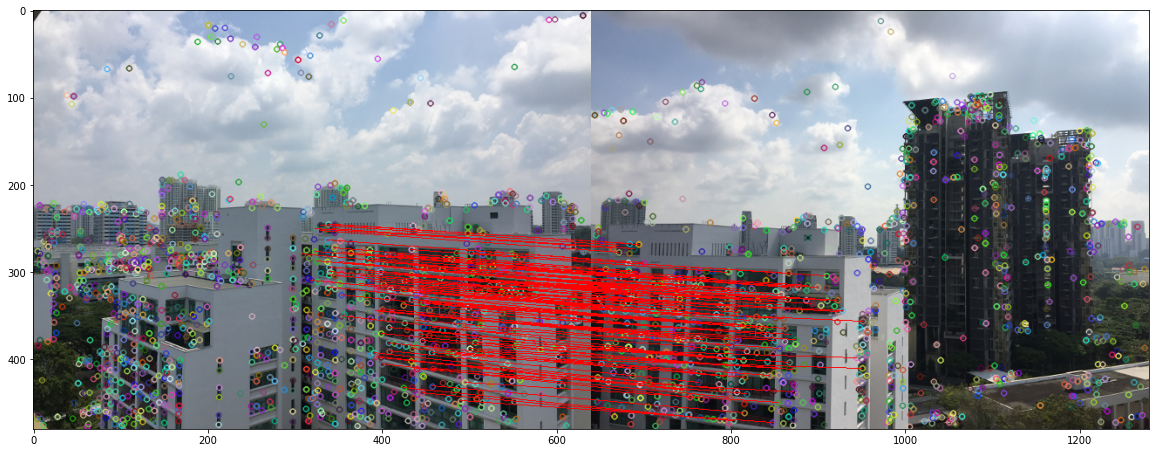

In [131]:

def getHomography_list(srcImg_coord, replace_coord):
    if len(srcImg_coord) != len(replace_coord):
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = len(srcImg_coord)
    A = np.zeros((2*n,9))
    for i in range(0,n):
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

#from match choose 4 keypoint pairs
def choosepoint(kp1,kp2,match,n1,n2,n3,n4):
    x1 = kp1[int(match[n1][0])].pt[0]
    y1 = kp1[int(match[n1][0])].pt[1]
    x11 = kp2[int(match[n1][1])].pt[0]
    y11 = kp2[int(match[n1][1])].pt[1]
    
    x2 = kp1[int(match[n2][0])].pt[0]
    y2 = kp1[int(match[n2][0])].pt[1]
    x22 = kp2[int(match[n2][1])].pt[0]
    y22 = kp2[int(match[n2][1])].pt[1]
    
    x3 = kp1[int(match[n3][0])].pt[0]
    y3 = kp1[int(match[n3][0])].pt[1]
    x33 = kp2[int(match[n3][1])].pt[0]
    y33 = kp2[int(match[n3][1])].pt[1]
    
    x4 = kp1[int(match[n4][0])].pt[0]
    y4 = kp1[int(match[n4][0])].pt[1]
    x44 = kp2[int(match[n4][1])].pt[0]
    y44 = kp2[int(match[n4][1])].pt[1]
    
    srcImg_coord = [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]
    replace_coord = [[x11,y11],[x22,y22],[x33,y33],[x44,y44]]

    return srcImg_coord, replace_coord

#=========================================
sift_cat2 = np.hstack((img1, img2))
e = 1.5
k = 0
iteration = 100000
final_match = []

while k < iteration:
    n1,n2,n3,n4 = np.random.randint(0,len(match),4) #choose 4 keypoint pairs
    left_coord, right_coord = choosepoint(kp1,kp2,match,n1,n2,n3,n4)

    H = getHomography_list(left_coord, right_coord)
    print('第',k,'次')
    
    new_match = []        
    for i in range(len(match)):
        
        x1 = kp1[int(match[i][0])].pt[0]
        y1 = kp1[int(match[i][0])].pt[1]
        x2 = kp2[int(match[i][1])].pt[0]
        y2 = kp2[int(match[i][1])].pt[1]
        hx1 = (H[0][0]*x1 + H[0][1]*y1 + H[0][2]) / (H[2][0]*x1 + H[2][1]*y1 + H[2][2])
        hy1 = (H[1][0]*x1 + H[1][1]*y1 + H[1][2]) / (H[2][0]*x1 + H[2][1]*y1 + H[2][2])

        d = np.sqrt((x2 - hx1)**2 + (y2 - hy1)**2)

        if d < e:
            new_match.append(match[i])
            
    if len(new_match) > len(final_match):
        final_match = new_match
       
    k += 1
    
print('final_match',final_match)
print('H_best',H_best)

img_src_coordinate = []
replace_coordinate = []
for i in range(len(final_match)):
    d = np.sqrt(sum((des1[int(final_match[i][0])]-des2[int(final_match[i][1])])**2))
    x1 = kp1[int(final_match[i][0])].pt[0]
    y1 = kp1[int(final_match[i][0])].pt[1]
    x2 = kp2[int(final_match[i][1])].pt[0]
    y2 = kp2[int(final_match[i][1])].pt[1]
    img_src_coordinate.append([x1, y1])
    replace_coordinate.append([x2, y2])
    cv2.line(sift_cat2,(int(x1),int(y1)),(int(x2) + f1.shape[1],int(y2)),(255,0,0),1)

plt.figure(figsize=(20,10))
plt.imshow(sift_cat2)
plt.show()

In [142]:
print(len(final_match))

NameError: name 'final_match' is not defined

## 3.Stitch the images together using the best homography matrix and show the result:

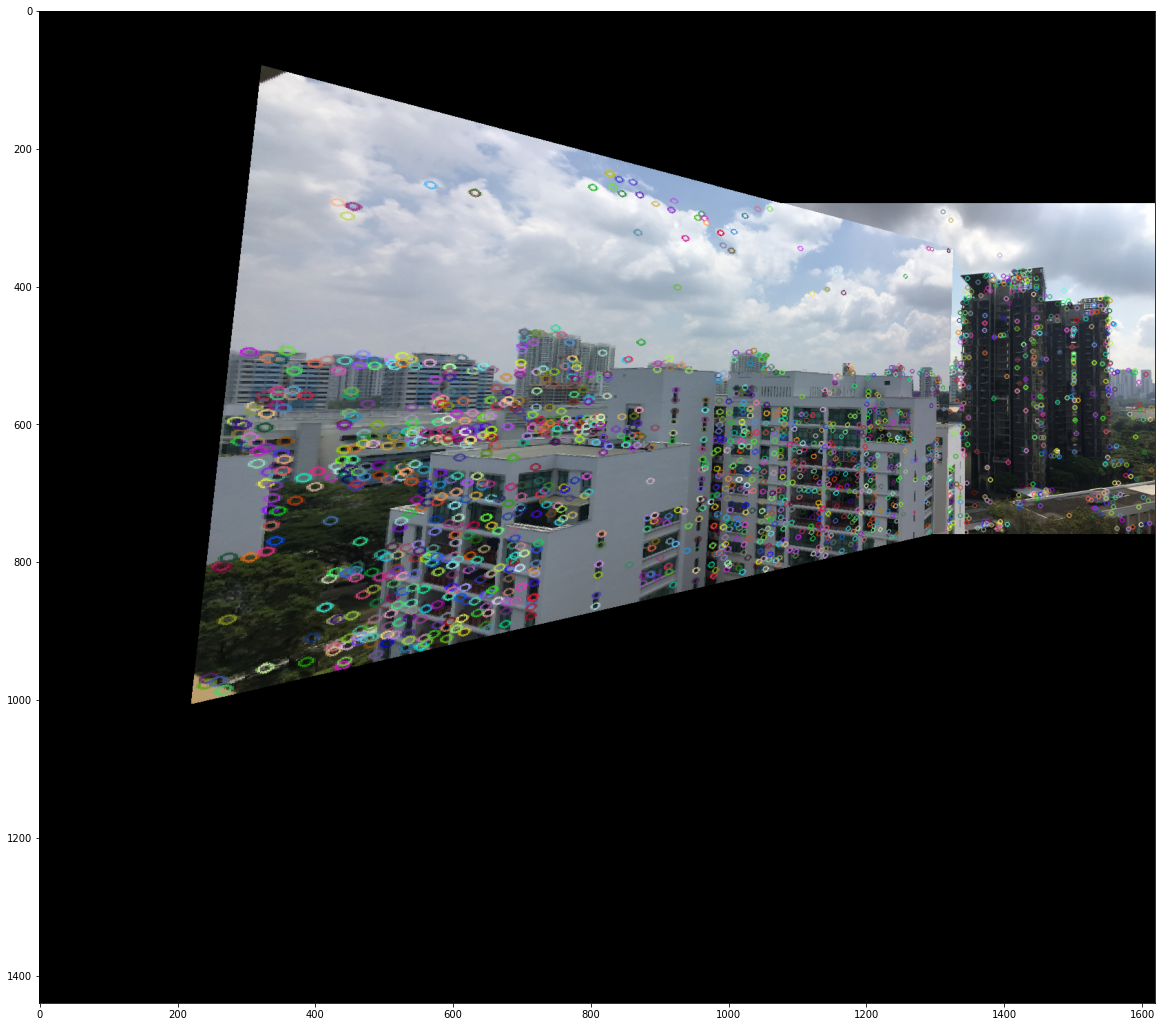

In [134]:
def getStitch(srcImg, dstImg, H, canvas_size, x0, y0, step):
    canvas = np.zeros(canvas_size)
    for i in range(x0,x0+dstImg.shape[0]):
        for j in range(y0,y0+dstImg.shape[1]):
            canvas[i][j] = dstImg[i-x0][j-y0]

    i=0
    while i < srcImg.shape[0]:
        j=0
        while j < srcImg.shape[1]:
            hx = (H[0][0]*j + H[0][1]*i + H[0][2]) / (H[2][0]*j + H[2][1]*i + H[2][2])
            hy = (H[1][0]*j + H[1][1]*i + H[1][2]) / (H[2][0]*j + H[2][1]*i + H[2][2])
            canvas[int(hy)+x0][int(hx)+y0] = srcImg[int(i)][int(j)]
            j += step
        i += step
    return canvas            
#======================================
img_src_coordinate = np.array(img_src_coordinate)
replace_coordinate = np.array(replace_coordinate)
H_best1 = getHomography_list(img_src_coordinate, replace_coordinate)
H_best2 = getHomography_list(replace_coordinate, img_src_coordinate)

canvas1 = getStitch(img1, img2, H_best1, [1440,1620,3], 280, 980, step = 0.1)

plt.figure(figsize=(20,20))
plt.imshow(canvas1.astype('uint8'))
plt.show()